<a href="https://colab.research.google.com/github/Ayona123/Drug_repurposing/blob/main/8702_TEST_3201-3250.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1980]:
# Install RDKit.
%%capture
!pip install rdkit-pypi

In [1981]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

RDKit ERROR: [20:02:33] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Invariant Violation
RDKit ERROR: no eligible neighbors for chiral center
RDKit ERROR: Violation occurred on line 238 in file /tmp/pip-req-build-34yp7_cf/build/temp.linux-x86_64-3.7/rdkit/Code/GraphMol/FileParsers/MolFileStereochem.cpp
RDKit ERROR: Failed Expression: nbrScores.size()
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [20:03:10] non-ring atom 1 marked aromatic


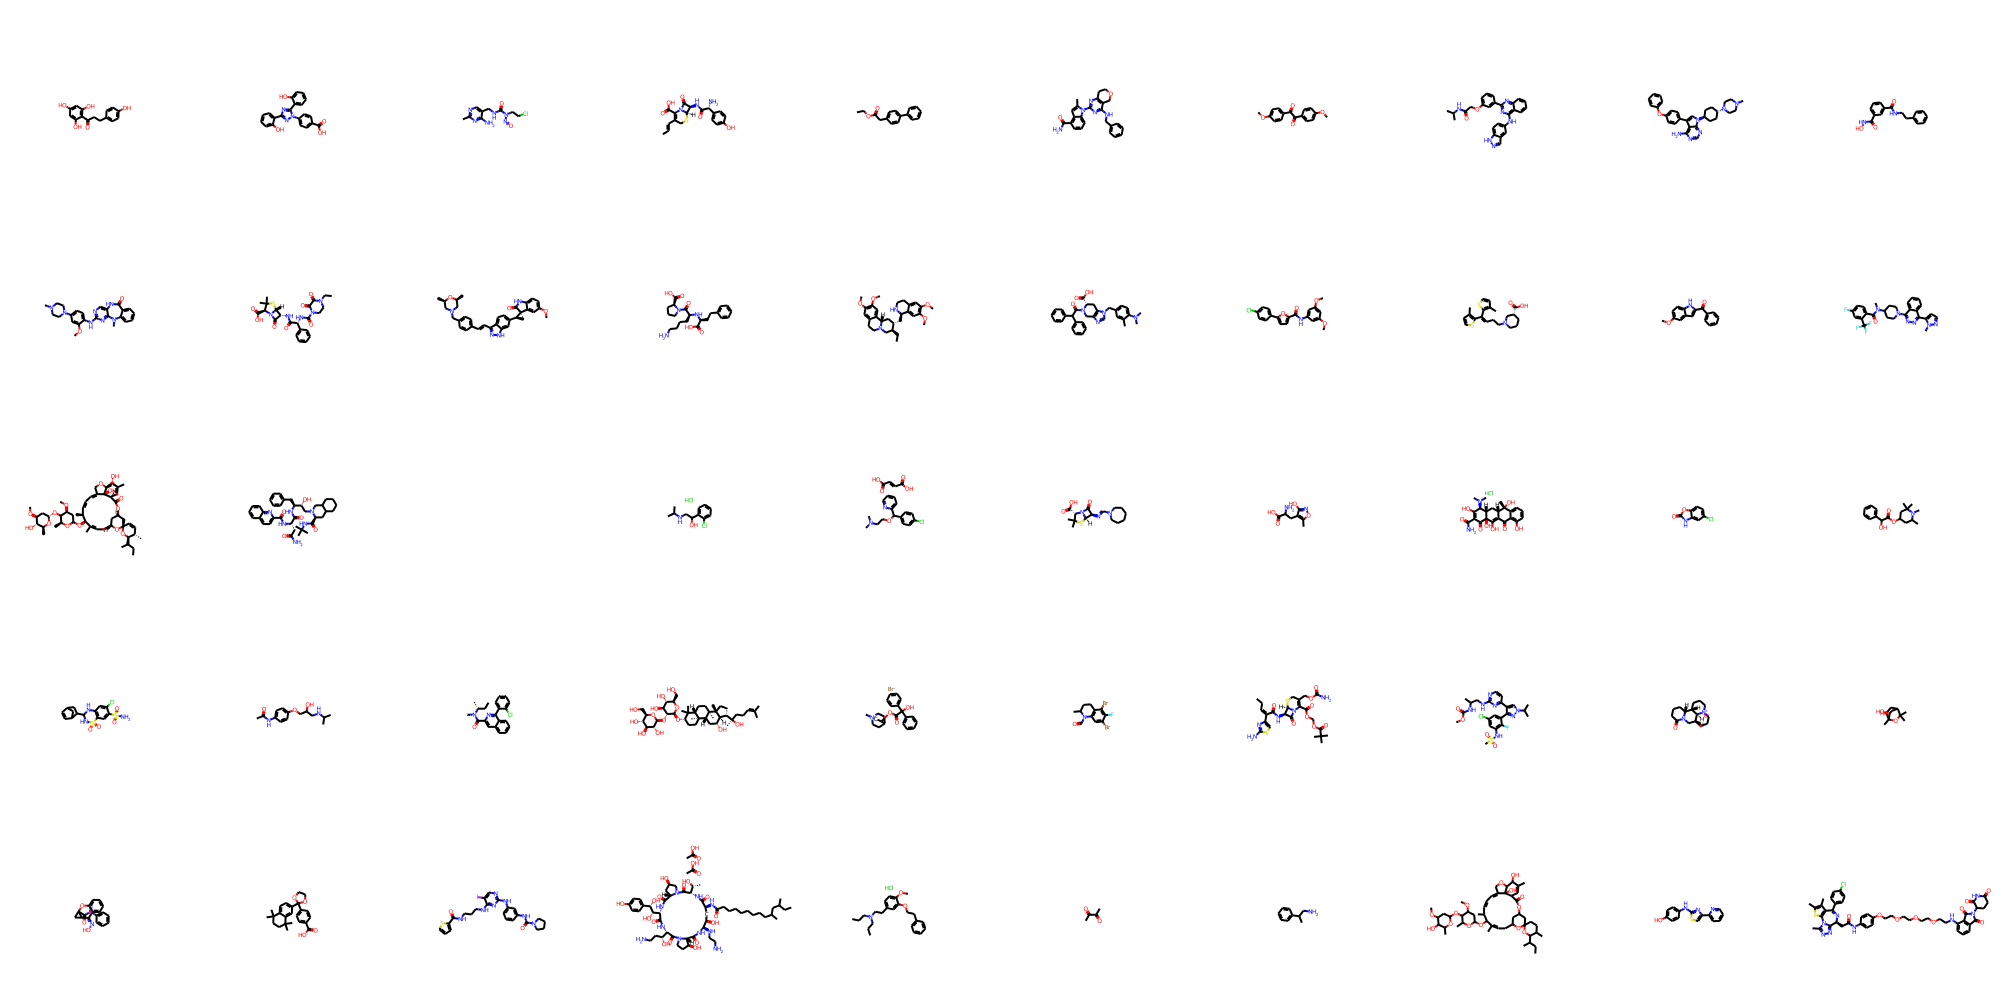

In [1982]:
smiles_list = [

'O=C(CCc1ccc(O)cc1)c1c(O)cc(O)cc1O',
'O=C(O)c1ccc(-n2nc(-c3ccccc3O)nc2-c2ccccc2O)cc1',
'Cc1ncc(CNC(=O)N(CCCl)N=O)c(N)n1',
'C/C=C/C1=C(C(=O)O)N2C(=O)[C@@H](NC(=O)[C@H](N)c3ccc(O)cc3)[C@H]2SC1',
'CCOC(=O)Cc1ccc(-c2ccccc2)cc1',
'Cc1cc2c(C(N)=O)cccc2n1-c1nc2c(c(NCc3ccccc3)n1)COCC2',
'COc1ccc(C(=O)C(=O)c2ccc(OC)cc2)cc1',
'CC(C)NC(=O)COc1cccc(-c2nc(Nc3ccc4[nH]ncc4c3)c3ccccc3n2)c1',
'CN1CCN([C@H]2CC[C@H](n3cc(-c4ccc(Oc5ccccc5)cc4)c4c(N)ncnc43)CC2)CC1',
'O=C(NO)c1cccc(C(=O)NCCc2ccccc2)c1',
'COc1cc(N2CCN(C)CC2)ccc1Nc1ncc2c(n1)N(C)c1ccccc1C(=O)N2',
'CCN1CCN(C(=O)N[C@@H](C(=O)N[C@@H]2C(=O)N3[C@@H](C(=O)O)C(C)(C)S[C@H]23)c2ccccc2)C(=O)C1=O',
'COc1ccc2c(c1)[C@]1(C[C@H]1c1ccc3c(/C=C/c4ccc(CN5C[C@H](C)O[C@H](C)C5)cc4)n[nH]c3c1)C(=O)N2',
'NCCCC[C@H](N[C@@H](CCc1ccccc1)C(=O)O)C(=O)N1CCC[C@H]1C(=O)O',
'CC[C@H]1CN2CCc3cc(OC)c(OC)cc3[C@@H]2C[C@@H]1C[C@H]1NCCc2cc(OC)c(OC)cc21',
'Cc1cc(Cn2cnc3c2C[C@@H](C(=O)O)N(C(=O)C(c2ccccc2)c2ccccc2)C3)ccc1N(C)C',
'COc1cc(NC(=O)c2ccc(-c3ccc(Cl)cc3)o2)cc(OC)c1',
'Cc1ccsc1C(=CCCN1CCC[C@@H](C(=O)O)C1)c1sccc1C',
'COc1ccc2[nH]c(C(=O)c3ccccc3)cc2c1',
'CN(C(=O)c1ccc(F)cc1C(F)(F)F)C1CCN(c2nnc(-c3ccnn3C)c3ccccc23)CC1',
'CCC(C)[C@H]1O[C@]2(C=C[C@@H]1C)C[C@@H]1C[C@@H](C/C=C(\C)[C@@H](OC3C[C@H](OC)C(O[C@H]4C[C@H](OC)[C@@H](O)[C@H](C)O4)[C@H](C)O3)[C@@H](C)/C=C/C=C3\CO[C@@H]4[C@H](O)C(C)=C[C@@H](C(=O)O1)[C@]34O)O2',
'CC(C)(C)NC(=O)[C@@H]1CC2CCCCC2CN1C[C@@H](O)[C@H](Cc1ccccc1)NC(=O)[C@H](CC(N)=O)NC(=O)c1ccc2ccccc2n1',
'No Data',
'CC(C)NCC(O)c1ccccc1Cl.Cl',
'CN(C)CCOC(c1ccc(Cl)cc1)c1ccccn1.O=C(O)/C=C/C(=O)O',
'CC1(C)S[C@@H]2[C@H](/N=C/N3CCCCCC3)C(=O)N2[C@H]1C(=O)O',
'Cc1onc(O)c1CC(N)C(=O)O',
'CN(C)[C@@H]1C(O)=C(C(N)=O)C(=O)[C@@]2(O)C(O)=C3C(=O)c4c(O)cccc4[C@@](C)(O)[C@H]3C[C@@H]12.Cl',
'O=c1[nH]c2cc(Cl)ccc2o1',
'CC1CC(OC(=O)C(O)c2ccccc2)CC(C)(C)N1C',
'NS(=O)(=O)c1cc2c(cc1Cl)NC(C1CC3C=CC1C3)NS2(=O)=O',
'CC(=O)Nc1ccc(OCC(O)CNC(C)C)cc1',
'CC[C@@H](C)N(C)C(=O)c1cc2ccccc2c(-c2ccccc2Cl)n1',
'CC(C)=CCC[C@@](C)(O)[C@H]1CC[C@]2(C)[C@@H]1[C@H](O)C[C@@H]1[C@@]3(C)CC[C@H](O[C@@H]4O[C@H](CO)[C@@H](O)[C@H](O)[C@H]4O[C@@H]4O[C@H](CO)[C@@H](O)[C@H](O)[C@H]4O)C(C)(C)[C@@H]3CC[C@]12C',
'C[N+]12CCC(CC1)C(OC(=O)C(O)(c1ccccc1)c1ccccc1)C2.[Br-]',
'CC1CCc2c(cc(Br)c(F)c2Br)N1C=O',
'CC/C=C(\C(=O)N[C@@H]1C(=O)N2C(C(=O)OCOC(=O)C(C)(C)C)=C(COC(N)=O)CS[C@H]12)c1csc(N)n1',
'COC(=O)NC(C)CNc1nccc(-c2cn(C(C)C)nc2-c2cc(Cl)cc(NS(C)(=O)=O)c2F)n1',
'O=C1CCC[C@@H]2[C@@H]3CCC[N+]4([O-])CCC[C@H](CN12)[C@@H]34',
'CC1(C)OC2(C)C(O)CC1CC2O',
'O=C(Nc1ccccc1)C12CC1/C(=N\O)c1ccccc1O2',
'CC1(C)CCC(C)(C)c2cc(C3(c4ccc(C(=O)O)cc4)OCCO3)ccc21',
'O=C(NCCCNc1nc(Nc2cccc(NC(=O)N3CCCC3)c2)ncc1I)c1cccs1',
'CC(=O)O.CC(=O)O.CCC(C)CC(C)CCCCCCCCC(=O)N[C@H]1C[C@@H](O)[C@@H](NCCN)NC(=O)[C@@H]2[C@@H](O)CCN2C(=O)[C@H]([C@H](O)CCN)NC(=O)[C@H]([C@H](O)[C@@H](O)c2ccc(O)cc2)NC(=O)[C@@H]2C[C@@H](O)CN2C(=O)[C@H]([C@@H](C)O)NC1=O',
'CCCN(CCC)CCc1ccc(OC)c(OCCc2ccccc2)c1.Cl',
'CC(=O)C(C)=O',
'CC(CN)c1ccccc1',
'CCC(C)C1OC2(CCC1C)CC1CC(C/C=C(\C)C(OC3CC(OC)C(OC4CC(OC)C(O)C(C)O4)C(C)O3)C(C)/C=C/C=C3\COC4C(O)C(C)=CC(C(=O)O1)C34O)O2',
'Oc1ccc(Nc2nc(-c3ccccn3)cs2)cc1',
'Cc1sc2c(c1C)C(c1ccc(Cl)cc1)=N[C@@H](CC(=O)Nc1ccc(OCCOCCOCCOCCNc3cccc4c3C(=O)N(C3CCC(=O)NC3=O)C4=O)cc1)c1nnc(C)n1-2',

               
]
mol_list = []
for smiles in smiles_list:
   mol= Chem.MolFromSmiles (smiles)
   mol_list.append (mol)

img = Draw.MolsToGridImage(mol_list, molsPerRow=10)
img



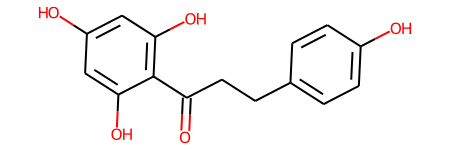

In [1983]:
M1 = mol_list [0]
M1

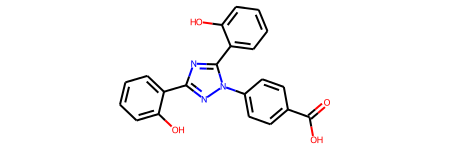

In [1984]:
M2 = mol_list [1]
M2

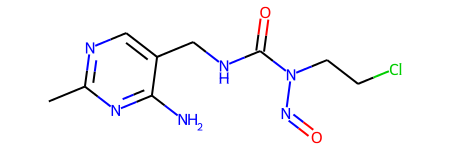

In [1985]:
M3 = mol_list [2]
M3

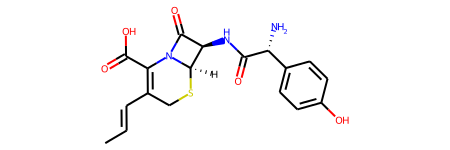

In [1986]:
M4 = mol_list [3]
M4

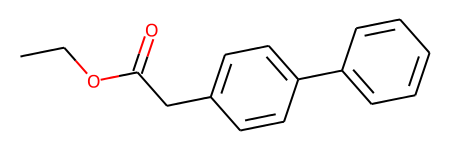

In [1987]:
M5 = mol_list [4]
M5

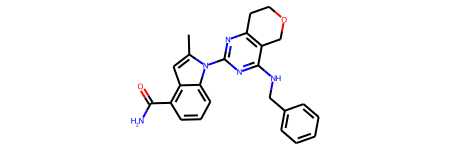

In [1988]:
M6 = mol_list [5]
M6

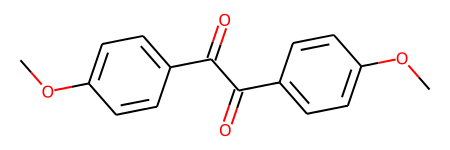

In [1989]:
M7 = mol_list [6]
M7

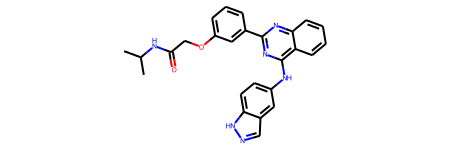

In [1990]:
M8 = mol_list [7]
M8

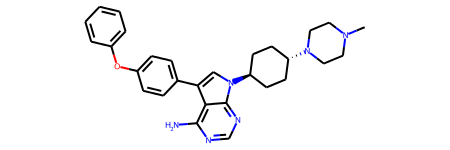

In [1991]:
M9 = mol_list [8]
M9

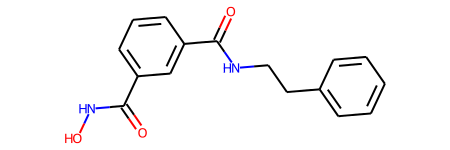

In [1992]:
M10 = mol_list [9]
M10

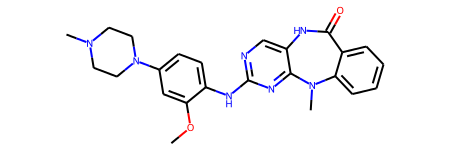

In [1993]:
M11 = mol_list [10]
M11

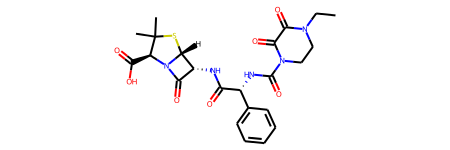

In [1994]:
M12 = mol_list [11]
M12

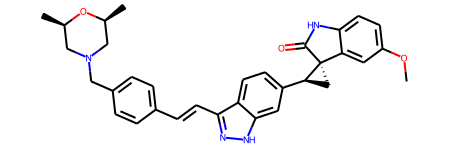

In [1995]:
M13 = mol_list [12]
M13

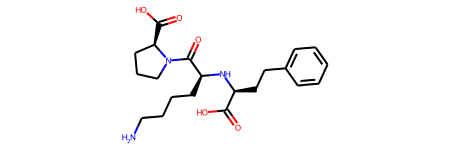

In [1996]:
M14 = mol_list [13]
M14

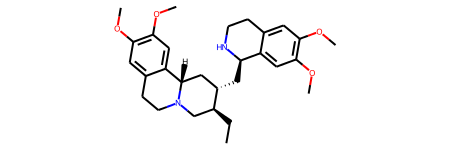

In [1997]:
M15 = mol_list [14]
M15

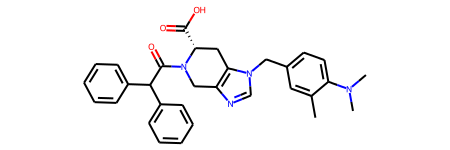

In [1998]:
M16 = mol_list [15]
M16

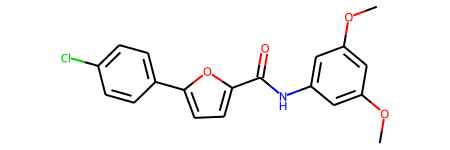

In [1999]:
M17 = mol_list [16]
M17

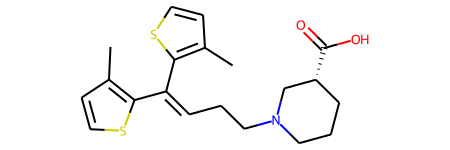

In [2000]:
M18 = mol_list [17]
M18

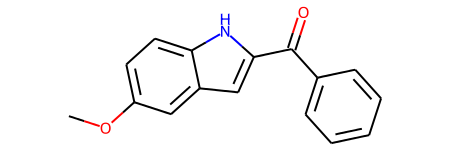

In [2001]:
M19 = mol_list [18]
M19

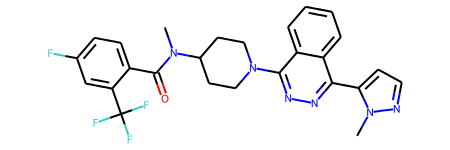

In [2002]:
M20 = mol_list [19]
M20

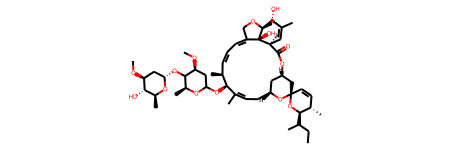

In [2003]:
M21 = mol_list [20]
M21

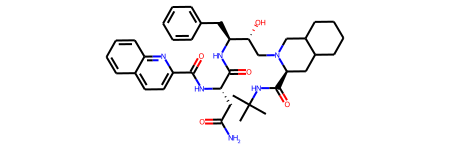

In [2004]:
M22 = mol_list [21]
M22

In [2005]:
M23 = mol_list [22]
M23

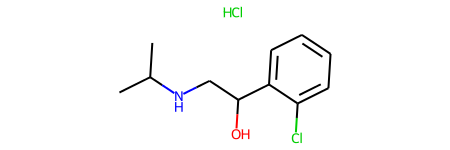

In [2006]:
M24 = mol_list [23]
M24

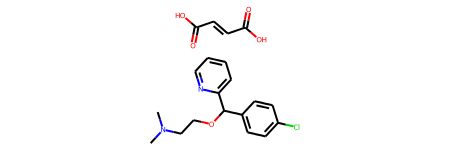

In [2007]:
M25 = mol_list [24]
M25

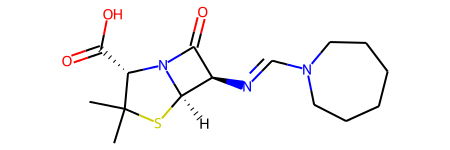

In [2008]:
M26 = mol_list [25]
M26

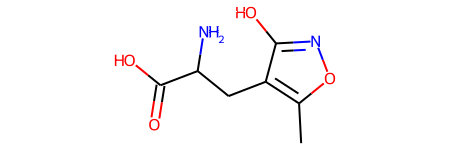

In [2009]:
M27 = mol_list [26]
M27

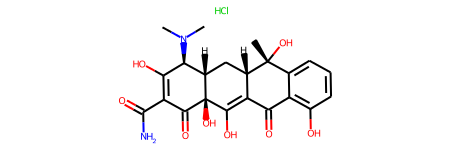

In [2010]:
M28 = mol_list [27]
M28

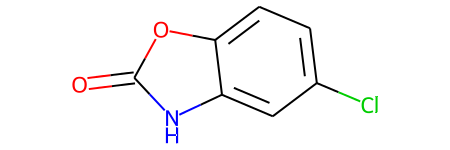

In [2011]:
M29 = mol_list [28]
M29

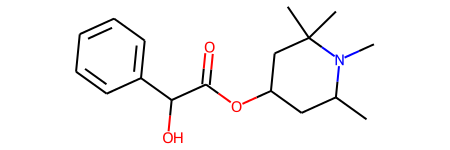

In [2012]:
M30 = mol_list [29]
M30

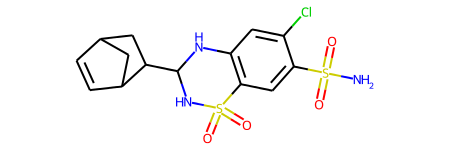

In [2013]:
M31 = mol_list [30]
M31

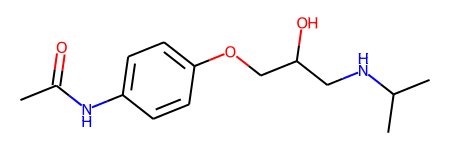

In [2014]:
M32 = mol_list [31]
M32

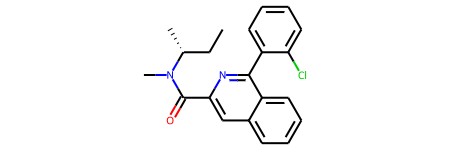

In [2015]:
M33 = mol_list [32]
M33

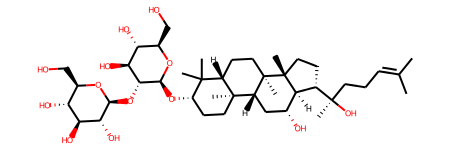

In [2016]:
M34 = mol_list [33]
M34

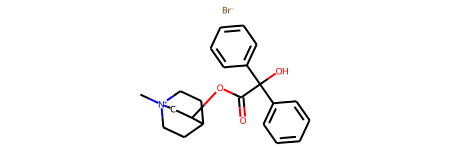

In [2017]:
M35 = mol_list [34]
M35

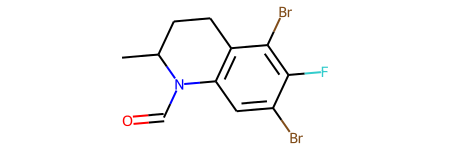

In [2018]:
M36 = mol_list [35]
M36

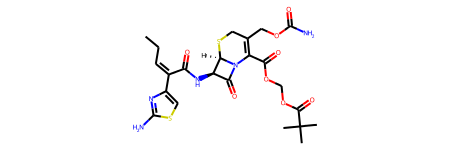

In [2019]:
M37= mol_list [36]
M37

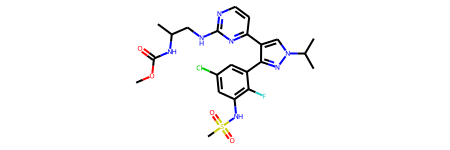

In [2020]:
M38= mol_list [37]
M38

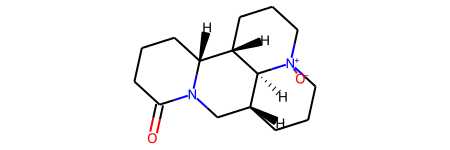

In [2021]:
M39= mol_list [38]
M39

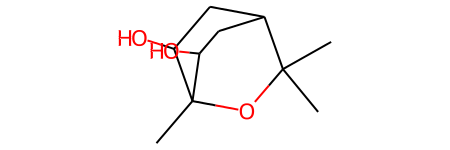

In [2022]:
M40= mol_list [39]
M40

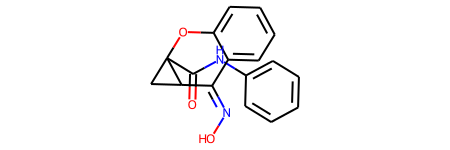

In [2023]:
M41= mol_list [40]
M41

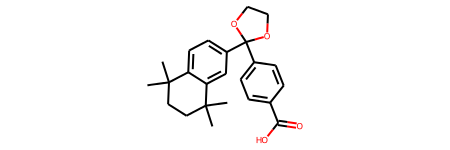

In [2024]:
M42= mol_list [41]
M42

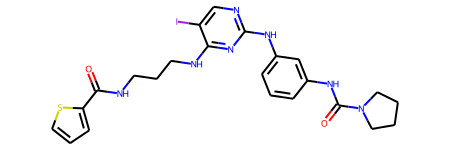

In [2025]:
M43= mol_list [42]
M43

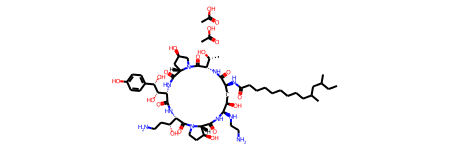

In [2026]:
M44= mol_list [43]
M44

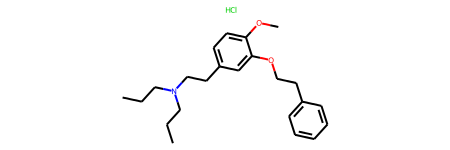

In [2027]:
M45= mol_list [44]
M45

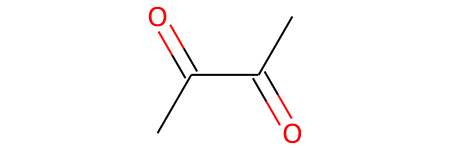

In [2028]:
M46= mol_list [45]
M46

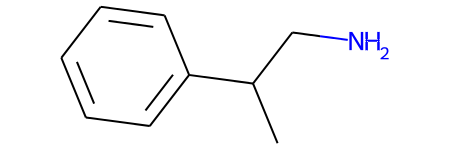

In [2029]:
M47= mol_list [46]
M47

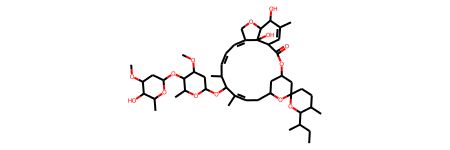

In [2030]:
M48= mol_list [47]
M48

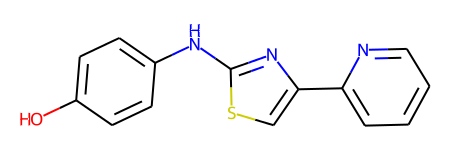

In [2031]:
M49= mol_list [48]
M49

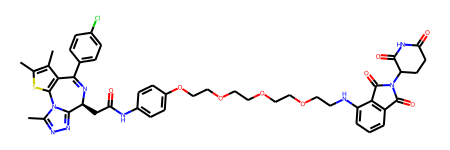

In [2032]:
M50= mol_list [49]
M50

In [2033]:
bi = {}

fp= AllChem.GetMorganFingerprintAsBitVect(M1, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp, fp_arr)
np.nonzero(fp_arr)
list(fp.GetOnBits())

[21,
 66,
 80,
 157,
 167,
 219,
 289,
 310,
 356,
 432,
 437,
 540,
 556,
 578,
 583,
 586,
 650,
 669,
 726,
 730,
 745,
 754,
 781,
 807,
 849,
 875,
 893]

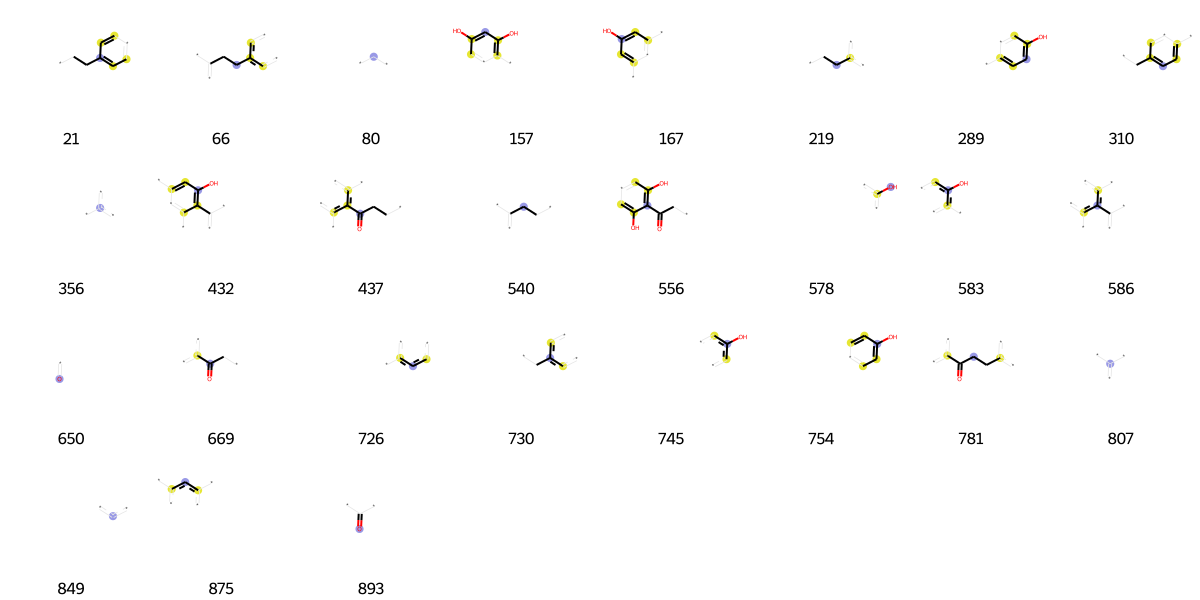

In [2034]:
prints = [(M1, x, bi) for x in fp.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp.GetOnBits ()])

In [2035]:
bi = {}

fp2= AllChem.GetMorganFingerprintAsBitVect(M2, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp2, fp_arr)
np.nonzero(fp_arr)
list(fp2.GetOnBits())

[64,
 106,
 114,
 115,
 171,
 175,
 194,
 233,
 352,
 356,
 361,
 378,
 389,
 416,
 428,
 456,
 578,
 583,
 621,
 650,
 673,
 674,
 678,
 698,
 726,
 801,
 807,
 828,
 831,
 843,
 849,
 893,
 932,
 935,
 984]

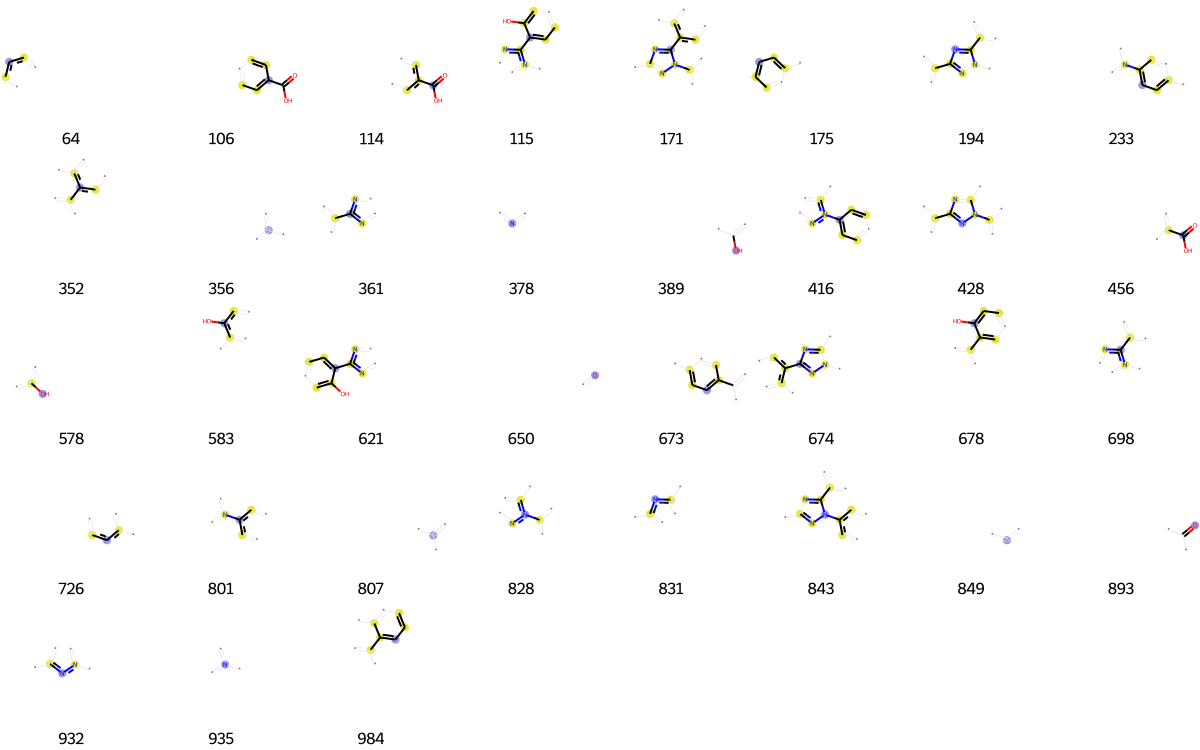

In [2036]:
prints = [(M2, x, bi) for x in fp2.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp2.GetOnBits ()])

In [2037]:
bi = {}

fp3= AllChem.GetMorganFingerprintAsBitVect(M3, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp3, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[4,
 24,
 33,
 44,
 79,
 80,
 85,
 99,
 102,
 128,
 147,
 165,
 193,
 197,
 255,
 284,
 325,
 356,
 378,
 401,
 424,
 428,
 432,
 433,
 435,
 473,
 511,
 544,
 650,
 659,
 698,
 725,
 762,
 807,
 815,
 827,
 831,
 840,
 849,
 881,
 893,
 927,
 979]

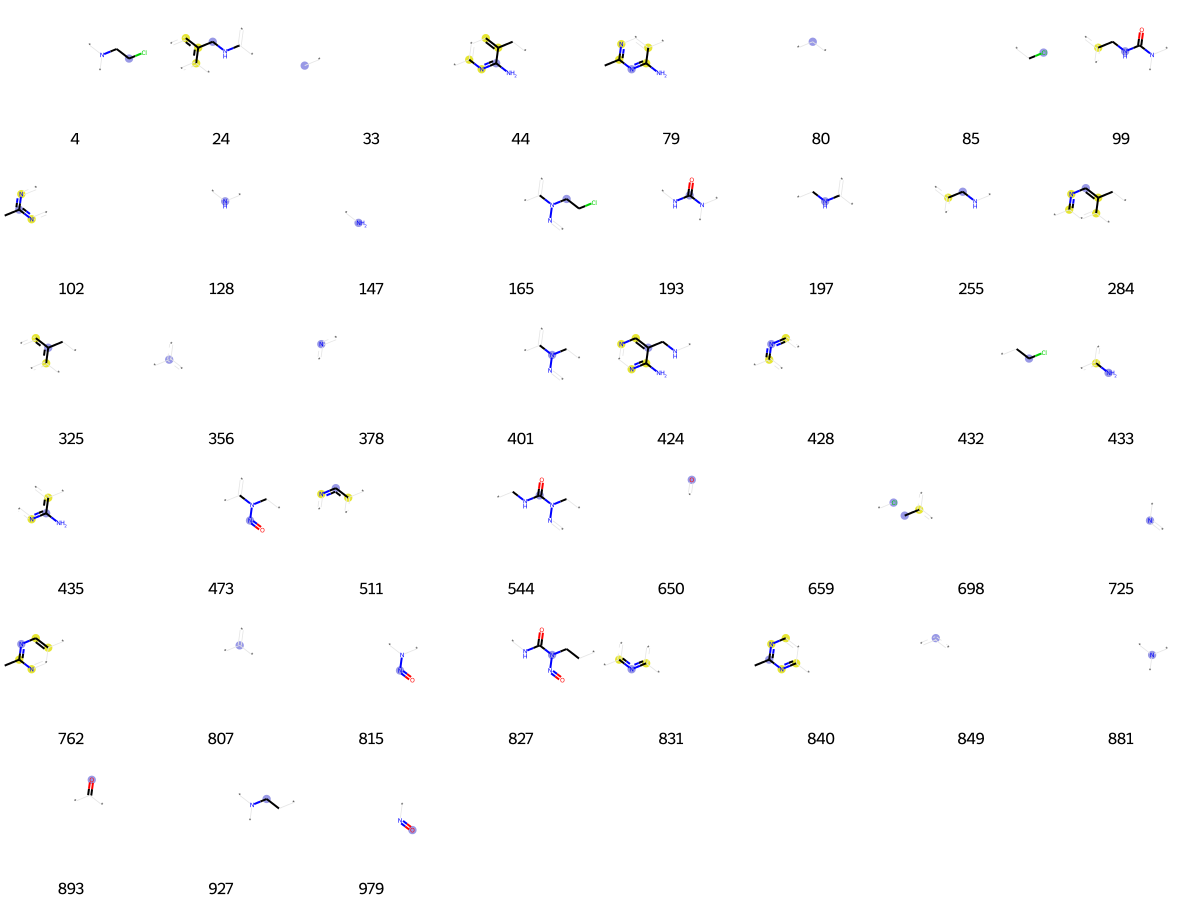

In [2038]:
prints = [(M3, x, bi) for x in fp3.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp3.GetOnBits ()])

In [2039]:
bi = {}

fp4= AllChem.GetMorganFingerprintAsBitVect(M4, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp4, fp_arr)
np.nonzero(fp_arr)
list(fp4.GetOnBits())

[1,
 5,
 21,
 28,
 33,
 39,
 95,
 128,
 147,
 208,
 233,
 248,
 251,
 255,
 274,
 289,
 314,
 341,
 356,
 387,
 389,
 417,
 456,
 470,
 484,
 573,
 578,
 585,
 607,
 650,
 675,
 694,
 698,
 709,
 726,
 745,
 753,
 754,
 786,
 807,
 829,
 835,
 844,
 849,
 859,
 893,
 898,
 926,
 935,
 936,
 940,
 950,
 998,
 1019]

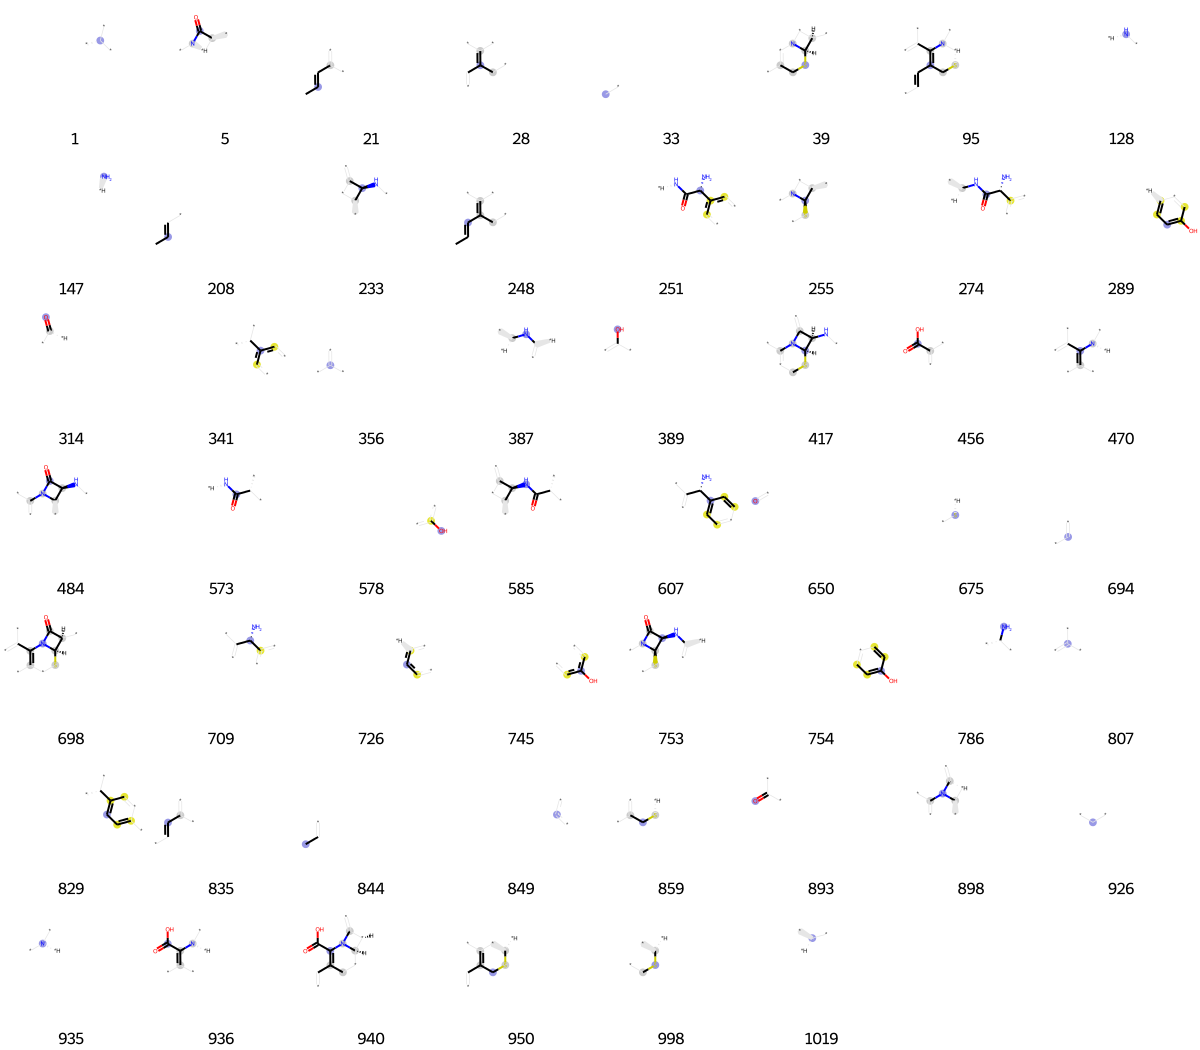

In [2040]:
prints = [(M4, x, bi) for x in fp4.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp4.GetOnBits ()])

In [2041]:
bi = {}

fp5= AllChem.GetMorganFingerprintAsBitVect(M5, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp5, fp_arr)
np.nonzero(fp_arr)
list(fp5.GetOnBits())

[33,
 64,
 80,
 136,
 147,
 152,
 175,
 214,
 294,
 310,
 325,
 356,
 362,
 389,
 650,
 695,
 698,
 726,
 730,
 736,
 807,
 849,
 893,
 896,
 913,
 940,
 1007,
 1009]

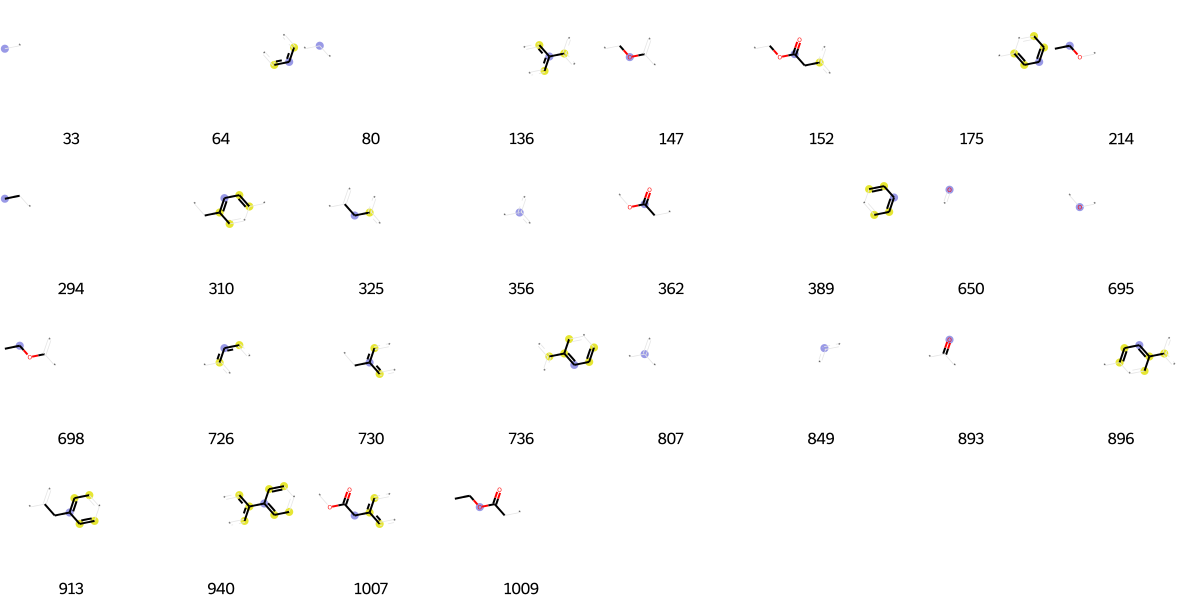

In [2042]:
prints = [(M5, x, bi) for x in fp5.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp5.GetOnBits ()])

In [2043]:
bi = {}

fp6= AllChem.GetMorganFingerprintAsBitVect(M6, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp6, fp_arr)
np.nonzero(fp_arr)
list(fp6.GetOnBits())

[15,
 33,
 42,
 45,
 64,
 80,
 110,
 128,
 140,
 147,
 175,
 232,
 239,
 255,
 261,
 274,
 276,
 284,
 309,
 333,
 356,
 361,
 378,
 389,
 392,
 423,
 448,
 452,
 485,
 513,
 523,
 581,
 609,
 638,
 650,
 656,
 698,
 708,
 714,
 726,
 730,
 752,
 807,
 831,
 849,
 865,
 875,
 878,
 883,
 893,
 924,
 926,
 933,
 935,
 950,
 967,
 969,
 980,
 1018,
 1019]

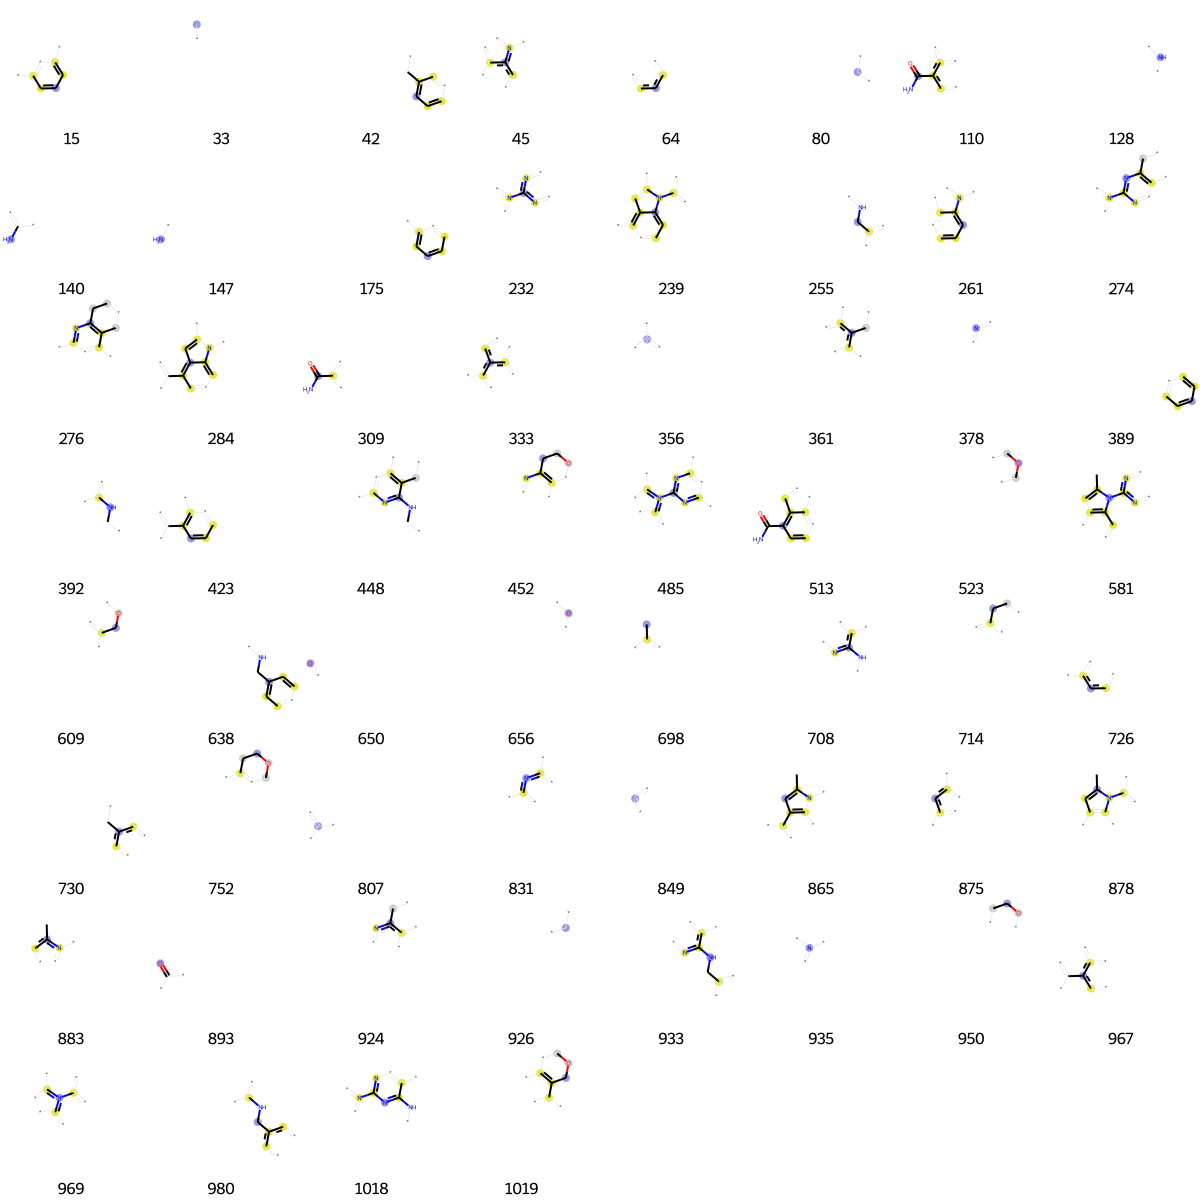

In [2044]:
prints = [(M6, x, bi) for x in fp6.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp6.GetOnBits ()])

In [2045]:
bi = {}

fp7= AllChem.GetMorganFingerprintAsBitVect(M7, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp7, fp_arr)
np.nonzero(fp_arr)
list(fp7.GetOnBits())

[33,
 226,
 322,
 328,
 356,
 361,
 512,
 650,
 673,
 695,
 718,
 726,
 781,
 807,
 831,
 841,
 849,
 893]

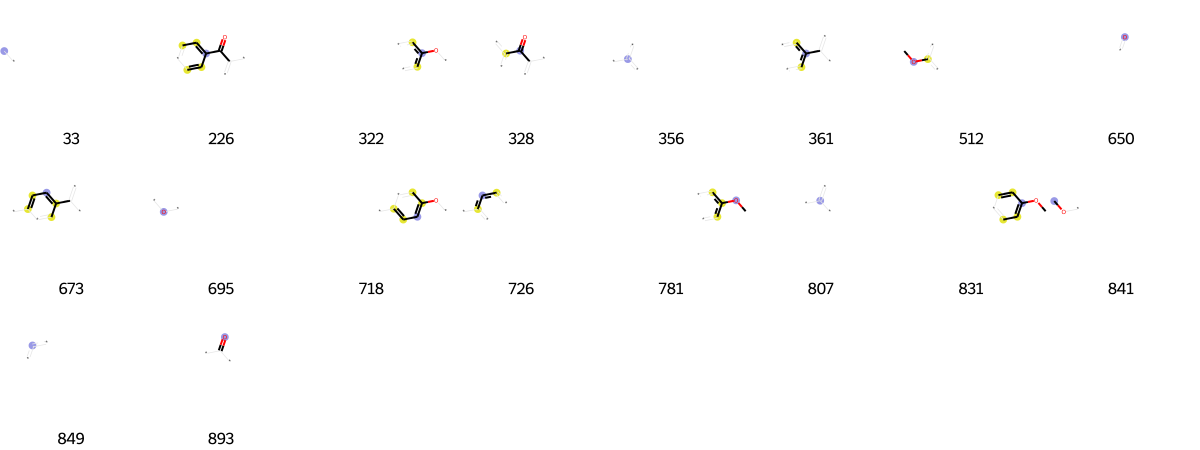

In [2046]:
prints = [(M7, x, bi) for x in fp7.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp7.GetOnBits ()])

In [2047]:
bi = {}

fp8= AllChem.GetMorganFingerprintAsBitVect(M8, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp8, fp_arr)
np.nonzero(fp_arr)
list(fp8.GetOnBits())

[1,
 4,
 15,
 33,
 41,
 64,
 73,
 74,
 80,
 90,
 96,
 117,
 119,
 128,
 136,
 175,
 191,
 192,
 221,
 278,
 283,
 289,
 322,
 329,
 333,
 356,
 361,
 378,
 380,
 389,
 428,
 467,
 477,
 491,
 511,
 549,
 562,
 599,
 600,
 609,
 636,
 646,
 650,
 688,
 692,
 695,
 708,
 726,
 736,
 753,
 807,
 831,
 843,
 849,
 863,
 875,
 888,
 893,
 915,
 924,
 959,
 980]

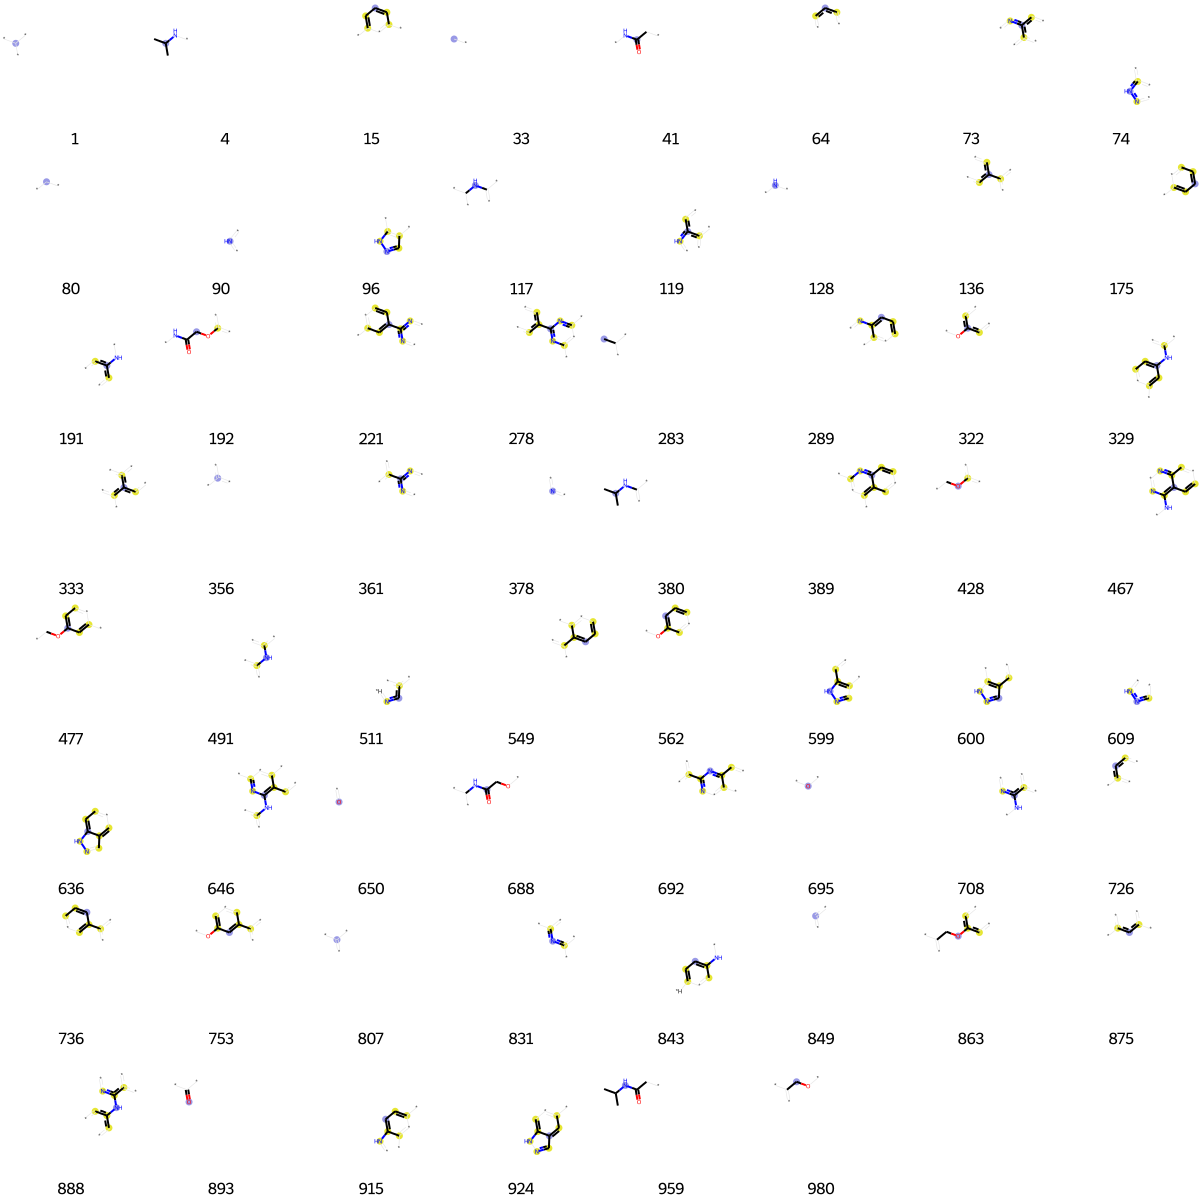

In [2048]:
prints = [(M8, x, bi) for x in fp8.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp8.GetOnBits ()])


In [2049]:
bi = {}

fp9= AllChem.GetMorganFingerprintAsBitVect(M9, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp9, fp_arr)
np.nonzero(fp_arr)
list(fp9.GetOnBits())

[14,
 33,
 64,
 109,
 121,
 136,
 147,
 175,
 193,
 207,
 209,
 212,
 222,
 228,
 296,
 301,
 322,
 326,
 338,
 352,
 356,
 378,
 389,
 428,
 433,
 435,
 440,
 456,
 464,
 489,
 548,
 558,
 562,
 577,
 593,
 672,
 695,
 712,
 718,
 726,
 786,
 830,
 849,
 886,
 889,
 896,
 926,
 934,
 935,
 960,
 1001,
 1019]

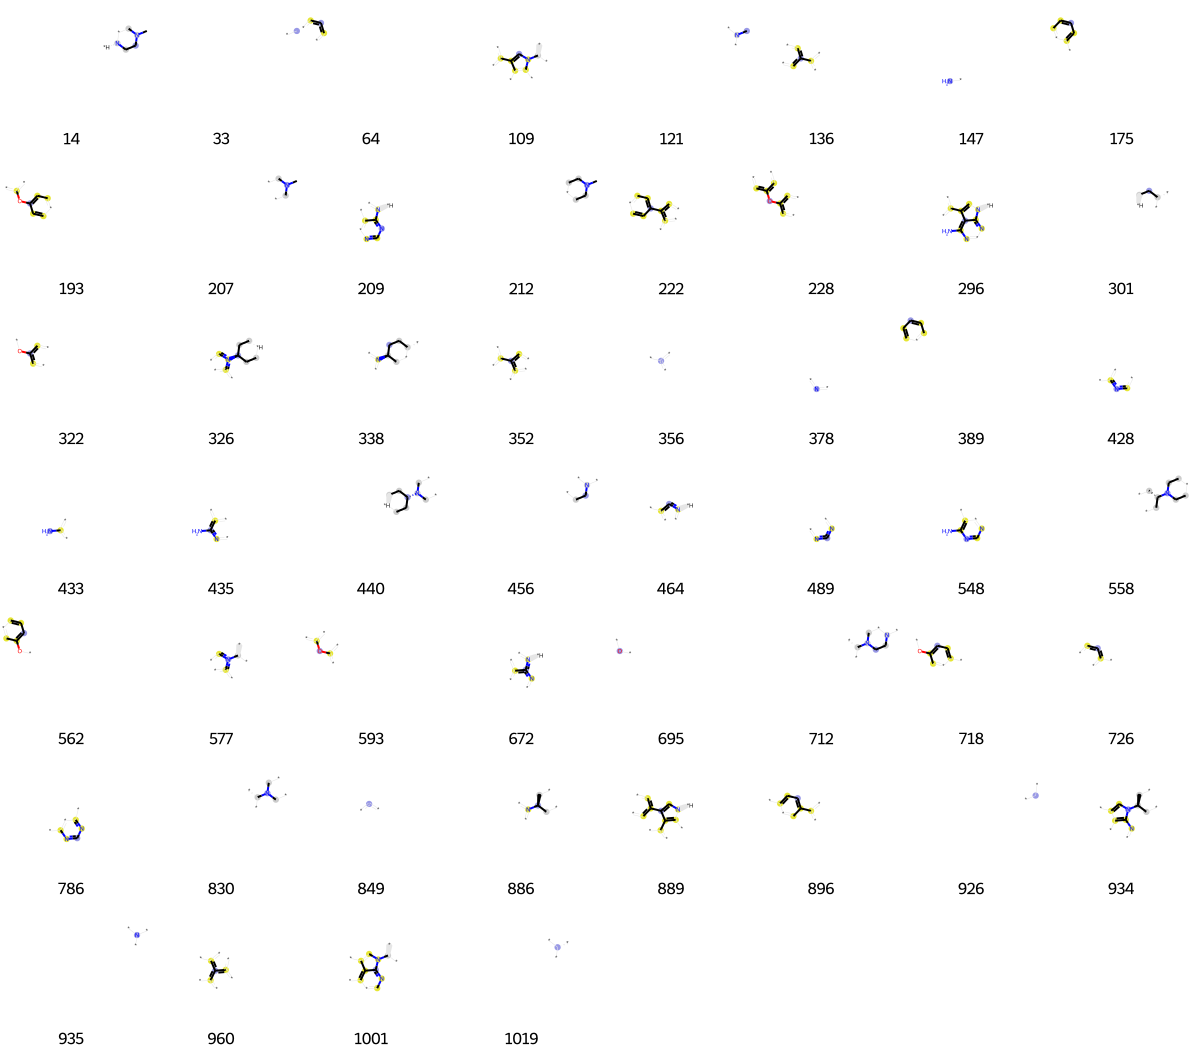

In [2050]:
prints = [(M9, x, bi) for x in fp9.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp9.GetOnBits ()])

In [2051]:
bi = {}

fp10= AllChem.GetMorganFingerprintAsBitVect(M10, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp10, fp_arr)
np.nonzero(fp_arr)
list(fp10.GetOnBits())

[8,
 15,
 21,
 42,
 64,
 80,
 128,
 175,
 197,
 219,
 240,
 265,
 287,
 356,
 361,
 389,
 483,
 486,
 526,
 607,
 650,
 667,
 726,
 730,
 807,
 828,
 849,
 875,
 878,
 893,
 898,
 961]

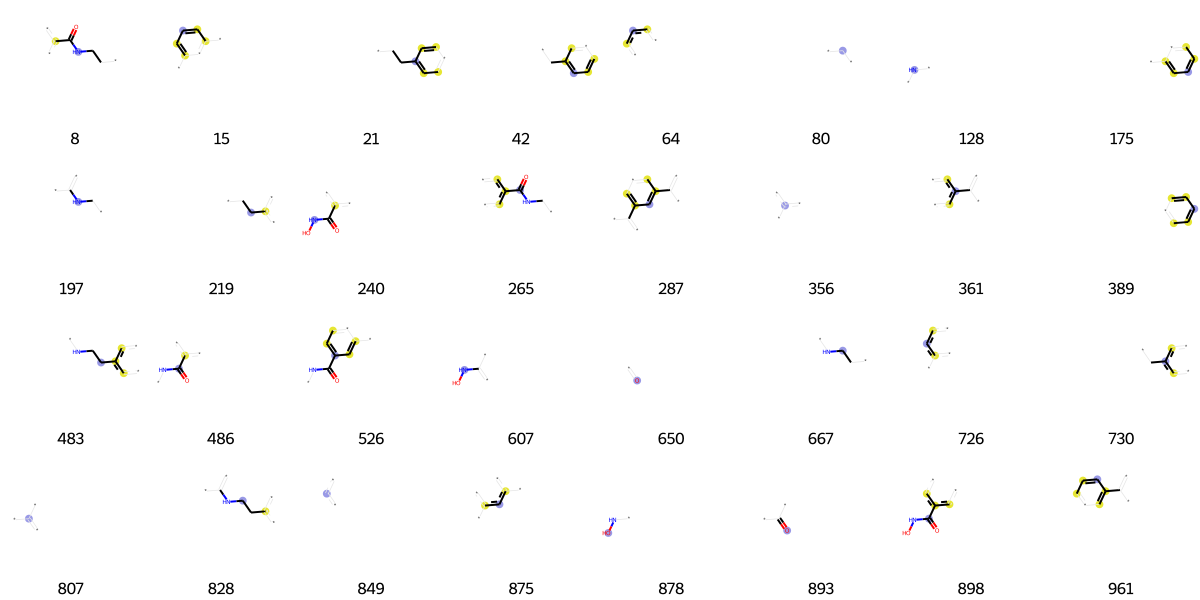

In [2052]:
prints = [(M10, x, bi) for x in fp10.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp10.GetOnBits ()])

In [2053]:
bi = {}

fp11= AllChem.GetMorganFingerprintAsBitVect(M11, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp11, fp_arr)
np.nonzero(fp_arr)
list(fp11.GetOnBits())

[14,
 33,
 36,
 64,
 65,
 84,
 90,
 100,
 121,
 128,
 129,
 130,
 175,
 200,
 207,
 212,
 233,
 249,
 271,
 314,
 352,
 356,
 378,
 407,
 428,
 436,
 447,
 456,
 458,
 474,
 484,
 491,
 496,
 511,
 512,
 527,
 544,
 555,
 558,
 623,
 633,
 650,
 687,
 695,
 726,
 756,
 801,
 831,
 832,
 841,
 849,
 875,
 926,
 928,
 935,
 946,
 958,
 984,
 987,
 993,
 1019]

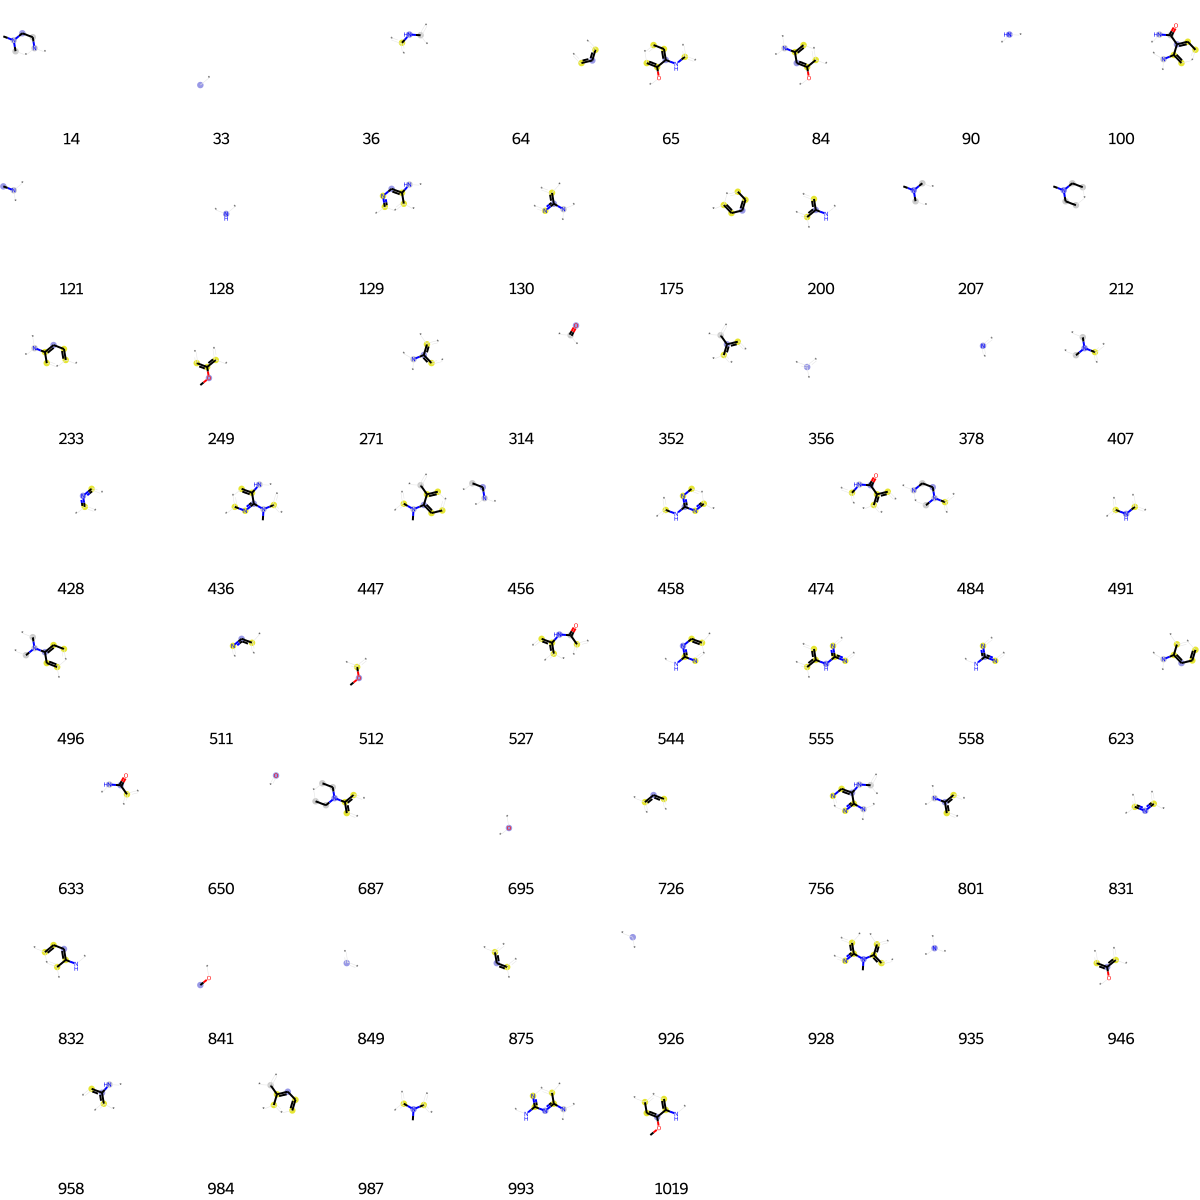

In [2054]:
prints = [(M11, x, bi) for x in fp11.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp11.GetOnBits ()])

In [2055]:
bi = {}

fp12= AllChem.GetMorganFingerprintAsBitVect(M12, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp12, fp_arr)
np.nonzero(fp_arr)
list(fp12.GetOnBits())

[1,
 5,
 18,
 33,
 34,
 36,
 64,
 65,
 80,
 87,
 117,
 125,
 126,
 128,
 130,
 175,
 181,
 210,
 218,
 233,
 250,
 255,
 284,
 294,
 295,
 298,
 314,
 341,
 356,
 362,
 363,
 387,
 389,
 407,
 456,
 557,
 573,
 585,
 590,
 611,
 650,
 673,
 675,
 697,
 718,
 726,
 753,
 807,
 818,
 841,
 849,
 879,
 893,
 913,
 919,
 926,
 935,
 1017,
 1019]

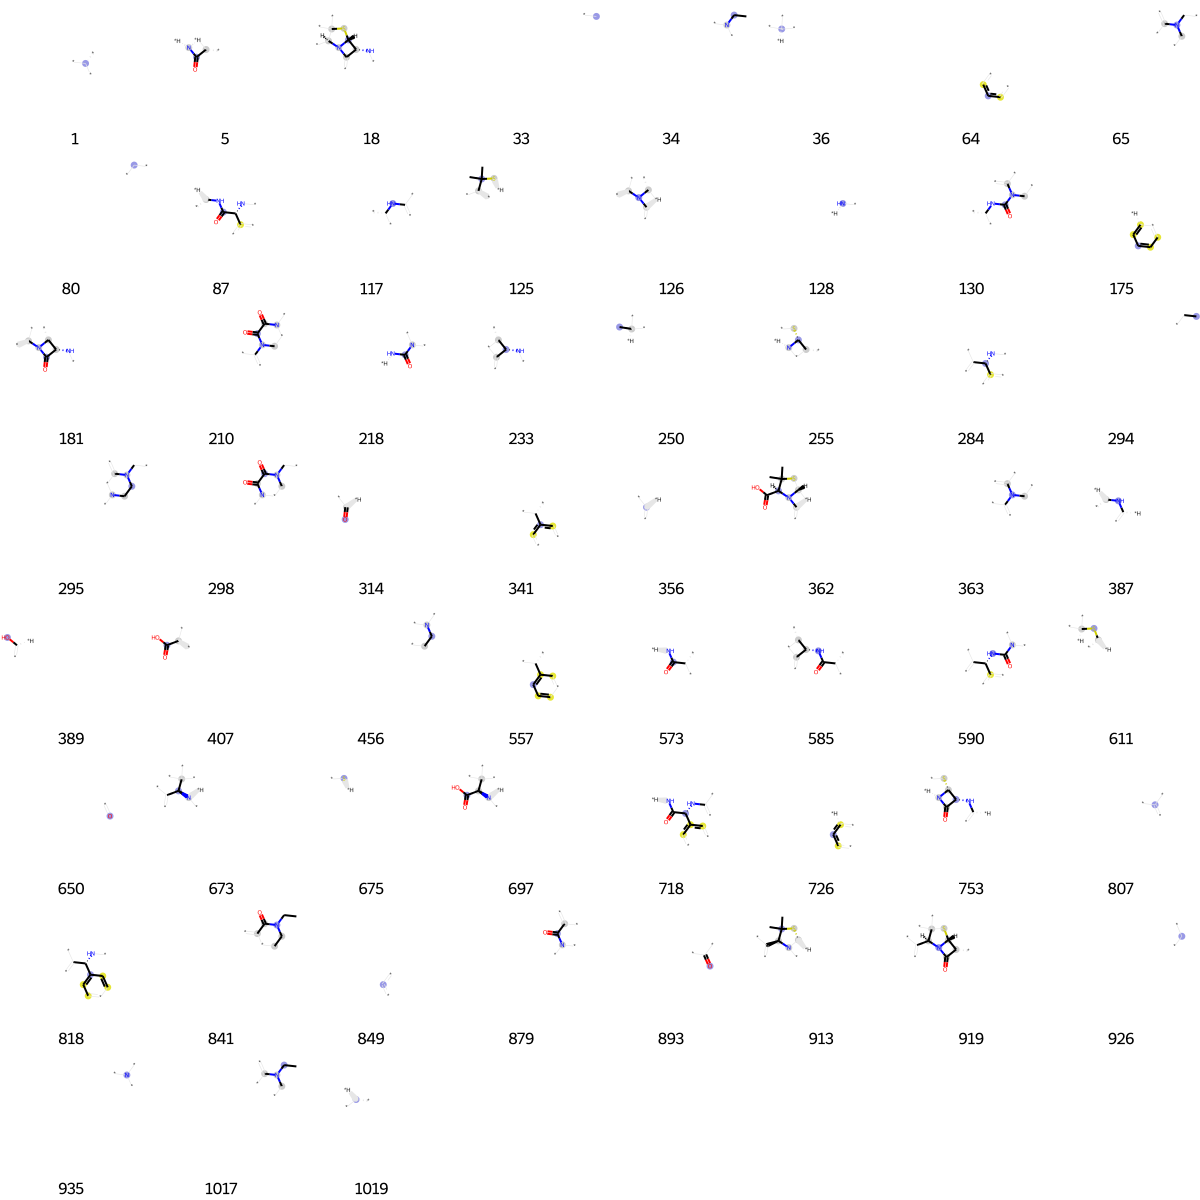

In [2056]:
prints = [(M12, x, bi) for x in fp12.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp12.GetOnBits ()])

In [2057]:
bi = {}

fp13= AllChem.GetMorganFingerprintAsBitVect(M13, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp13, fp_arr)
np.nonzero(fp_arr)
list(fp13.GetOnBits())

[25,
 33,
 36,
 53,
 66,
 74,
 80,
 90,
 119,
 135,
 203,
 206,
 216,
 255,
 285,
 310,
 314,
 322,
 333,
 356,
 378,
 410,
 418,
 423,
 441,
 512,
 568,
 573,
 584,
 602,
 650,
 656,
 659,
 679,
 694,
 695,
 709,
 713,
 718,
 726,
 730,
 739,
 741,
 742,
 747,
 752,
 765,
 766,
 767,
 779,
 781,
 799,
 835,
 841,
 849,
 853,
 856,
 875,
 878,
 897,
 926,
 935,
 948,
 956,
 958,
 974,
 980,
 1009,
 1019]

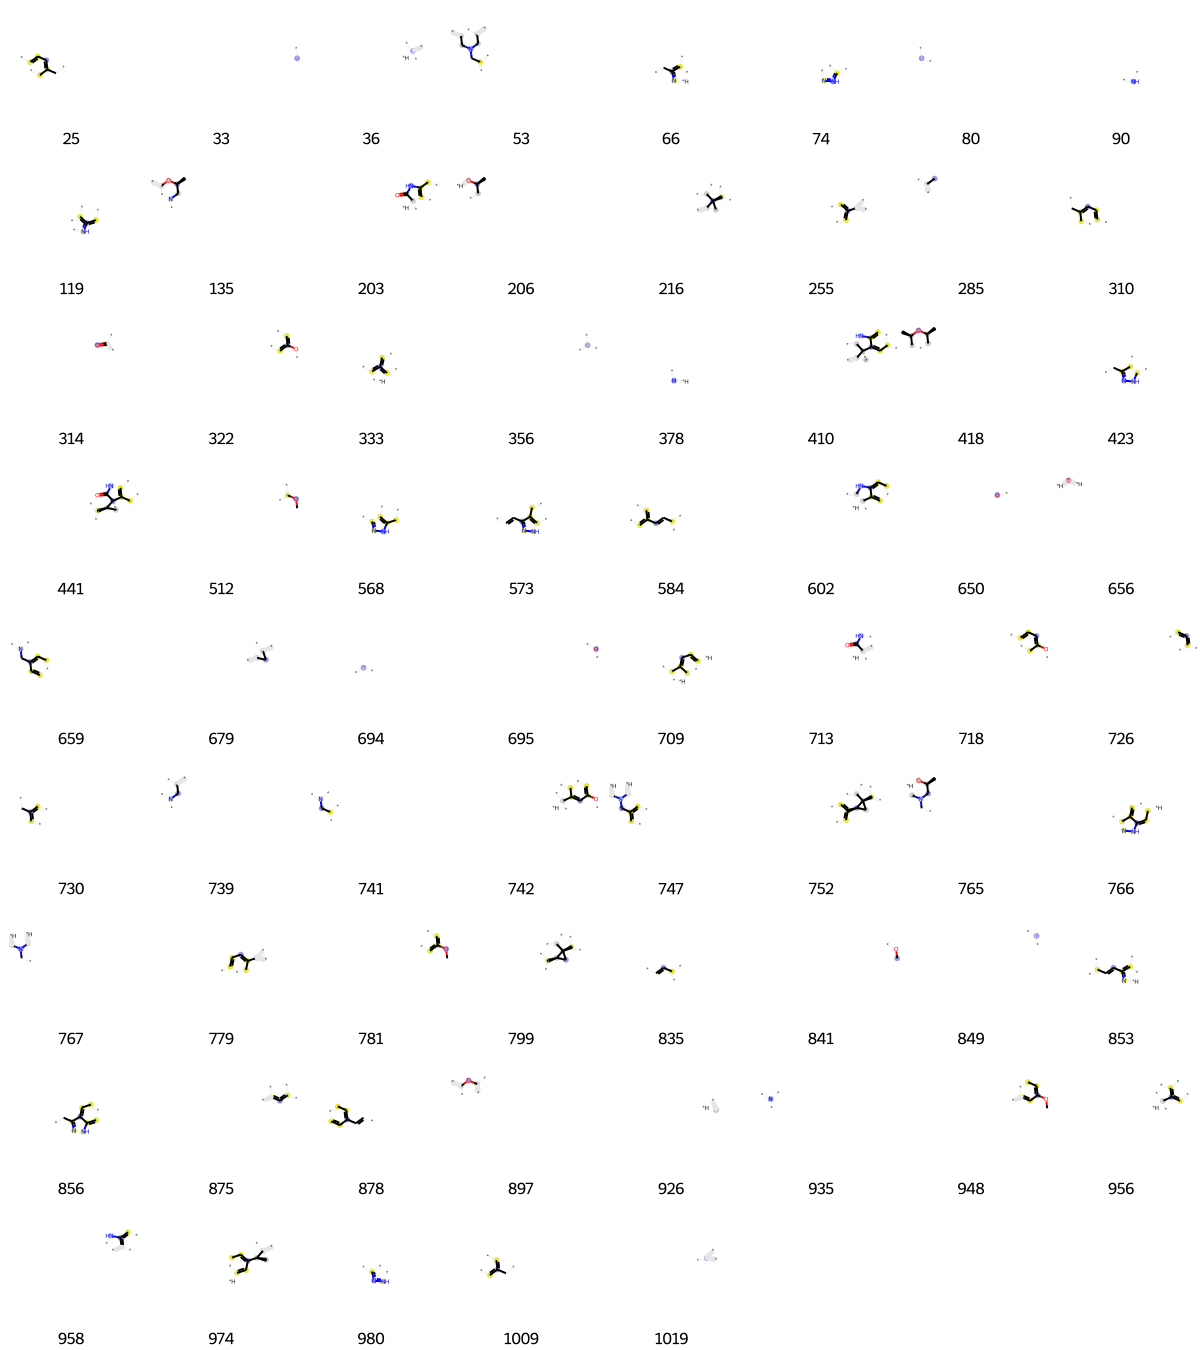

In [2058]:
prints = [(M13, x, bi) for x in fp13.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp13.GetOnBits ()])

In [2059]:
bi = {}

fp14= AllChem.GetMorganFingerprintAsBitVect(M14, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp14, fp_arr)
np.nonzero(fp_arr)
list(fp14.GetOnBits())

/usr/local/lib/python3.7/dist-packages/IPython/core/displayhook.py:260: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


[1,
 4,
 21,
 42,
 58,
 64,
 80,
 108,
 128,
 147,
 175,
 193,
 214,
 219,
 242,
 259,
 299,
 301,
 354,
 356,
 369,
 389,
 407,
 409,
 446,
 456,
 479,
 488,
 493,
 531,
 559,
 573,
 584,
 600,
 650,
 726,
 730,
 736,
 739,
 807,
 816,
 820,
 849,
 887,
 893,
 919,
 926,
 935,
 979,
 981,
 1019]

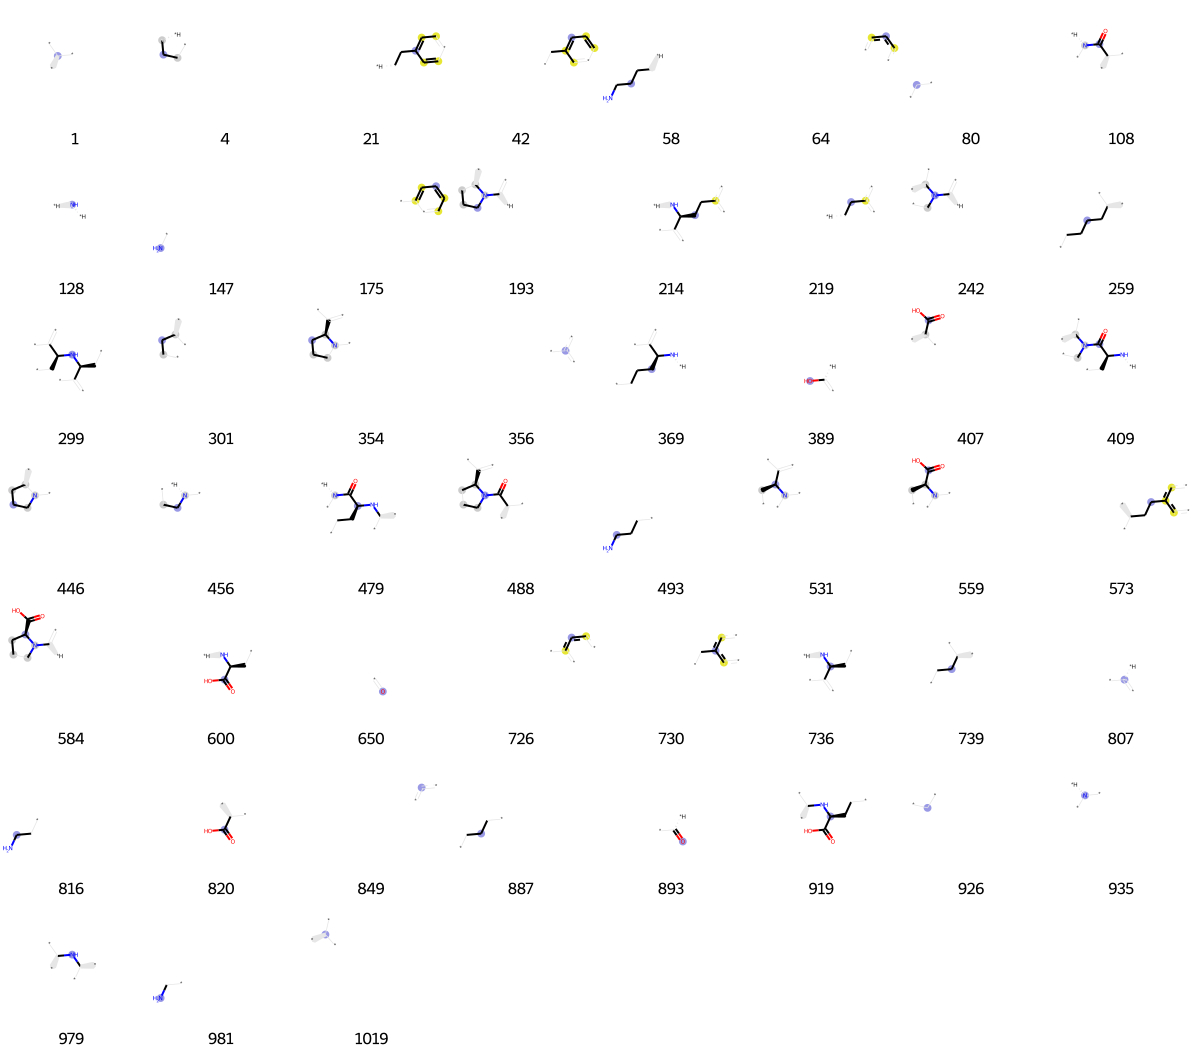

In [2060]:
prints = [(M14, x, bi) for x in fp14.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp14.GetOnBits ()])

In [2061]:
bi = {}

fp15= AllChem.GetMorganFingerprintAsBitVect(M15, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp15, fp_arr)
np.nonzero(fp_arr)
list(fp15.GetOnBits())

[3,
 10,
 33,
 45,
 53,
 62,
 80,
 87,
 90,
 115,
 212,
 221,
 226,
 249,
 268,
 288,
 294,
 305,
 335,
 355,
 356,
 399,
 430,
 456,
 483,
 512,
 538,
 594,
 607,
 636,
 649,
 695,
 714,
 739,
 752,
 791,
 826,
 830,
 841,
 849,
 864,
 875,
 922,
 926,
 935,
 946,
 947,
 969,
 1019]

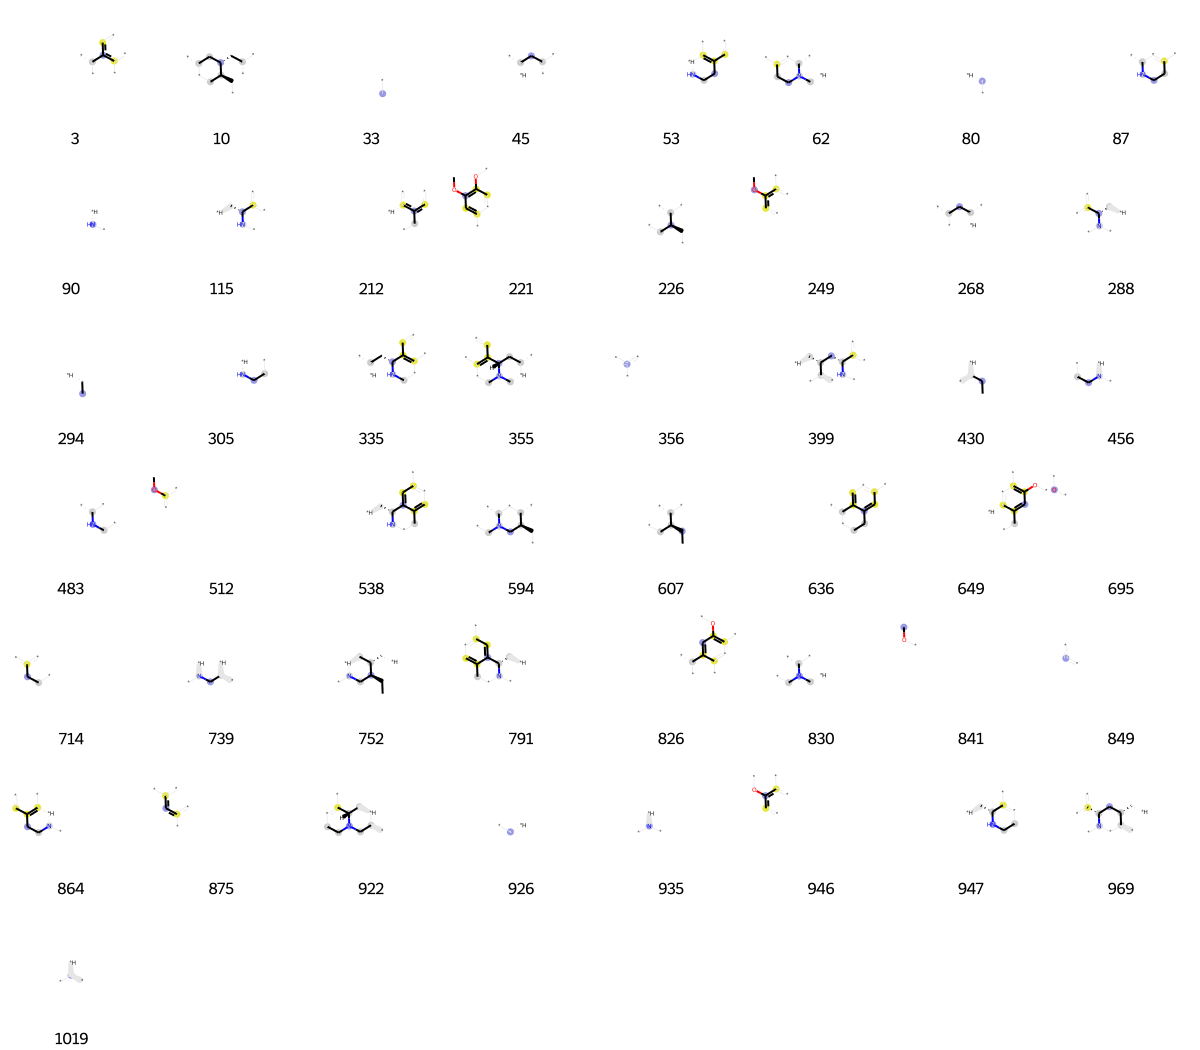

In [2062]:
prints = [(M15, x, bi) for x in fp15.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp15.GetOnBits ()])

In [2063]:
bi = {}

fp16= AllChem.GetMorganFingerprintAsBitVect(M16, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp16, fp_arr)
np.nonzero(fp_arr)
list(fp16.GetOnBits())

[1,
 33,
 46,
 53,
 64,
 80,
 108,
 139,
 160,
 175,
 231,
 242,
 247,
 268,
 310,
 341,
 351,
 356,
 367,
 378,
 389,
 398,
 407,
 428,
 431,
 440,
 455,
 531,
 557,
 559,
 568,
 596,
 640,
 648,
 650,
 676,
 690,
 698,
 726,
 730,
 741,
 743,
 744,
 757,
 807,
 849,
 875,
 881,
 893,
 922,
 924,
 926,
 932,
 935,
 954,
 969,
 970,
 994,
 1019]

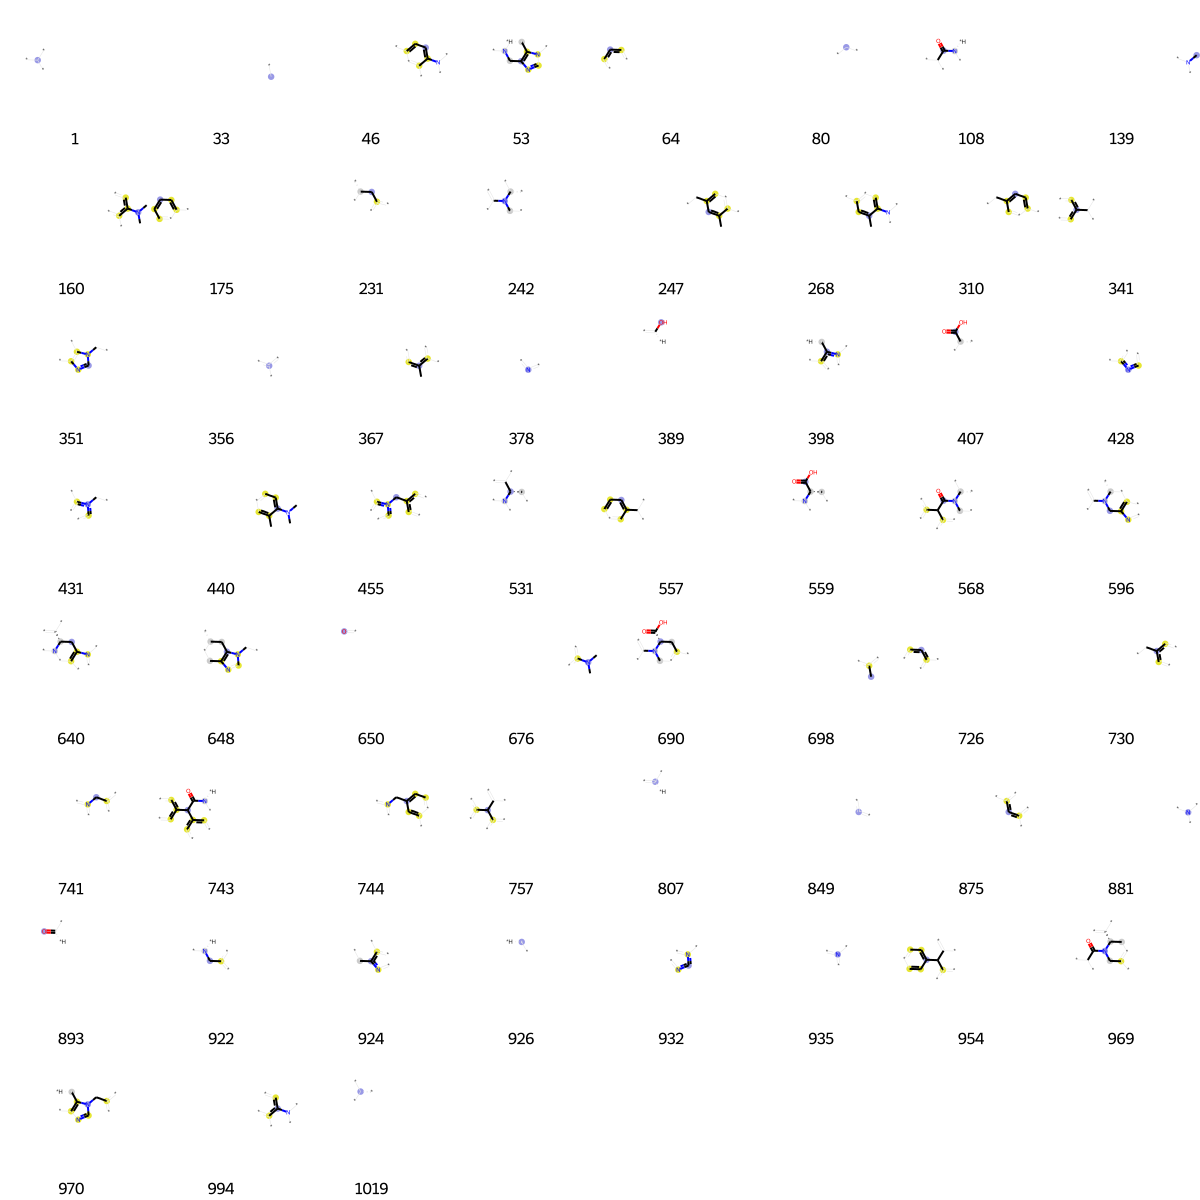

In [2064]:
prints = [(M16, x, bi) for x in fp16.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp16.GetOnBits ()])

In [2065]:
bi = {}

fp17= AllChem.GetMorganFingerprintAsBitVect(M17, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp17, fp_arr)
np.nonzero(fp_arr)
list(fp17.GetOnBits())

[7,
 17,
 33,
 46,
 84,
 98,
 121,
 128,
 136,
 191,
 194,
 216,
 310,
 322,
 356,
 386,
 486,
 512,
 561,
 562,
 580,
 650,
 656,
 659,
 695,
 726,
 730,
 781,
 792,
 807,
 816,
 841,
 849,
 865,
 875,
 893,
 896,
 913,
 954]

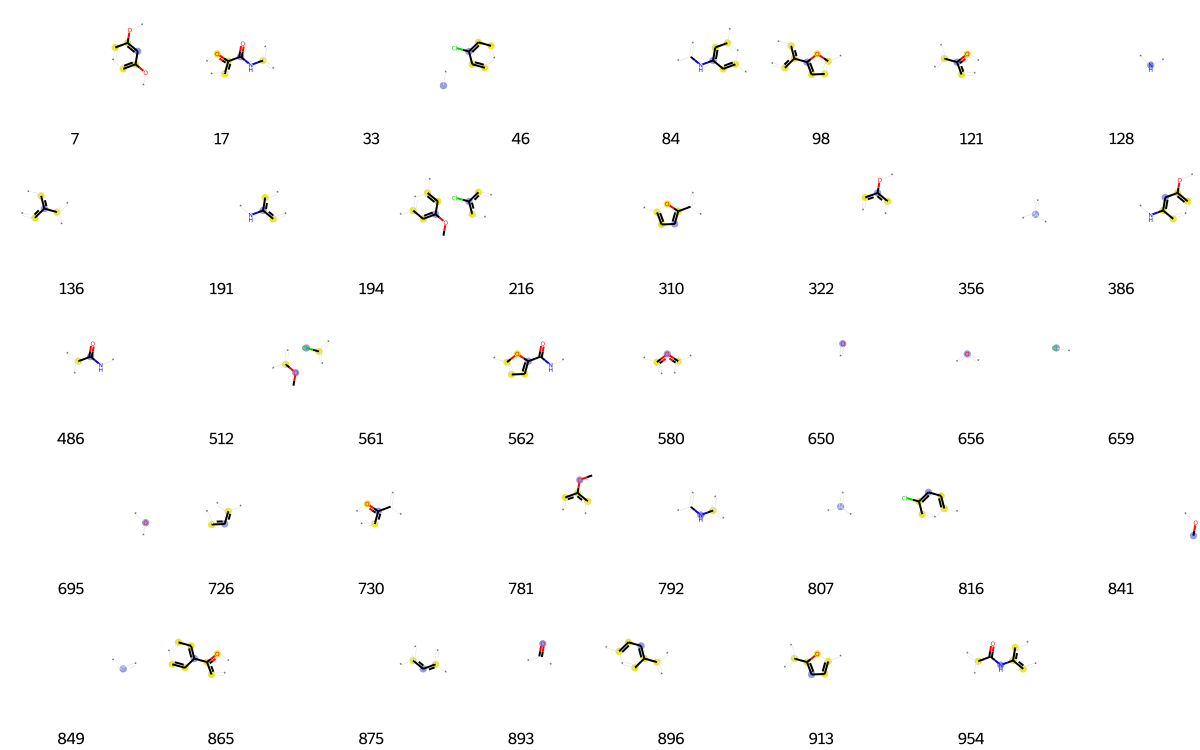

In [2066]:
prints = [(M17, x, bi) for x in fp17.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp17.GetOnBits ()])

In [2067]:
bi = {}

fp18= AllChem.GetMorganFingerprintAsBitVect(M18, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp18, fp_arr)
np.nonzero(fp_arr)
list(fp18.GetOnBits())

[4,
 14,
 33,
 80,
 93,
 97,
 121,
 134,
 170,
 181,
 209,
 226,
 270,
 301,
 356,
 367,
 389,
 398,
 401,
 407,
 446,
 456,
 479,
 543,
 553,
 554,
 650,
 675,
 694,
 698,
 726,
 738,
 739,
 767,
 781,
 807,
 849,
 869,
 881,
 893,
 914,
 926,
 935,
 974,
 1019,
 1021]

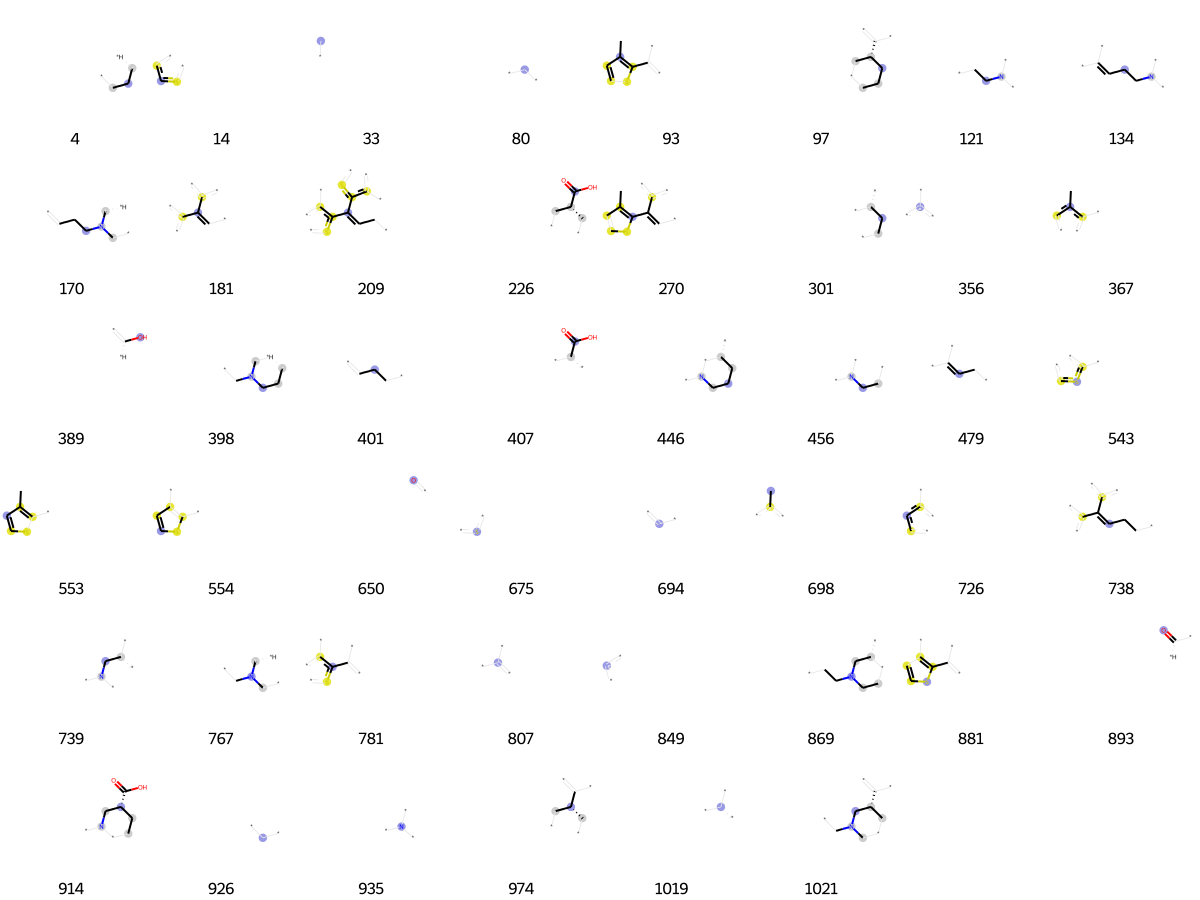

In [2068]:
prints = [(M18, x, bi) for x in fp18.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp18.GetOnBits ()])

In [2069]:
bi = {}

fp19= AllChem.GetMorganFingerprintAsBitVect(M19, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp19, fp_arr)
np.nonzero(fp_arr)
list(fp19.GetOnBits())

[9,
 33,
 52,
 64,
 68,
 90,
 119,
 143,
 170,
 175,
 309,
 322,
 356,
 361,
 389,
 512,
 650,
 695,
 718,
 721,
 726,
 733,
 751,
 781,
 793,
 807,
 831,
 835,
 841,
 849,
 875,
 893,
 915,
 948,
 961]

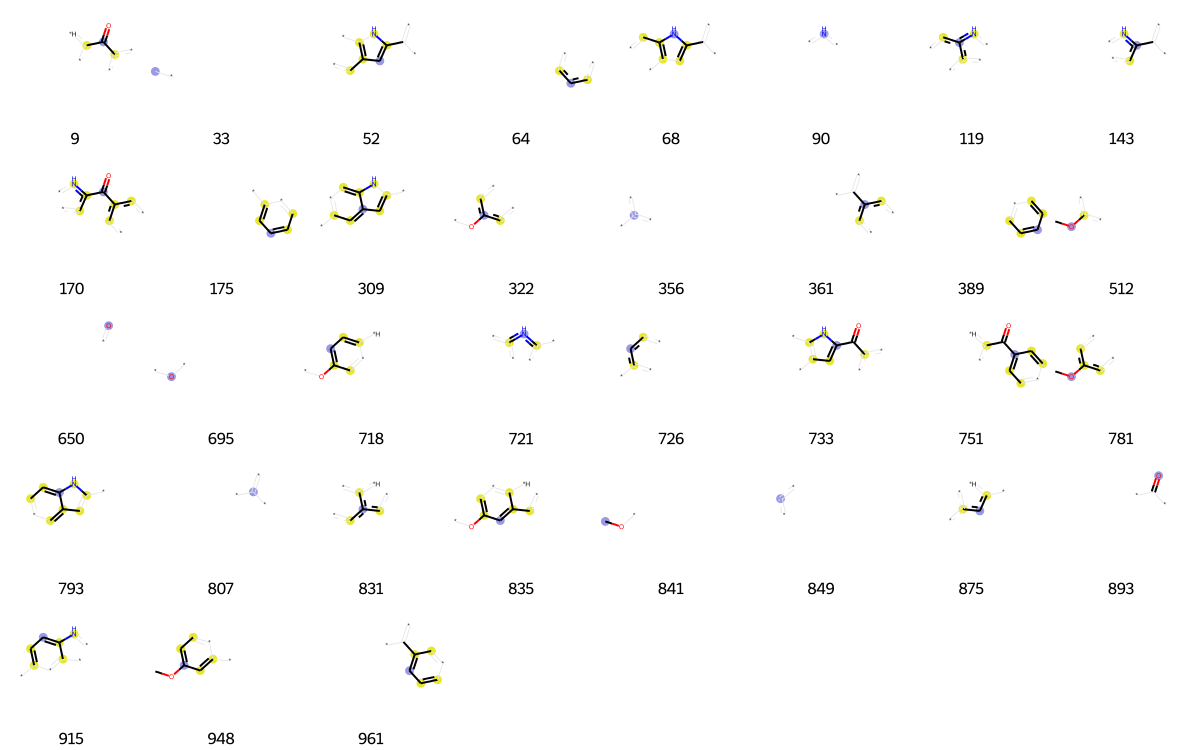

In [2070]:
prints = [(M19, x, bi) for x in fp19.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp19.GetOnBits ()])

In [2071]:
bi = {}

fp20= AllChem.GetMorganFingerprintAsBitVect(M20, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp20, fp_arr)
np.nonzero(fp_arr)
list(fp20.GetOnBits())

[10,
 33,
 43,
 64,
 67,
 81,
 114,
 121,
 123,
 130,
 139,
 140,
 175,
 197,
 262,
 299,
 301,
 323,
 333,
 335,
 356,
 378,
 386,
 407,
 411,
 419,
 429,
 448,
 456,
 463,
 478,
 498,
 515,
 544,
 549,
 646,
 650,
 656,
 668,
 696,
 699,
 726,
 807,
 809,
 838,
 842,
 849,
 875,
 881,
 893,
 904,
 926,
 935,
 938,
 945,
 967,
 982,
 994,
 1019]

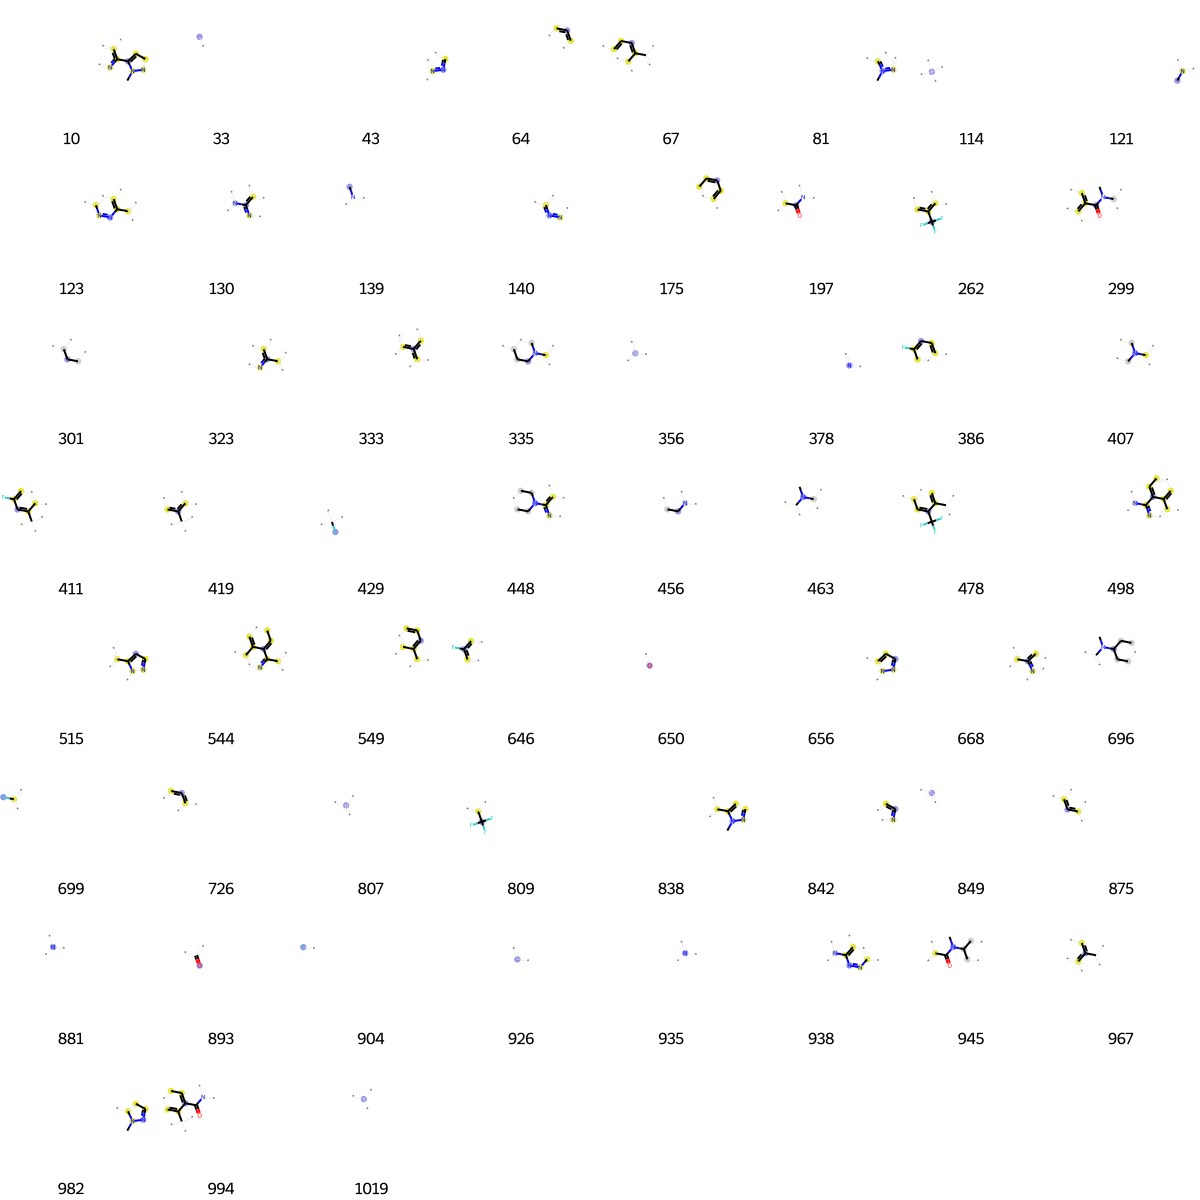

In [2072]:
prints = [(M20, x, bi) for x in fp20.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp20.GetOnBits ()])

In [2073]:
bi = {}

fp21= AllChem.GetMorganFingerprintAsBitVect(M21, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp21, fp_arr)
np.nonzero(fp_arr)
list(fp21.GetOnBits())

[1,
 7,
 14,
 33,
 36,
 42,
 46,
 53,
 59,
 66,
 75,
 80,
 130,
 149,
 164,
 171,
 179,
 186,
 189,
 225,
 233,
 236,
 242,
 268,
 283,
 285,
 294,
 308,
 314,
 356,
 357,
 368,
 429,
 463,
 485,
 497,
 504,
 507,
 520,
 525,
 526,
 550,
 551,
 571,
 583,
 595,
 598,
 609,
 621,
 647,
 650,
 656,
 669,
 671,
 674,
 679,
 681,
 684,
 687,
 689,
 695,
 698,
 710,
 722,
 731,
 739,
 745,
 750,
 757,
 787,
 798,
 801,
 802,
 807,
 815,
 827,
 841,
 849,
 857,
 859,
 862,
 866,
 883,
 897,
 918,
 926,
 931,
 933,
 937,
 941,
 964,
 982,
 1019,
 1020]

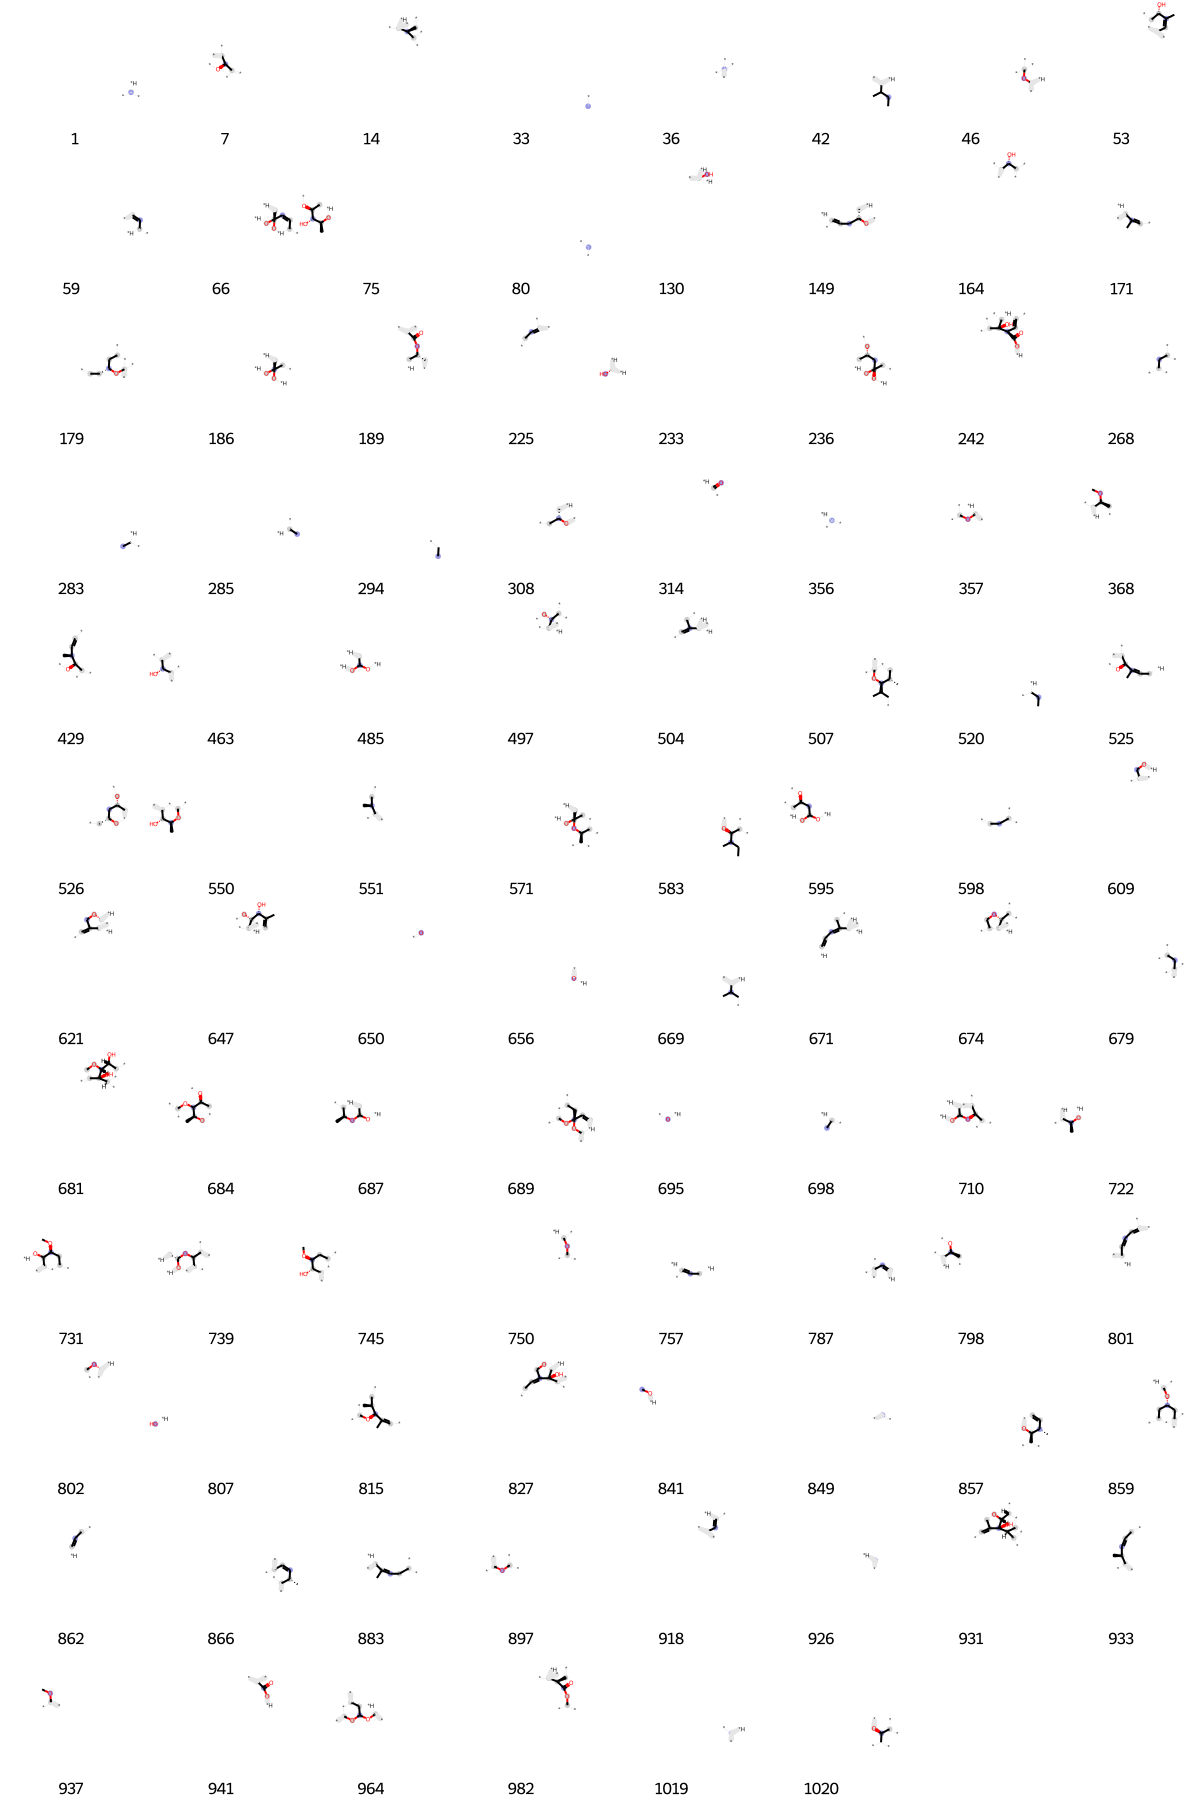

In [2074]:
prints = [(M21, x, bi) for x in fp21.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp21.GetOnBits ()])

In [2075]:
bi = {}

fp22= AllChem.GetMorganFingerprintAsBitVect(M22, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp22, fp_arr)
np.nonzero(fp_arr)
list(fp22.GetOnBits())

[1,
 4,
 33,
 42,
 50,
 63,
 64,
 73,
 79,
 80,
 86,
 104,
 114,
 117,
 128,
 140,
 147,
 154,
 159,
 163,
 175,
 179,
 203,
 227,
 263,
 266,
 268,
 276,
 289,
 301,
 306,
 354,
 356,
 375,
 376,
 378,
 389,
 392,
 411,
 447,
 476,
 486,
 531,
 539,
 573,
 585,
 587,
 603,
 612,
 636,
 650,
 658,
 689,
 726,
 730,
 736,
 739,
 747,
 807,
 831,
 837,
 847,
 849,
 855,
 857,
 874,
 876,
 888,
 890,
 893,
 898,
 926,
 927,
 935,
 953,
 998,
 1019]

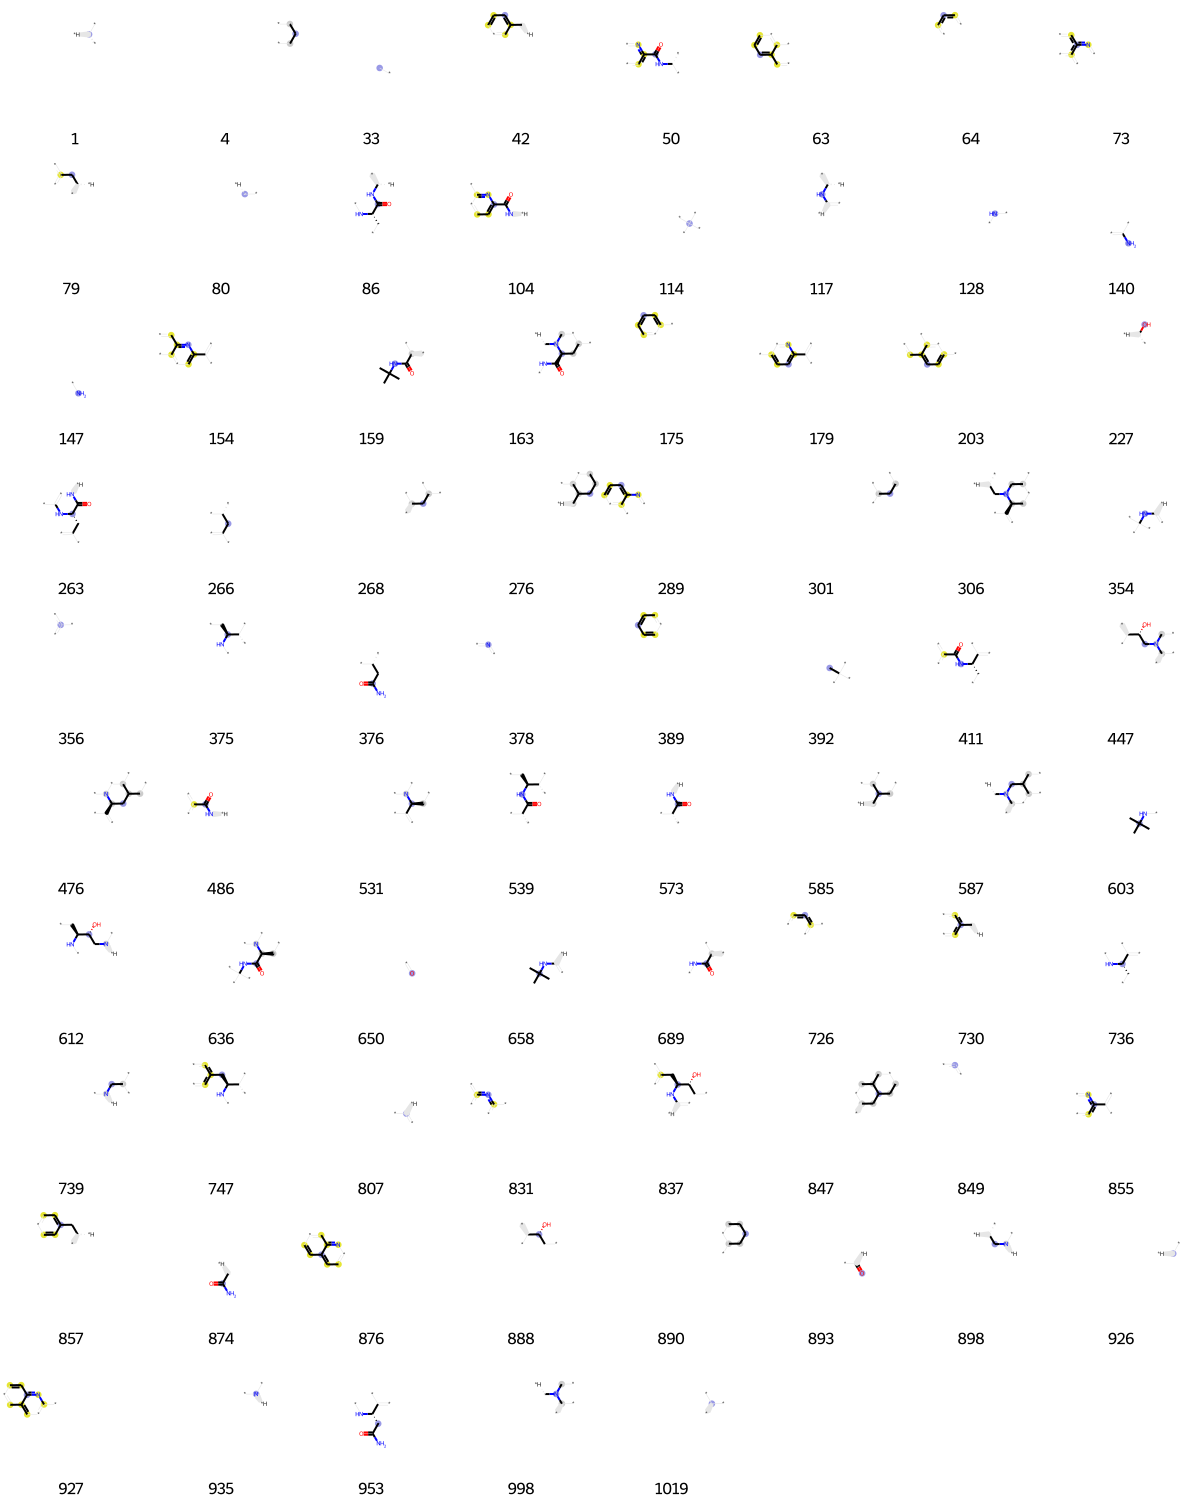

In [2076]:
prints = [(M22, x, bi) for x in fp22.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp22.GetOnBits ()])

In [2077]:
bi = {}

fp24= AllChem.GetMorganFingerprintAsBitVect(M24, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp24, fp_arr)
np.nonzero(fp_arr)
list(fp24.GetOnBits())

[1,
 4,
 33,
 64,
 80,
 128,
 175,
 227,
 237,
 283,
 338,
 356,
 366,
 463,
 514,
 550,
 561,
 581,
 592,
 606,
 659,
 706,
 726,
 782,
 807,
 849,
 949,
 974,
 1006]

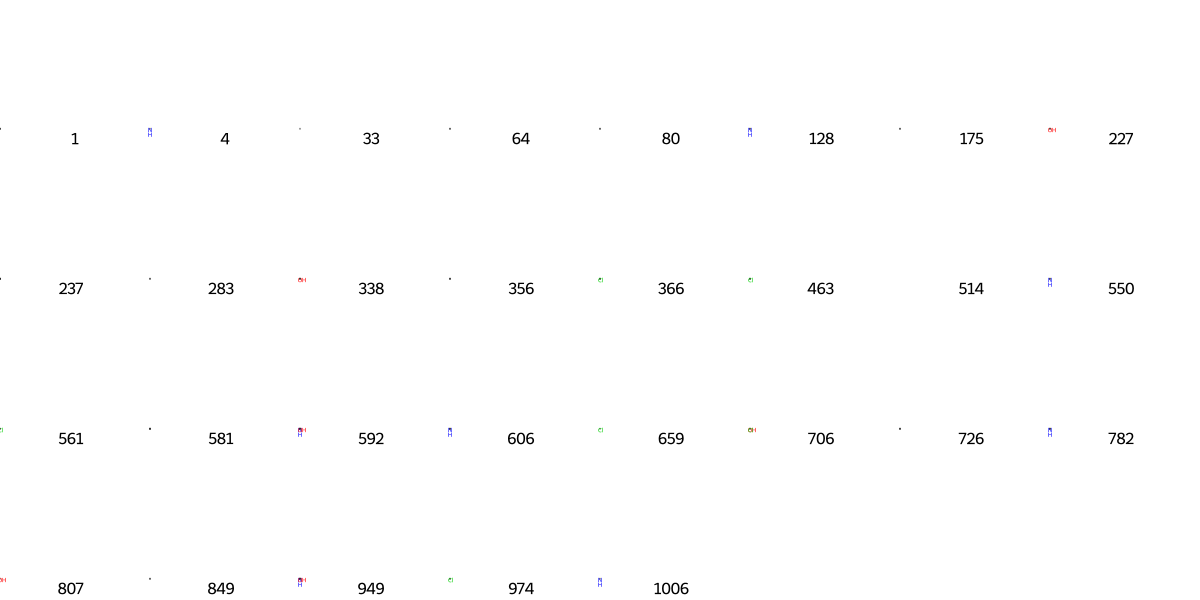

In [2078]:
prints = [(M24, x, bi) for x in fp24.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp24.GetOnBits ()])

In [2079]:
bi = {}

fp25= AllChem.GetMorganFingerprintAsBitVect(M25, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp25, fp_arr)
np.nonzero(fp_arr)
list(fp25.GetOnBits())

[1,
 13,
 31,
 33,
 46,
 64,
 80,
 131,
 139,
 175,
 216,
 274,
 302,
 316,
 341,
 356,
 378,
 389,
 428,
 448,
 501,
 508,
 561,
 567,
 650,
 652,
 659,
 670,
 693,
 694,
 695,
 703,
 726,
 807,
 810,
 816,
 819,
 829,
 842,
 845,
 849,
 880,
 881,
 893,
 908,
 927,
 976]

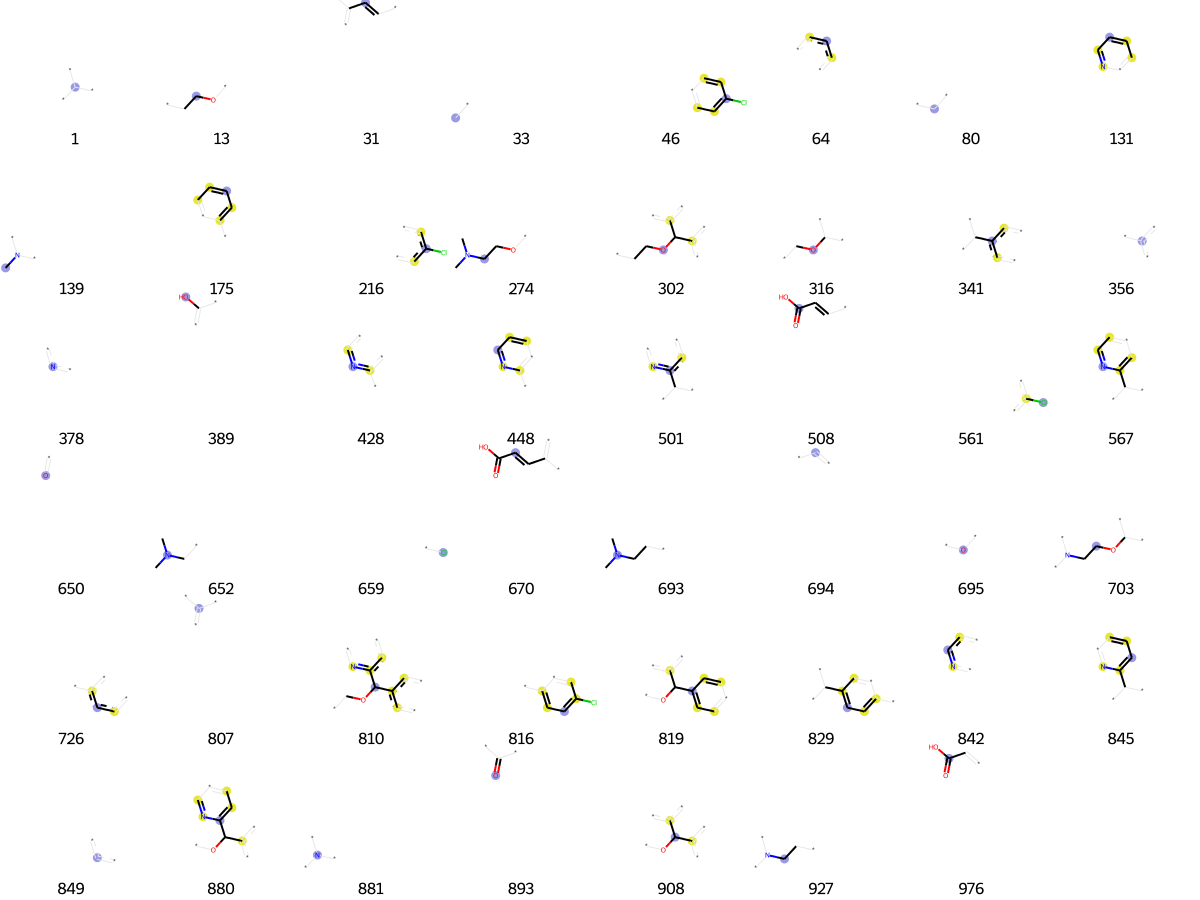

In [2080]:
prints = [(M25, x, bi) for x in fp25.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp25.GetOnBits ()])

In [2081]:
bi = {}

fp26= AllChem.GetMorganFingerprintAsBitVect(M26, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp26, fp_arr)
np.nonzero(fp_arr)
list(fp26.GetOnBits())

[2,
 4,
 5,
 33,
 36,
 125,
 126,
 130,
 175,
 215,
 222,
 239,
 250,
 253,
 255,
 314,
 356,
 362,
 389,
 407,
 423,
 456,
 611,
 650,
 673,
 675,
 694,
 697,
 712,
 725,
 767,
 776,
 807,
 893,
 913,
 919,
 926,
 935,
 974,
 1014,
 1019]

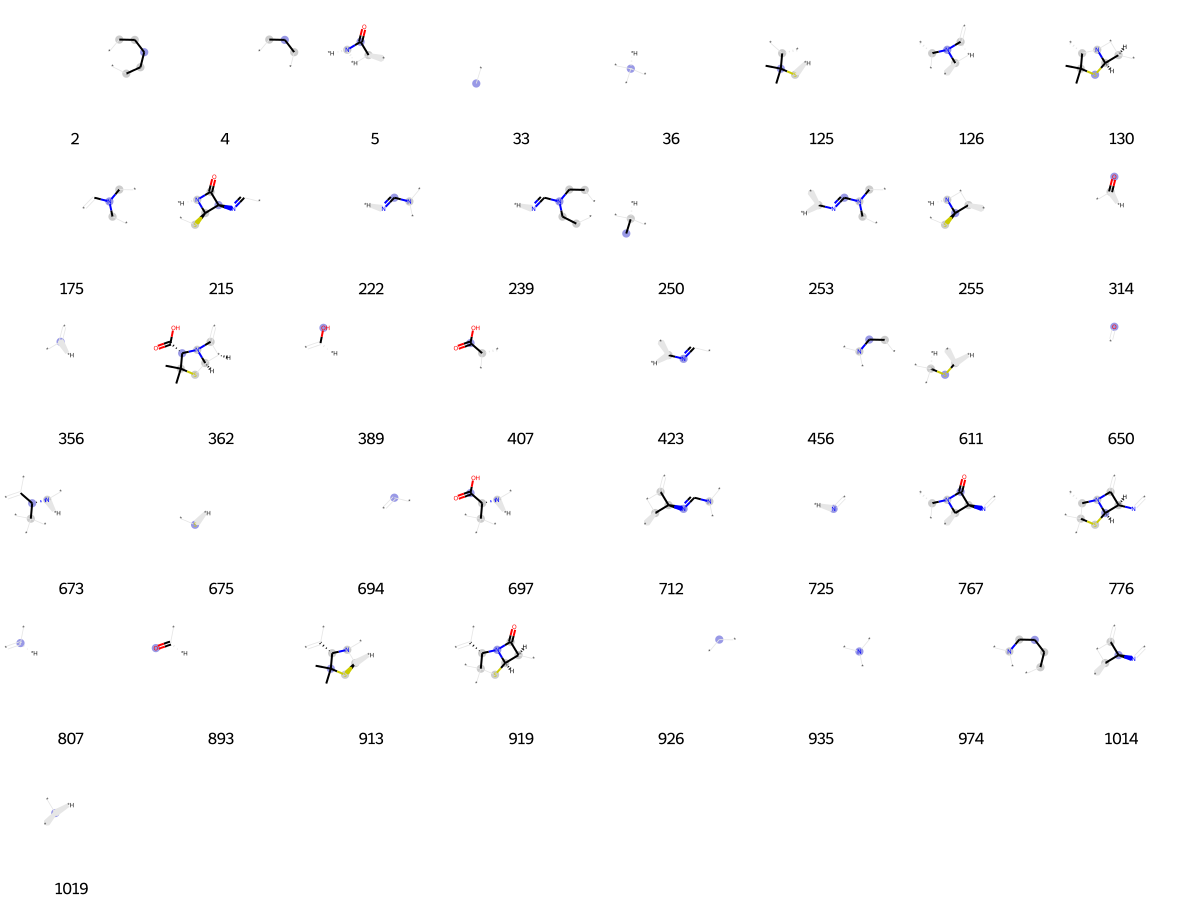

In [2082]:
prints = [(M26, x, bi) for x in fp26.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp26.GetOnBits ()])

In [2083]:
bi = {}

fp27= AllChem.GetMorganFingerprintAsBitVect(M27, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp27, fp_arr)
np.nonzero(fp_arr)
list(fp27.GetOnBits())

[1,
 33,
 79,
 80,
 106,
 147,
 169,
 171,
 197,
 248,
 249,
 356,
 378,
 389,
 403,
 461,
 518,
 578,
 627,
 650,
 656,
 698,
 786,
 807,
 820,
 825,
 835,
 893,
 989,
 1010]

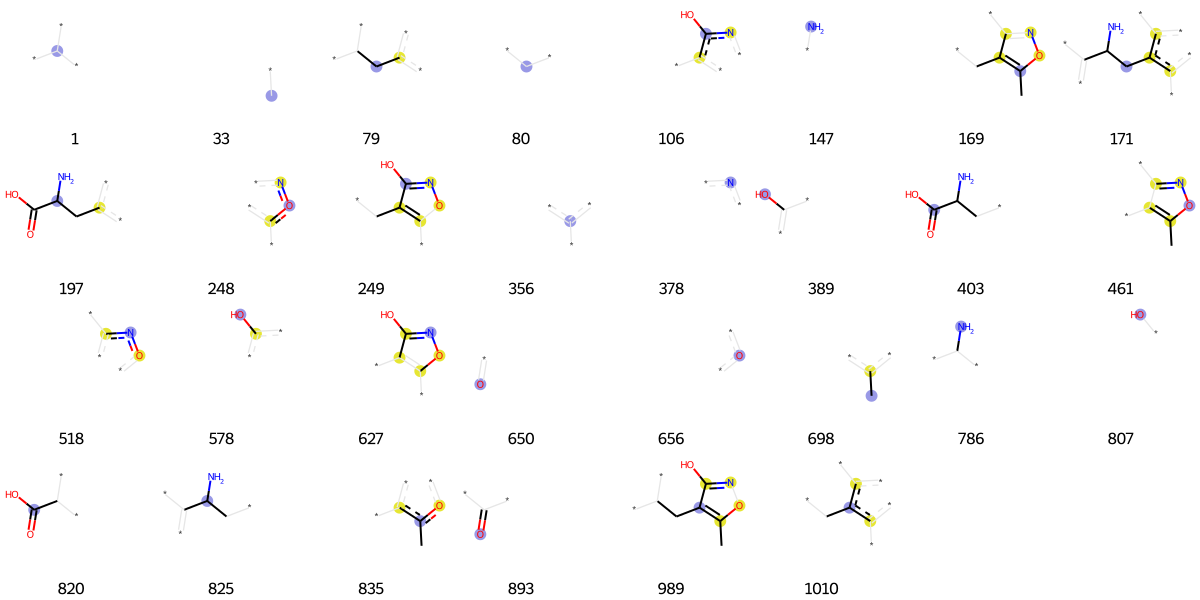

In [2084]:
prints = [(M27, x, bi) for x in fp27.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp27.GetOnBits ()])

In [2085]:
bi = {}

fp28= AllChem.GetMorganFingerprintAsBitVect(M28, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp28, fp_arr)
np.nonzero(fp_arr)
list(fp28.GetOnBits())

[15,
 33,
 36,
 64,
 68,
 130,
 139,
 140,
 147,
 250,
 253,
 268,
 272,
 309,
 314,
 317,
 356,
 371,
 423,
 432,
 436,
 447,
 452,
 464,
 514,
 519,
 525,
 558,
 578,
 583,
 595,
 606,
 611,
 628,
 650,
 658,
 673,
 723,
 726,
 736,
 764,
 799,
 807,
 824,
 829,
 849,
 874,
 881,
 893,
 926,
 956,
 1003,
 1005,
 1007,
 1019]

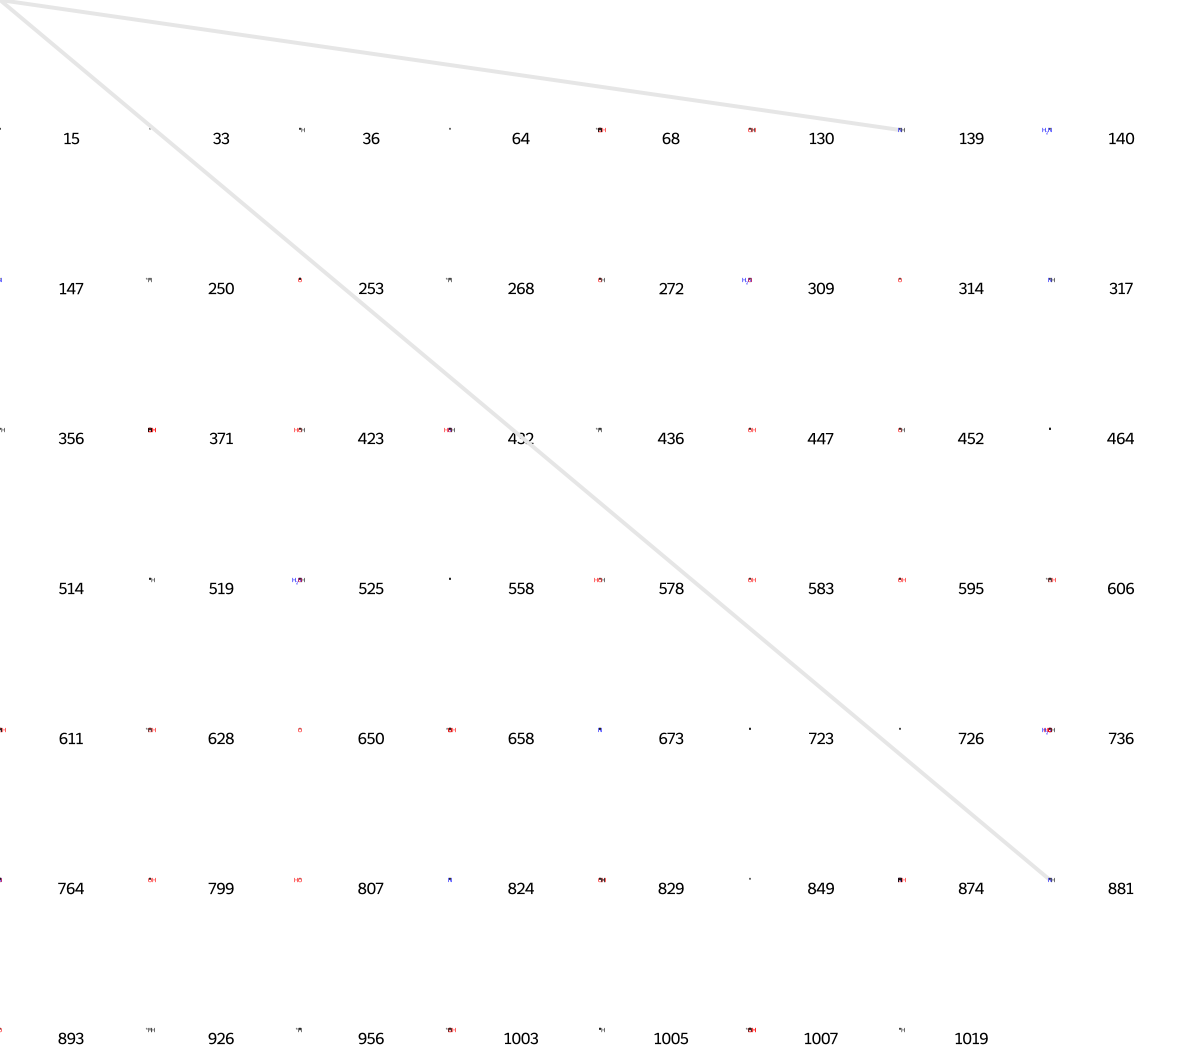

In [2086]:
prints = [(M28, x, bi) for x in fp28.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp28.GetOnBits ()])

In [2087]:
bi = {}

fp29= AllChem.GetMorganFingerprintAsBitVect(M29, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp29, fp_arr)
np.nonzero(fp_arr)
list(fp29.GetOnBits())

[90,
 119,
 165,
 214,
 216,
 274,
 307,
 314,
 356,
 432,
 533,
 561,
 580,
 650,
 656,
 659,
 721,
 726,
 743,
 784,
 786,
 816,
 849,
 875,
 986]

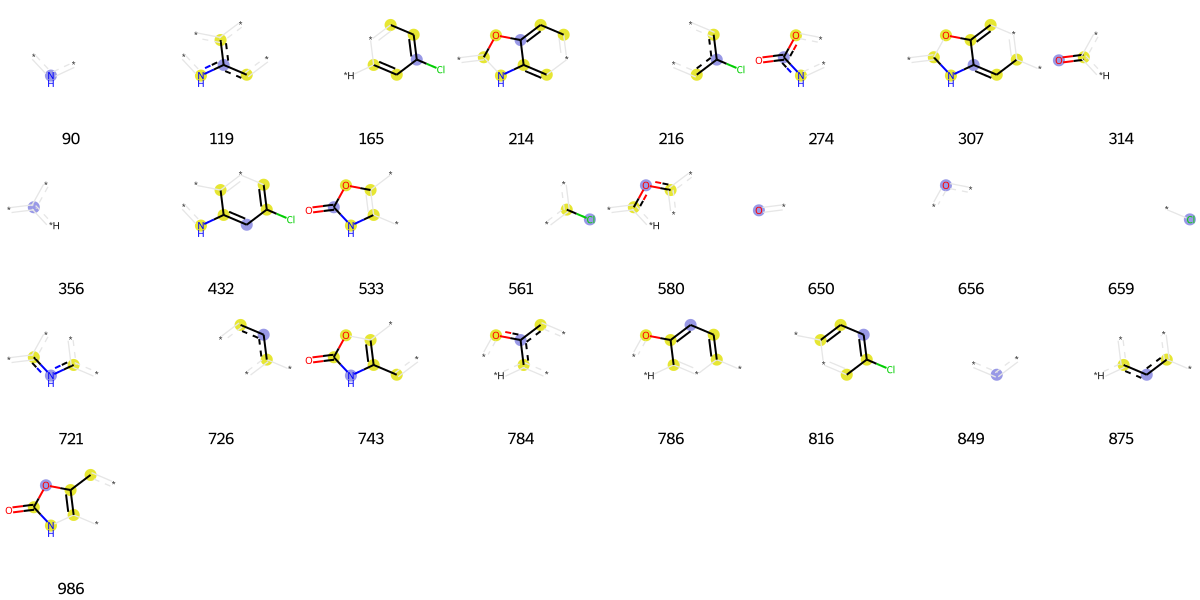

In [2088]:
prints = [(M29, x, bi) for x in fp29.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp29.GetOnBits ()])

In [2089]:
bi = {}

fp30= AllChem.GetMorganFingerprintAsBitVect(M30, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp30, fp_arr)
np.nonzero(fp_arr)
list(fp30.GetOnBits())

[1,
 14,
 33,
 36,
 41,
 59,
 64,
 102,
 119,
 121,
 147,
 174,
 175,
 193,
 221,
 227,
 250,
 268,
 285,
 341,
 356,
 367,
 389,
 390,
 509,
 557,
 650,
 679,
 695,
 726,
 734,
 807,
 825,
 837,
 849,
 893,
 926,
 935,
 963,
 996,
 1019]

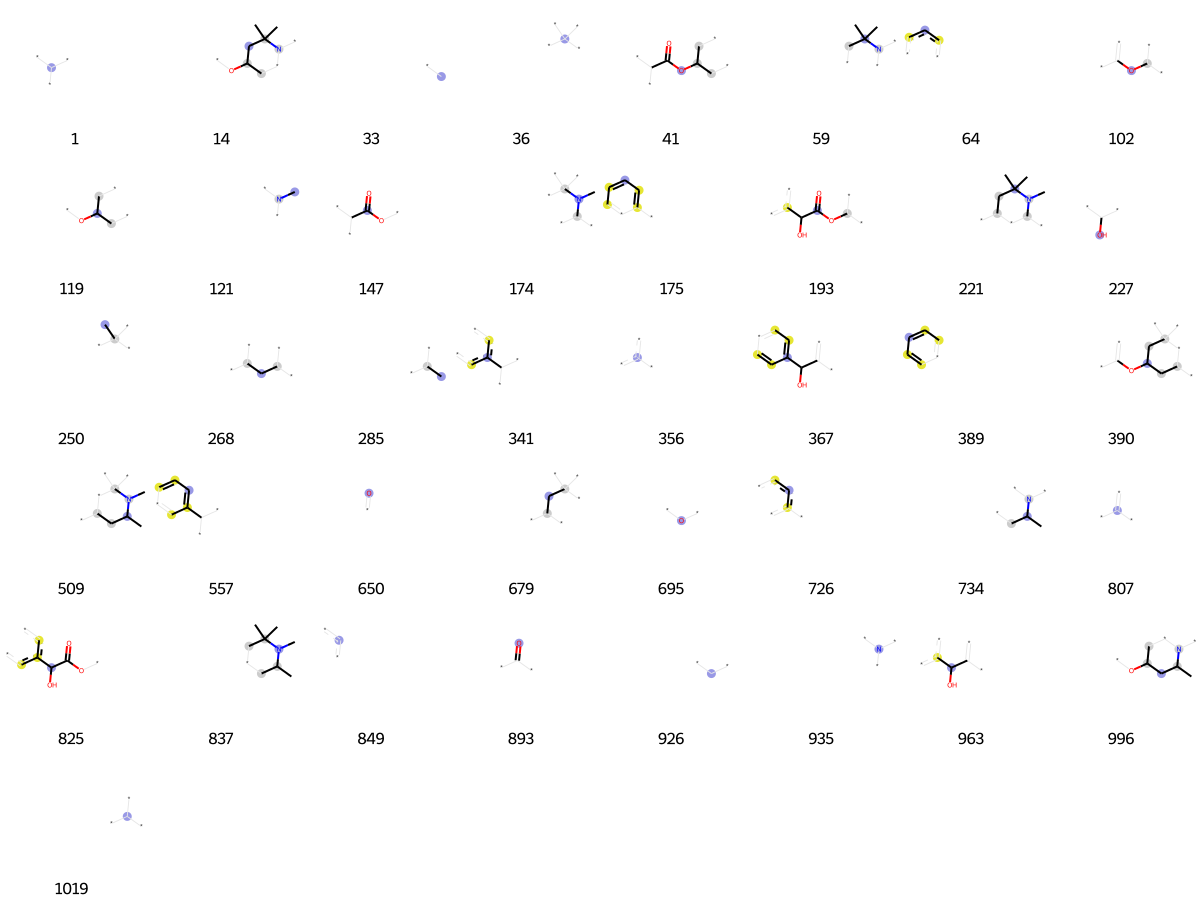

In [2090]:
prints = [(M30, x, bi) for x in fp30.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp30.GetOnBits ()])

In [2091]:
bi = {}

fp31= AllChem.GetMorganFingerprintAsBitVect(M31, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp31, fp_arr)
np.nonzero(fp_arr)
list(fp31.GetOnBits())

[59,
 83,
 90,
 146,
 147,
 176,
 207,
 250,
 252,
 266,
 268,
 273,
 293,
 301,
 350,
 355,
 356,
 365,
 366,
 392,
 452,
 469,
 561,
 568,
 583,
 605,
 622,
 625,
 650,
 659,
 691,
 802,
 833,
 840,
 848,
 849,
 852,
 861,
 875,
 917,
 921,
 924,
 926,
 958,
 1019,
 1020]

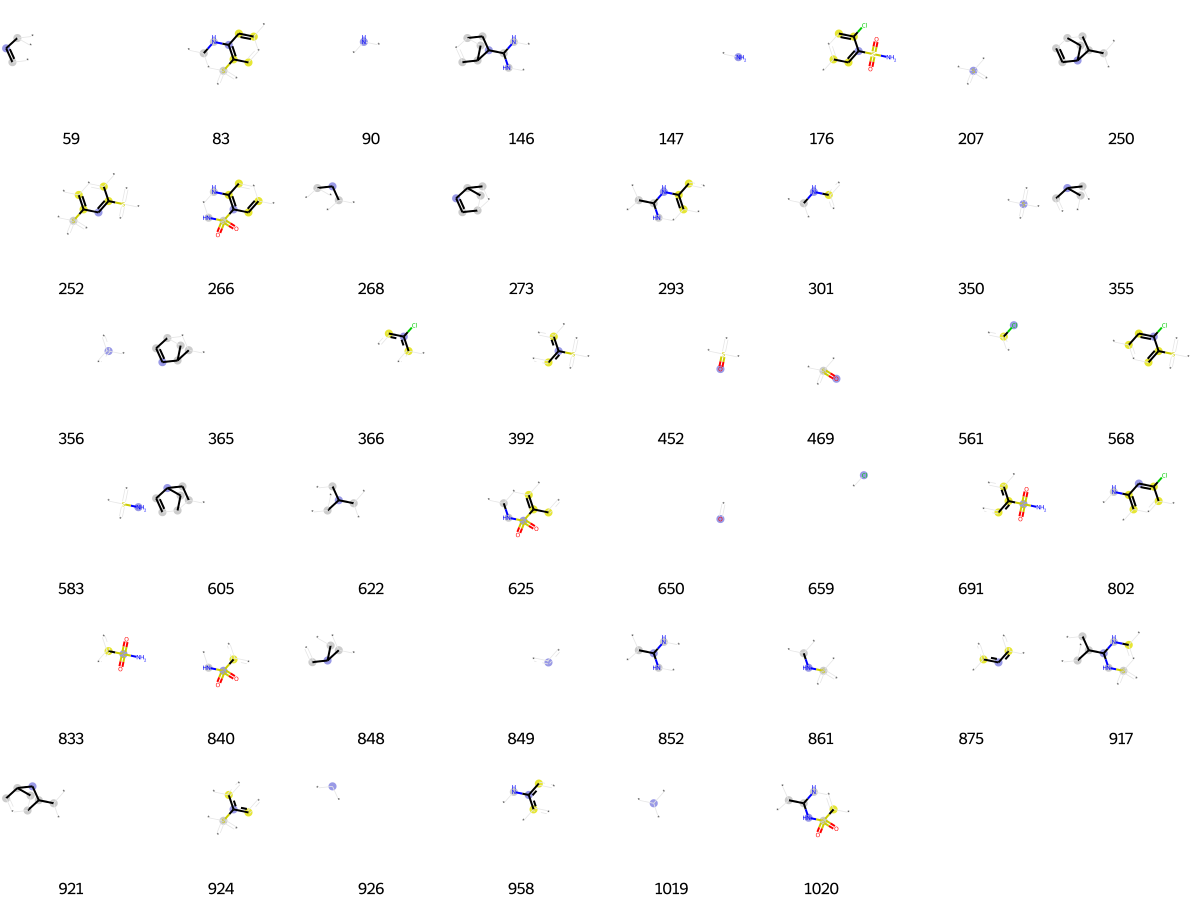

In [2092]:
prints = [(M31, x, bi) for x in fp31.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp31.GetOnBits ()])

In [2093]:
bi = {}

fp32= AllChem.GetMorganFingerprintAsBitVect(M32, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp32, fp_arr)
np.nonzero(fp_arr)
list(fp32.GetOnBits())

[1,
 4,
 33,
 53,
 80,
 102,
 118,
 128,
 169,
 191,
 227,
 245,
 283,
 322,
 356,
 421,
 428,
 430,
 530,
 550,
 606,
 650,
 658,
 695,
 718,
 726,
 782,
 792,
 807,
 843,
 849,
 893,
 1006,
 1014,
 1017]

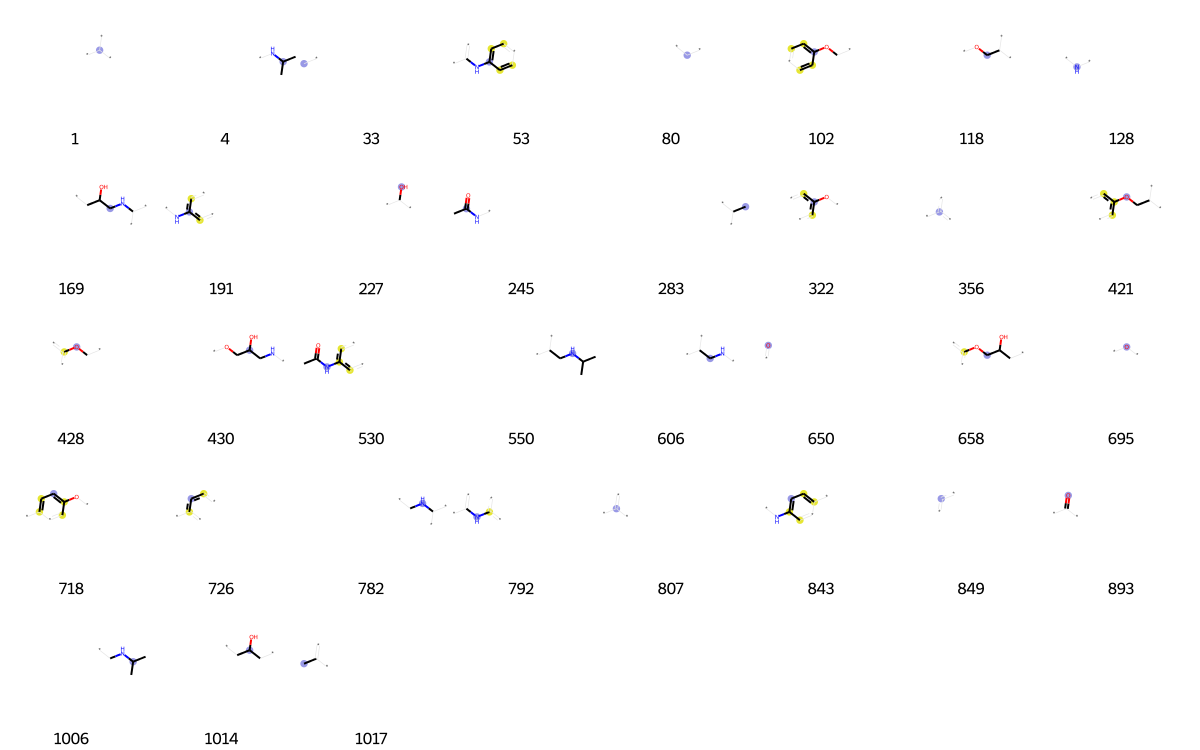

In [2094]:
prints = [(M32, x, bi) for x in fp32.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp32.GetOnBits ()])

In [2095]:
bi = {}

fp33= AllChem.GetMorganFingerprintAsBitVect(M33, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp33, fp_arr)
np.nonzero(fp_arr)
list(fp33.GetOnBits())

[1,
 33,
 38,
 63,
 64,
 80,
 139,
 142,
 175,
 197,
 269,
 283,
 294,
 323,
 332,
 333,
 352,
 356,
 366,
 378,
 404,
 488,
 503,
 512,
 520,
 524,
 549,
 561,
 628,
 650,
 659,
 726,
 807,
 831,
 836,
 849,
 855,
 875,
 881,
 893,
 956,
 974,
 983,
 984]

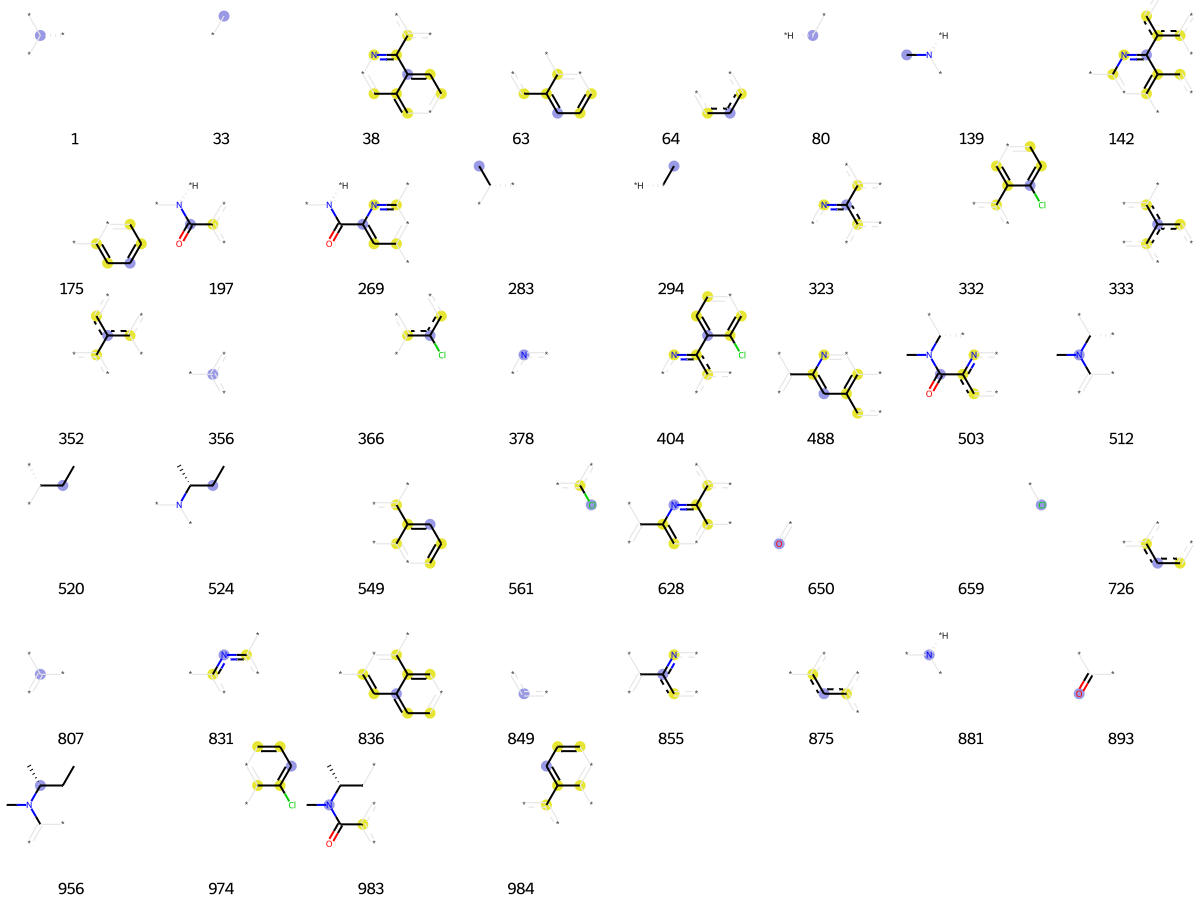

In [2096]:
prints = [(M33, x, bi) for x in fp33.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp33.GetOnBits ()])

In [2097]:
bi = {}

fp34= AllChem.GetMorganFingerprintAsBitVect(M34, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp34, fp_arr)
np.nonzero(fp_arr)
list(fp34.GetOnBits())

[13,
 22,
 33,
 36,
 50,
 53,
 80,
 101,
 114,
 138,
 156,
 175,
 210,
 211,
 222,
 233,
 249,
 250,
 265,
 267,
 268,
 282,
 284,
 299,
 301,
 357,
 392,
 401,
 412,
 423,
 453,
 463,
 478,
 479,
 489,
 492,
 549,
 550,
 555,
 558,
 576,
 608,
 610,
 656,
 669,
 694,
 695,
 729,
 740,
 807,
 820,
 849,
 865,
 869,
 871,
 884,
 889,
 897,
 904,
 905,
 926,
 927,
 939,
 953,
 991,
 1009,
 1017,
 1019]

In [2098]:
bi = {}

fp35= AllChem.GetMorganFingerprintAsBitVect(M35, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp35, fp_arr)
np.nonzero(fp_arr)
list(fp35.GetOnBits())

[5,
 15,
 33,
 64,
 70,
 102,
 114,
 120,
 175,
 239,
 271,
 301,
 356,
 389,
 392,
 393,
 426,
 562,
 575,
 585,
 603,
 609,
 625,
 644,
 650,
 653,
 695,
 721,
 726,
 761,
 780,
 798,
 807,
 849,
 884,
 893,
 926,
 993,
 1019]

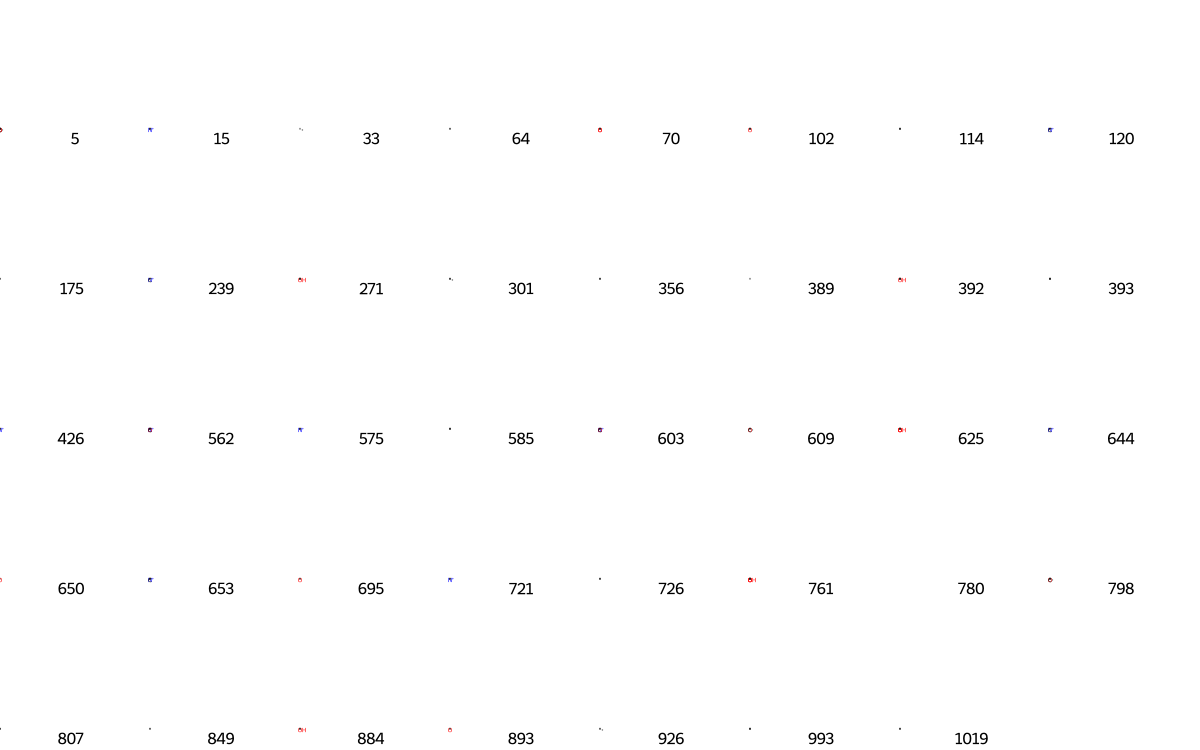

In [2099]:
prints = [(M35, x, bi) for x in fp35.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp35.GetOnBits ()])

In [2100]:
bi = {}

fp36= AllChem.GetMorganFingerprintAsBitVect(M36, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp36, fp_arr)
np.nonzero(fp_arr)
list(fp36.GetOnBits())

[27,
 33,
 36,
 100,
 271,
 285,
 301,
 307,
 356,
 360,
 361,
 421,
 434,
 458,
 553,
 607,
 650,
 682,
 694,
 699,
 714,
 728,
 734,
 812,
 833,
 849,
 871,
 875,
 888,
 904,
 926,
 935,
 1004,
 1008,
 1019]

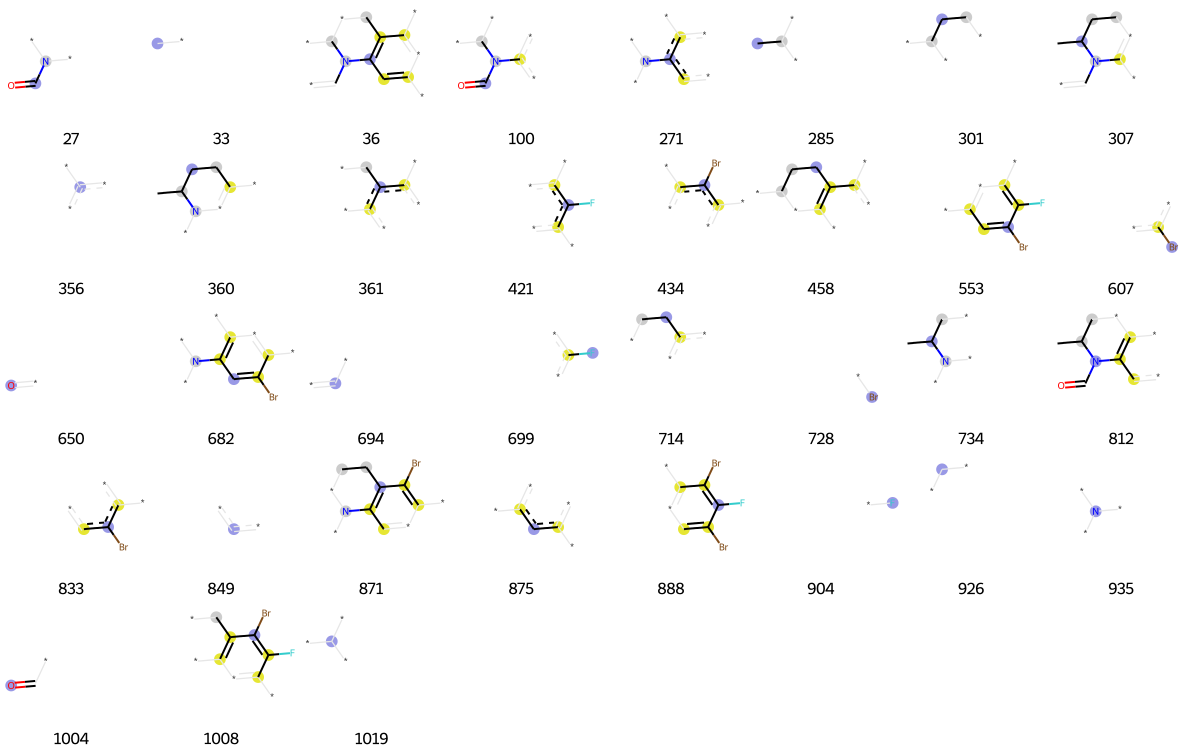

In [2101]:
prints = [(M36, x, bi) for x in fp36.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp36.GetOnBits ()])

In [2102]:
bi = {}

fp37= AllChem.GetMorganFingerprintAsBitVect(M37, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp37, fp_arr)
np.nonzero(fp_arr)
list(fp37.GetOnBits())

[5,
 33,
 39,
 51,
 70,
 80,
 96,
 114,
 128,
 140,
 145,
 147,
 150,
 186,
 201,
 214,
 228,
 229,
 231,
 233,
 235,
 240,
 255,
 270,
 294,
 314,
 336,
 345,
 356,
 372,
 378,
 387,
 392,
 417,
 430,
 433,
 470,
 479,
 484,
 487,
 543,
 552,
 598,
 635,
 650,
 675,
 684,
 694,
 695,
 698,
 745,
 753,
 762,
 792,
 807,
 831,
 849,
 855,
 859,
 872,
 882,
 893,
 898,
 926,
 932,
 935,
 964,
 982,
 997,
 998,
 1008,
 1019]

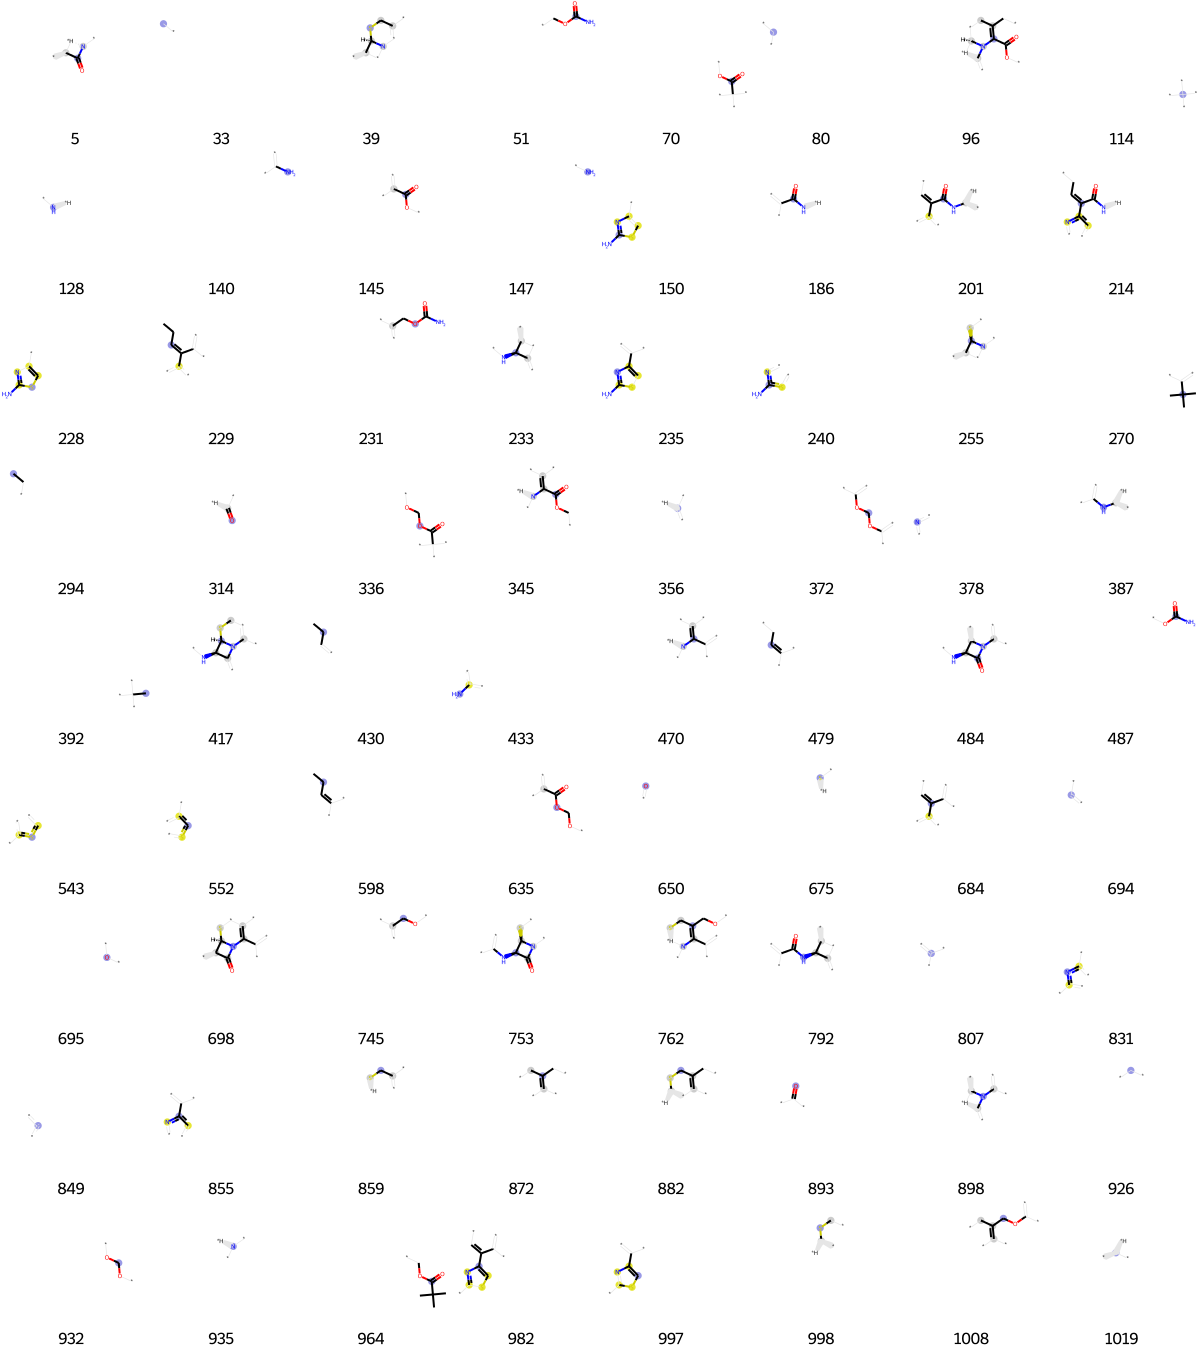

In [2103]:
prints = [(M37, x, bi) for x in fp37.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp37.GetOnBits ()])

In [2104]:
bi = {}

fp38= AllChem.GetMorganFingerprintAsBitVect(M38, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp38, fp_arr)
np.nonzero(fp_arr)
list(fp38.GetOnBits())

[1,
 16,
 33,
 61,
 64,
 80,
 99,
 117,
 128,
 157,
 200,
 216,
 246,
 281,
 282,
 283,
 300,
 323,
 339,
 350,
 352,
 356,
 360,
 378,
 392,
 399,
 409,
 421,
 428,
 452,
 464,
 519,
 558,
 561,
 583,
 606,
 615,
 623,
 650,
 653,
 659,
 667,
 692,
 695,
 699,
 704,
 710,
 723,
 726,
 734,
 787,
 795,
 807,
 819,
 831,
 841,
 842,
 843,
 849,
 859,
 875,
 893,
 900,
 904,
 932,
 934,
 935,
 980,
 994]

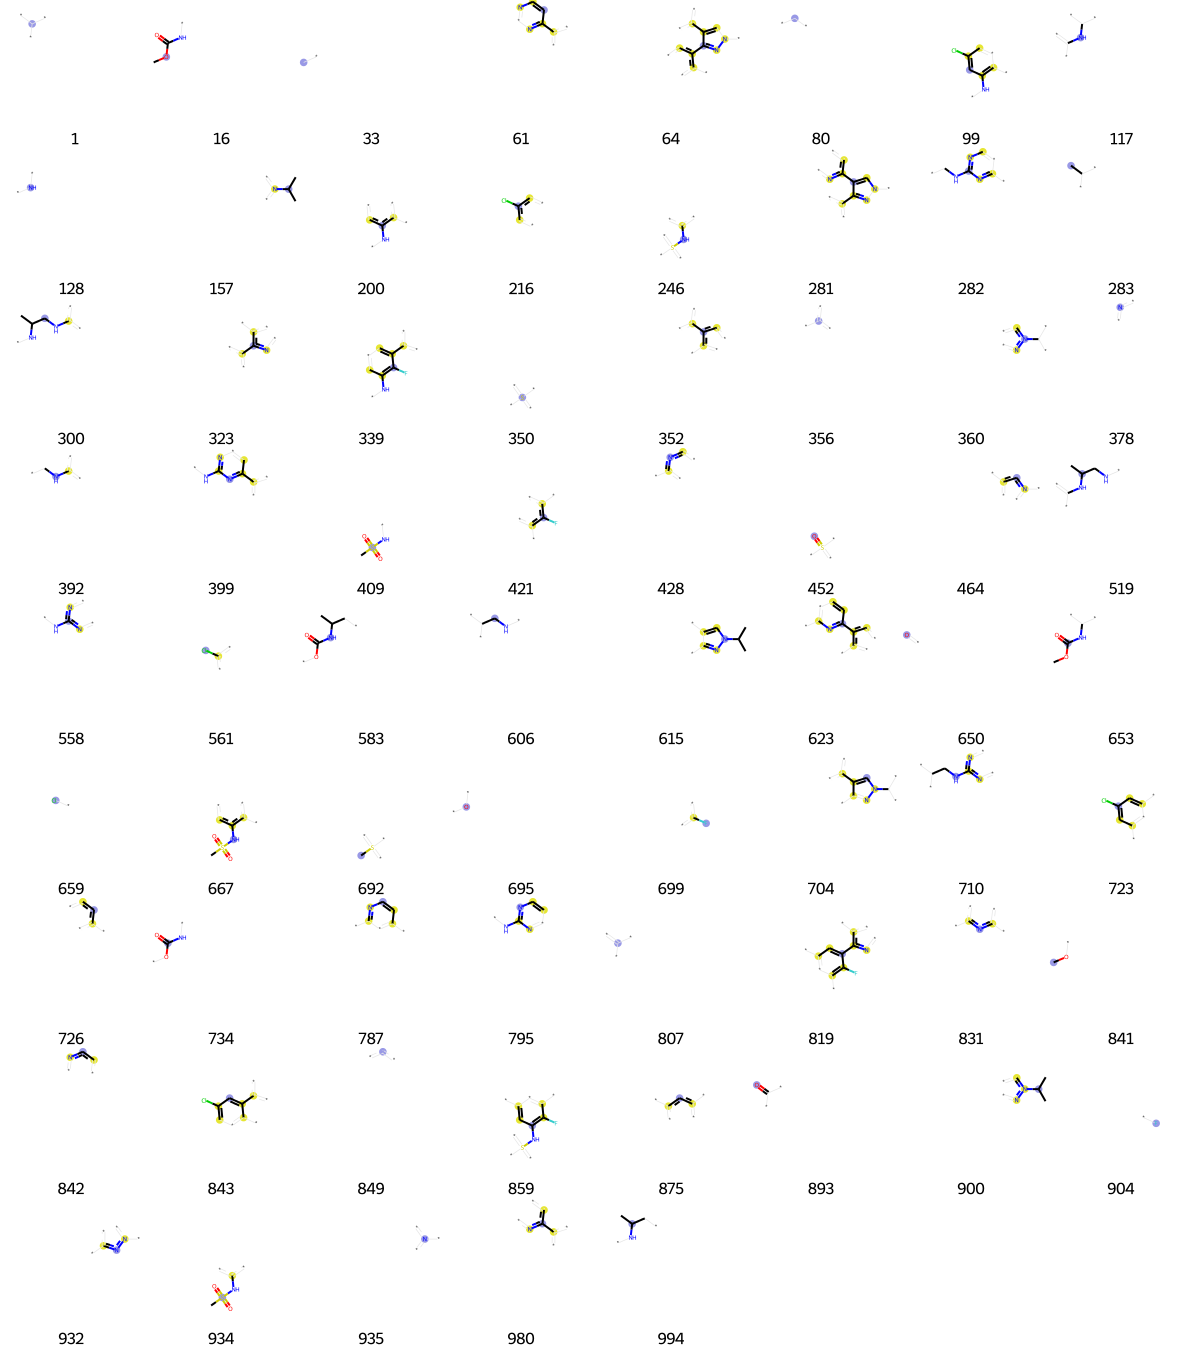

In [2105]:
prints = [(M38, x, bi) for x in fp38.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp38.GetOnBits ()])

In [2106]:
bi = {}

fp39= AllChem.GetMorganFingerprintAsBitVect(M39, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp39, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[4,
 24,
 33,
 44,
 79,
 80,
 85,
 99,
 102,
 128,
 147,
 165,
 193,
 197,
 255,
 284,
 325,
 356,
 378,
 401,
 424,
 428,
 432,
 433,
 435,
 473,
 511,
 544,
 650,
 659,
 698,
 725,
 762,
 807,
 815,
 827,
 831,
 840,
 849,
 881,
 893,
 927,
 979]

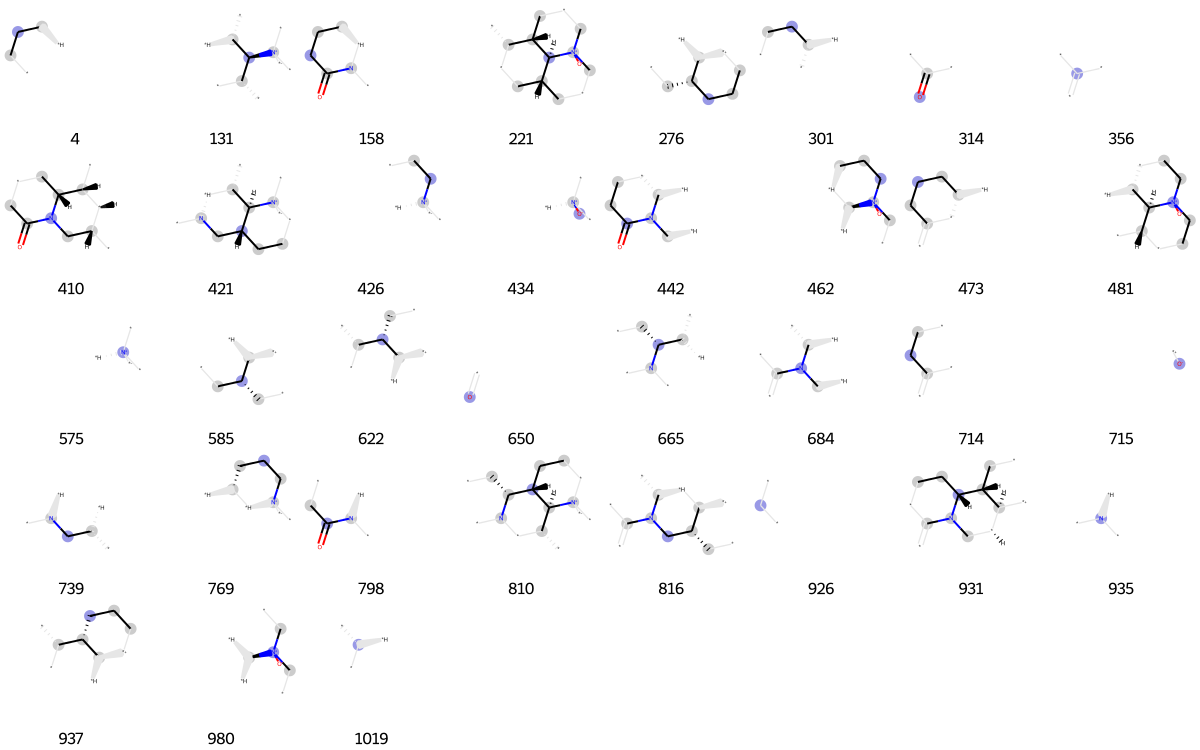

In [2107]:
prints = [(M39, x, bi) for x in fp39.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp39.GetOnBits ()])

In [2108]:
bi = {}

fp40= AllChem.GetMorganFingerprintAsBitVect(M40, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp40, fp_arr)
np.nonzero(fp_arr)
list(fp40.GetOnBits())

[13,
 19,
 33,
 36,
 75,
 233,
 240,
 250,
 268,
 375,
 400,
 528,
 568,
 597,
 656,
 706,
 760,
 807,
 926,
 1019]

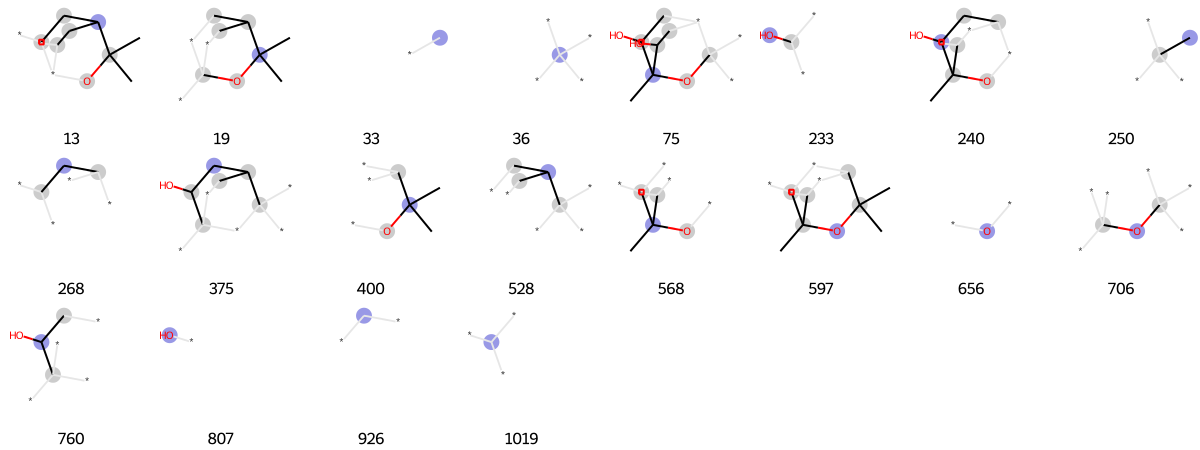

In [2109]:
prints = [(M40, x, bi) for x in fp40.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp40.GetOnBits ()])

In [2110]:
bi = {}

fp41= AllChem.GetMorganFingerprintAsBitVect(M41, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp41, fp_arr)
np.nonzero(fp_arr)
list(fp41.GetOnBits())

[36,
 53,
 64,
 89,
 128,
 175,
 191,
 196,
 238,
 249,
 258,
 310,
 343,
 352,
 356,
 379,
 389,
 457,
 483,
 495,
 511,
 518,
 542,
 586,
 650,
 656,
 679,
 703,
 725,
 726,
 792,
 807,
 845,
 849,
 881,
 893,
 905,
 926,
 984,
 1019]

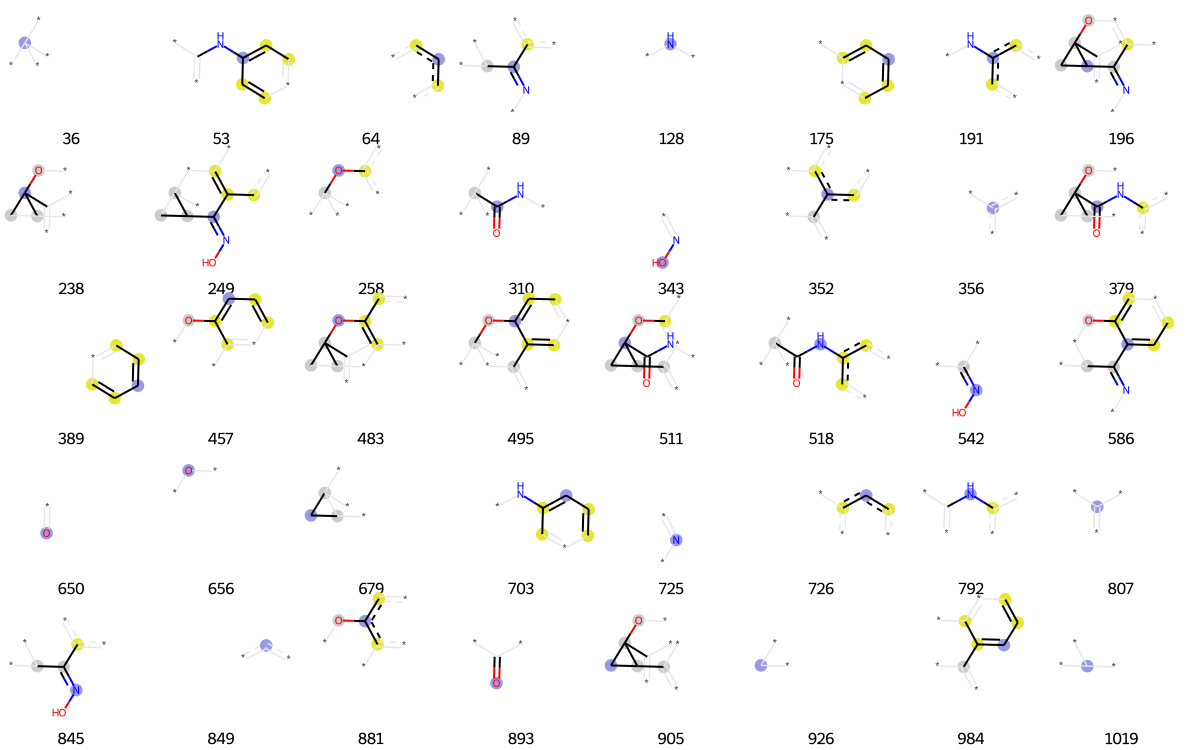

In [2111]:
prints = [(M41, x, bi) for x in fp41.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp41.GetOnBits ()])

In [2112]:
bi = {}

fp42= AllChem.GetMorganFingerprintAsBitVect(M42, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp42, fp_arr)
np.nonzero(fp_arr)
list(fp42.GetOnBits())

[33,
 36,
 42,
 84,
 106,
 114,
 123,
 129,
 138,
 250,
 353,
 356,
 361,
 389,
 456,
 484,
 556,
 620,
 633,
 650,
 656,
 673,
 709,
 716,
 718,
 726,
 807,
 849,
 850,
 875,
 893,
 926,
 950,
 953,
 956,
 961,
 1017]

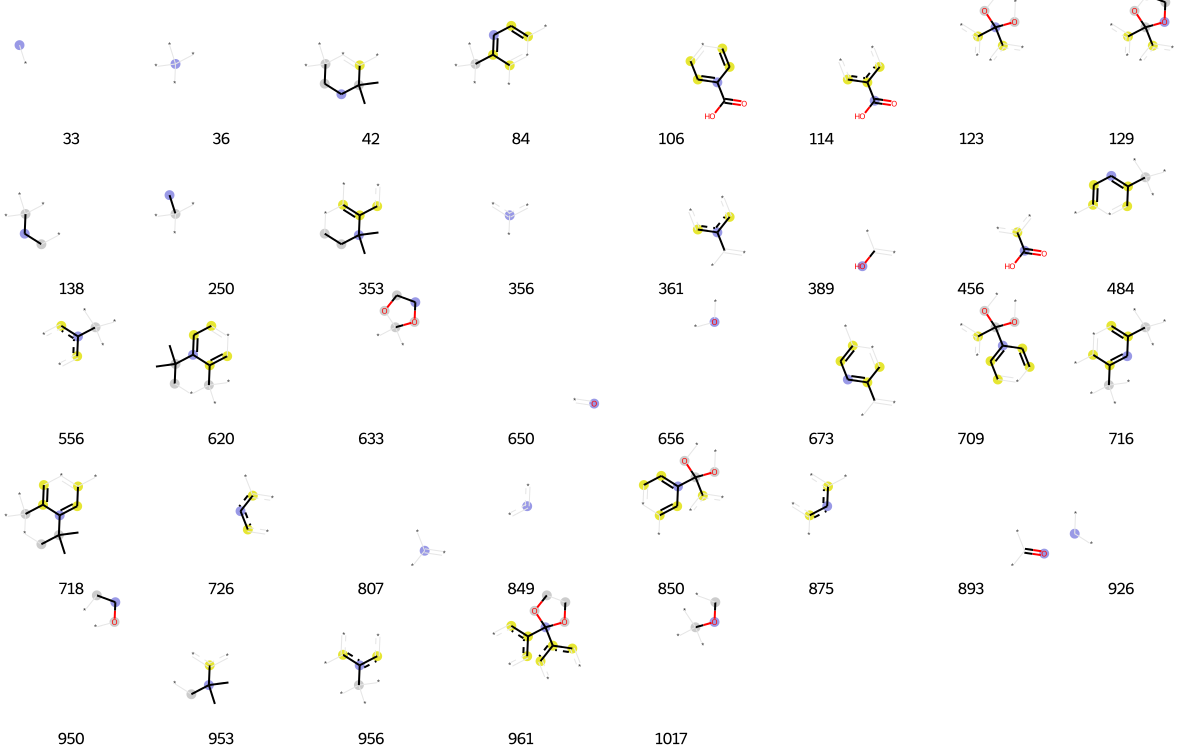

In [2113]:
prints = [(M42, x, bi) for x in fp42.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp42.GetOnBits ()])

In [2114]:
bi = {}

fp43= AllChem.GetMorganFingerprintAsBitVect(M43, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp43, fp_arr)
np.nonzero(fp_arr)
list(fp43.GetOnBits())

[4,
 8,
 14,
 15,
 64,
 79,
 80,
 128,
 184,
 190,
 191,
 197,
 218,
 241,
 329,
 342,
 356,
 357,
 369,
 375,
 378,
 383,
 392,
 415,
 419,
 428,
 444,
 456,
 458,
 486,
 491,
 511,
 543,
 544,
 558,
 562,
 582,
 608,
 650,
 661,
 667,
 675,
 676,
 691,
 703,
 708,
 726,
 792,
 807,
 831,
 849,
 852,
 875,
 887,
 893,
 907,
 915,
 926,
 935,
 947,
 948,
 974,
 985,
 1020]

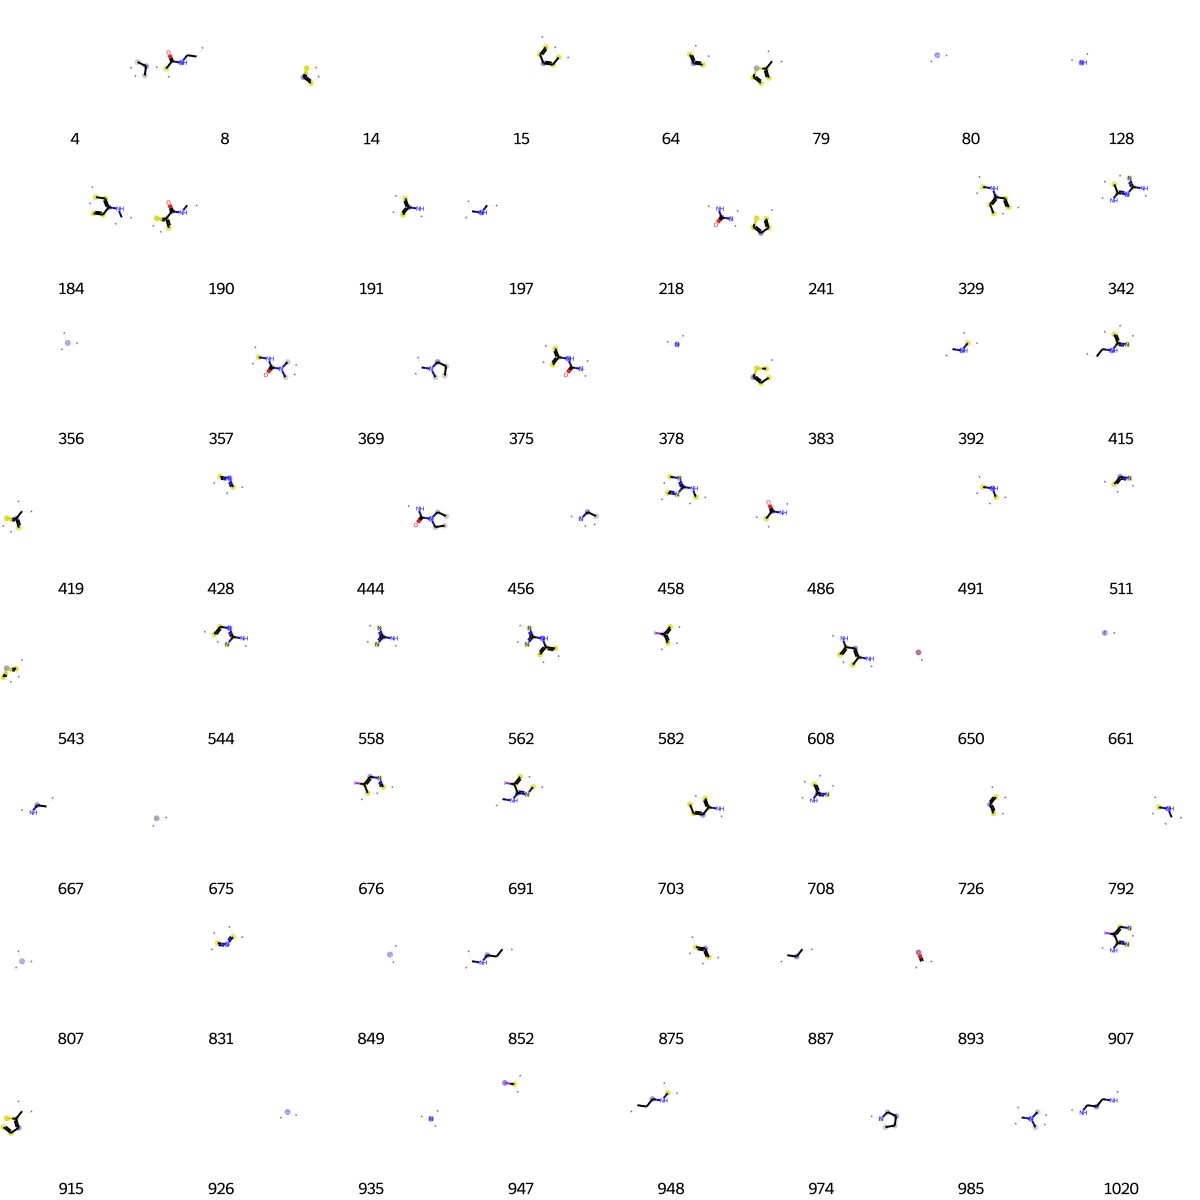

In [2115]:
prints = [(M43, x, bi) for x in fp43.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp43.GetOnBits ()])

In [2116]:
bi = {}

fp44= AllChem.GetMorganFingerprintAsBitVect(M44, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp44, fp_arr)
np.nonzero(fp_arr)
list(fp44.GetOnBits())

[1,
 5,
 10,
 19,
 30,
 33,
 41,
 53,
 80,
 90,
 118,
 119,
 128,
 147,
 188,
 219,
 220,
 227,
 233,
 243,
 259,
 268,
 278,
 282,
 283,
 288,
 289,
 294,
 298,
 301,
 314,
 328,
 337,
 341,
 356,
 385,
 387,
 389,
 395,
 428,
 433,
 448,
 456,
 482,
 492,
 505,
 508,
 519,
 520,
 521,
 540,
 545,
 578,
 590,
 591,
 596,
 599,
 612,
 621,
 650,
 667,
 680,
 684,
 687,
 694,
 726,
 729,
 736,
 739,
 745,
 754,
 770,
 783,
 807,
 816,
 820,
 829,
 849,
 868,
 886,
 887,
 893,
 896,
 922,
 926,
 935,
 936,
 956,
 971,
 972,
 976,
 978,
 979,
 981,
 997,
 1017,
 1019]

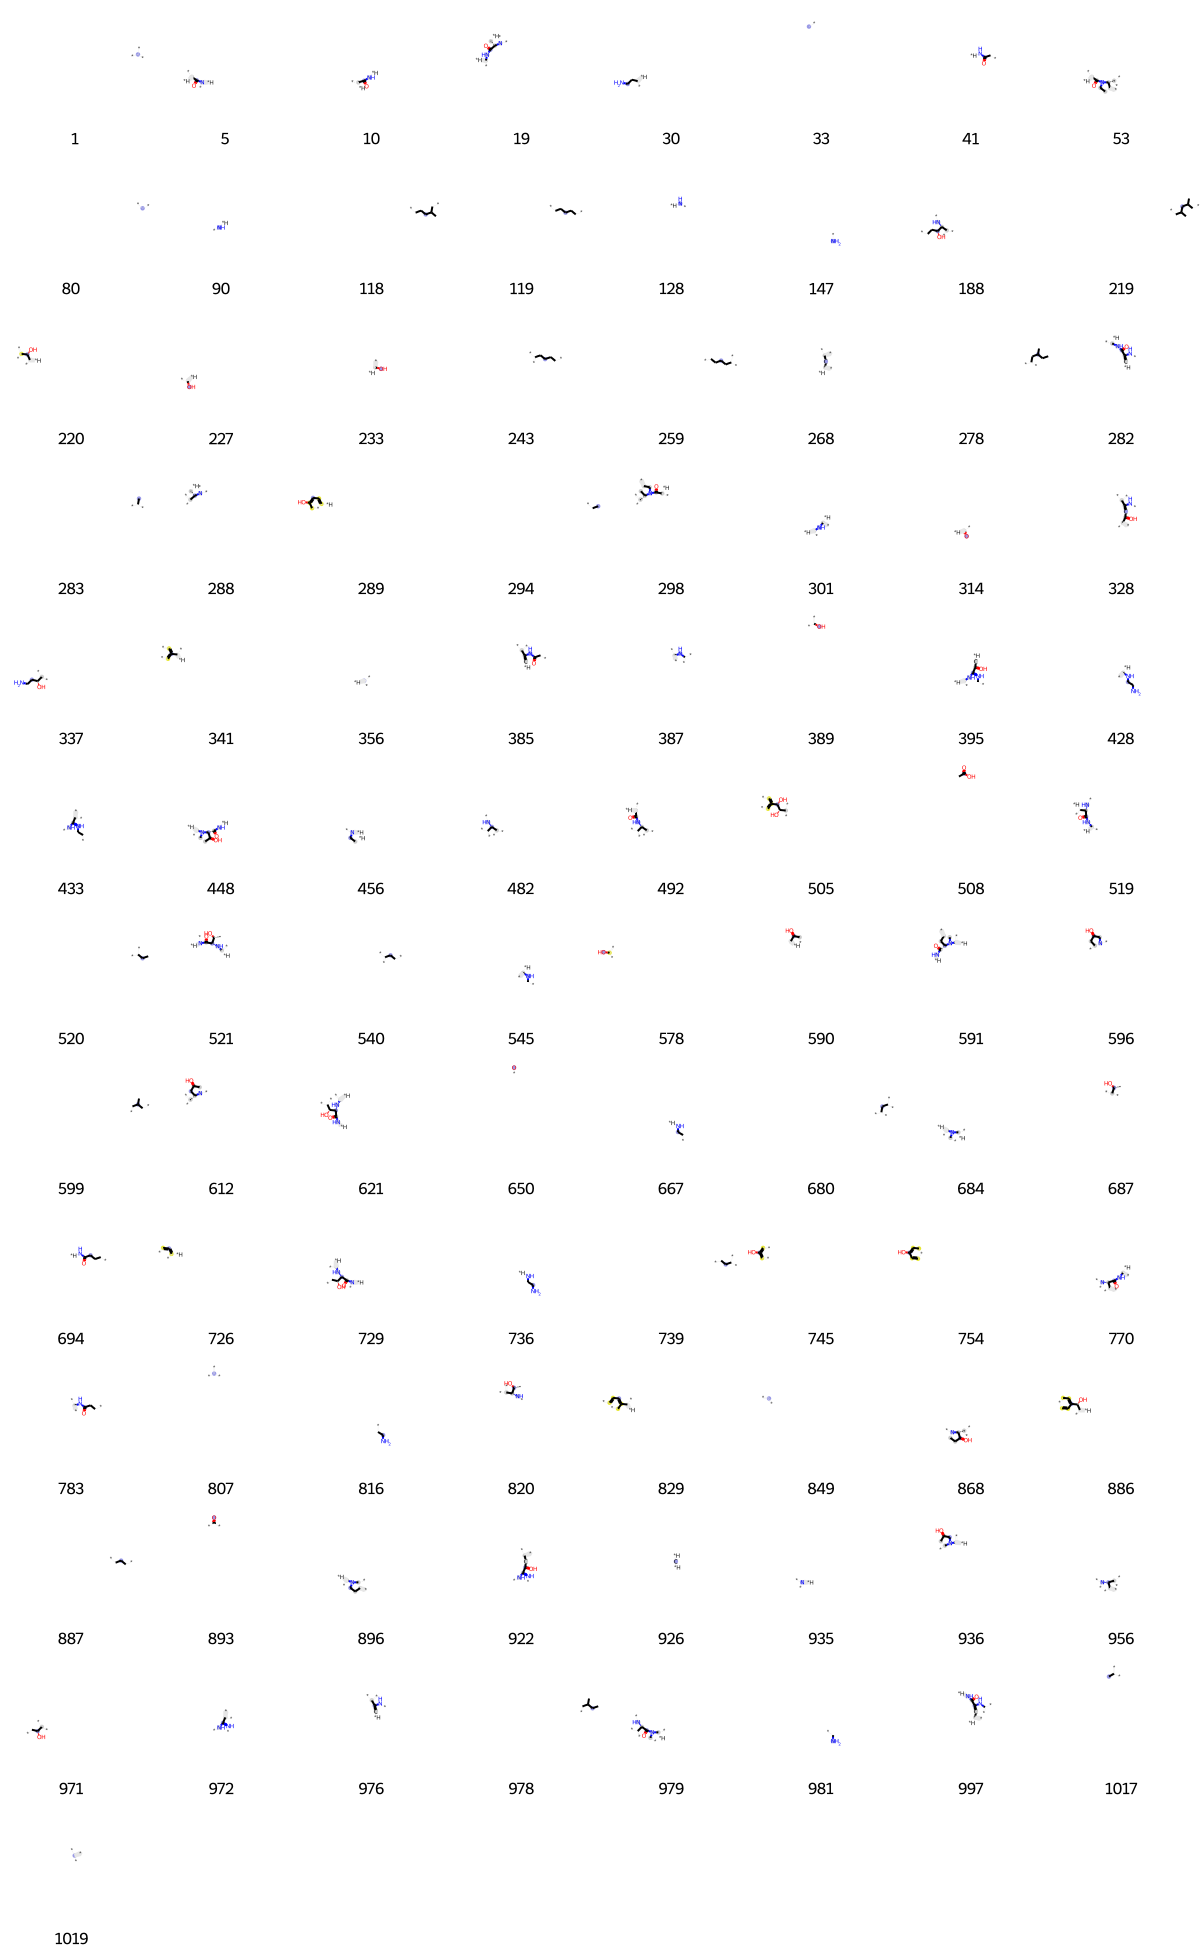

In [2117]:
prints = [(M44, x, bi) for x in fp44.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp44.GetOnBits ()])

In [2118]:
bi = {}

fp45= AllChem.GetMorganFingerprintAsBitVect(M45, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp45, fp_arr)
np.nonzero(fp_arr)
list(fp45.GetOnBits())

[3,
 13,
 21,
 26,
 33,
 42,
 64,
 80,
 90,
 94,
 104,
 140,
 148,
 175,
 219,
 249,
 251,
 294,
 310,
 356,
 389,
 428,
 494,
 512,
 514,
 674,
 695,
 726,
 730,
 737,
 747,
 794,
 812,
 841,
 849,
 875,
 881,
 927,
 946,
 999]

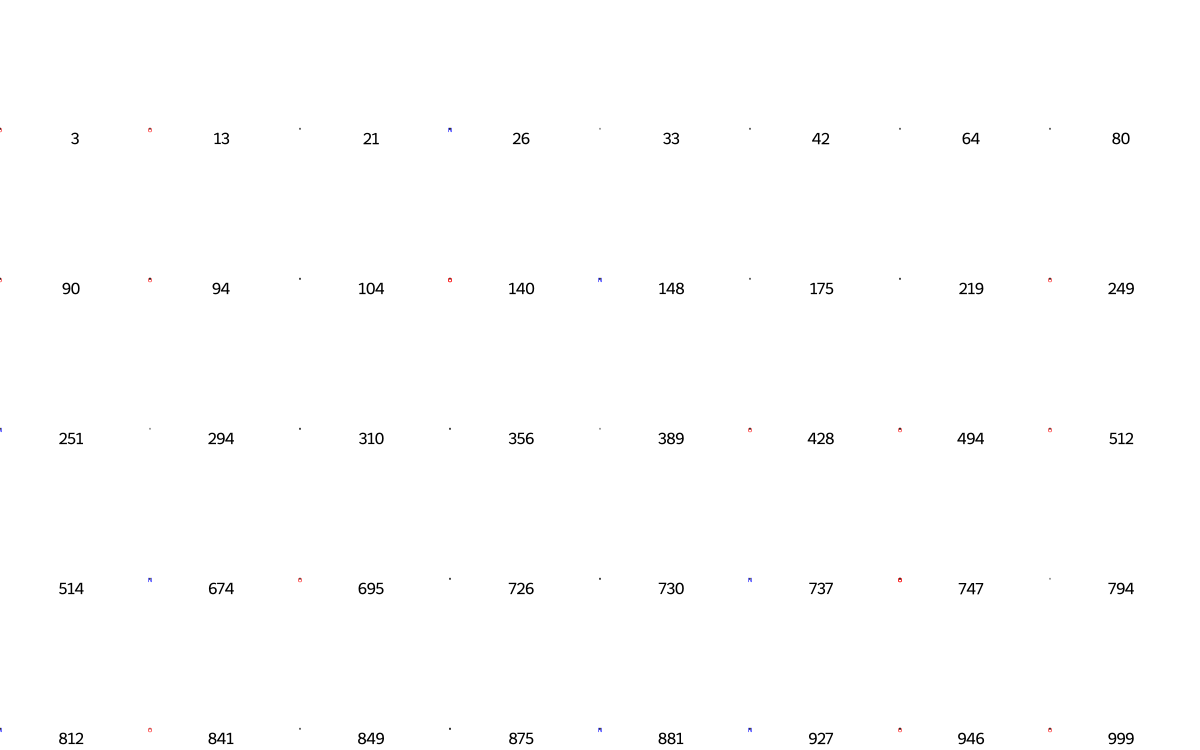

In [2119]:
prints = [(M45, x, bi) for x in fp45.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp45.GetOnBits ()])

In [2120]:
bi = {}

fp46= AllChem.GetMorganFingerprintAsBitVect(M46, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp46, fp_arr)
np.nonzero(fp_arr)
list(fp46.GetOnBits())

[33, 386, 636, 650, 807, 893, 1017]

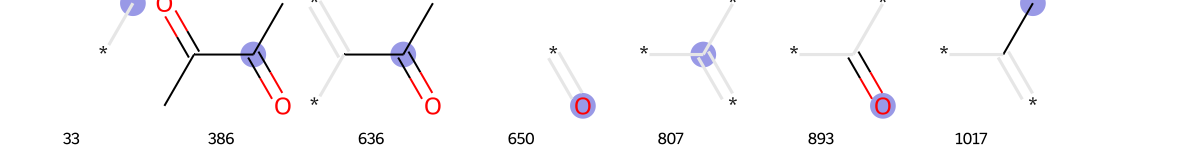

In [2121]:
prints = [(M46, x, bi) for x in fp46.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp46.GetOnBits ()])

In [2122]:
bi = {}

fp47= AllChem.GetMorganFingerprintAsBitVect(M47, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp47, fp_arr)
np.nonzero(fp_arr)
list(fp47.GetOnBits())

[1,
 33,
 64,
 80,
 147,
 175,
 283,
 331,
 341,
 347,
 356,
 389,
 502,
 557,
 726,
 849,
 880,
 885,
 981]

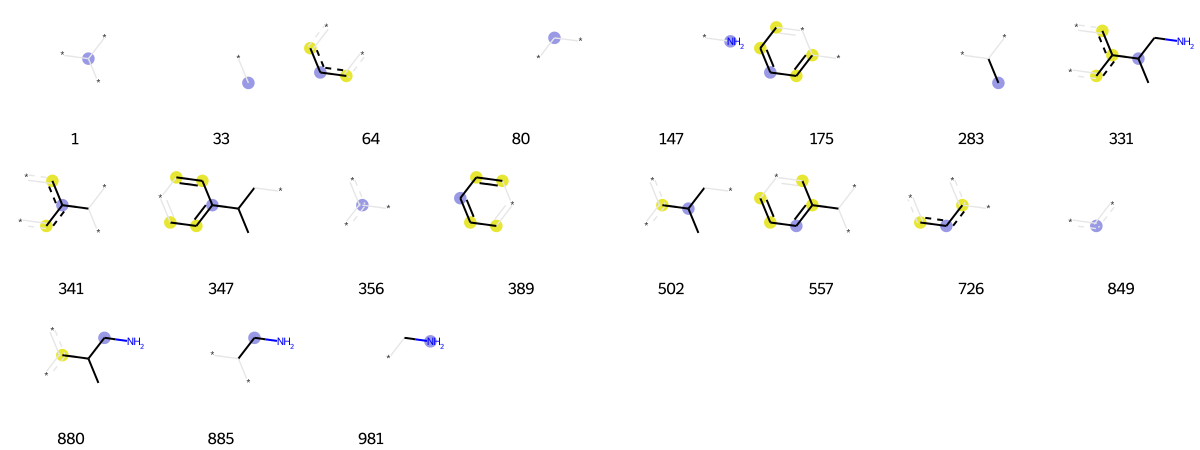

In [2123]:
prints = [(M47, x, bi) for x in fp47.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp47.GetOnBits ()])

In [2124]:
bi = {}

fp48= AllChem.GetMorganFingerprintAsBitVect(M48, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp48, fp_arr)
np.nonzero(fp_arr)
list(fp48.GetOnBits())

[1,
 7,
 14,
 33,
 36,
 42,
 46,
 53,
 59,
 75,
 80,
 104,
 130,
 138,
 149,
 164,
 171,
 179,
 189,
 225,
 233,
 242,
 268,
 271,
 283,
 285,
 294,
 301,
 308,
 314,
 320,
 356,
 357,
 368,
 383,
 429,
 439,
 463,
 485,
 497,
 504,
 520,
 525,
 526,
 550,
 551,
 583,
 595,
 598,
 609,
 621,
 647,
 650,
 656,
 669,
 671,
 674,
 679,
 681,
 684,
 687,
 695,
 698,
 710,
 722,
 731,
 739,
 745,
 750,
 757,
 772,
 798,
 801,
 802,
 807,
 815,
 827,
 828,
 835,
 841,
 849,
 855,
 859,
 862,
 883,
 897,
 918,
 922,
 926,
 931,
 933,
 937,
 941,
 964,
 982,
 1019,
 1020]

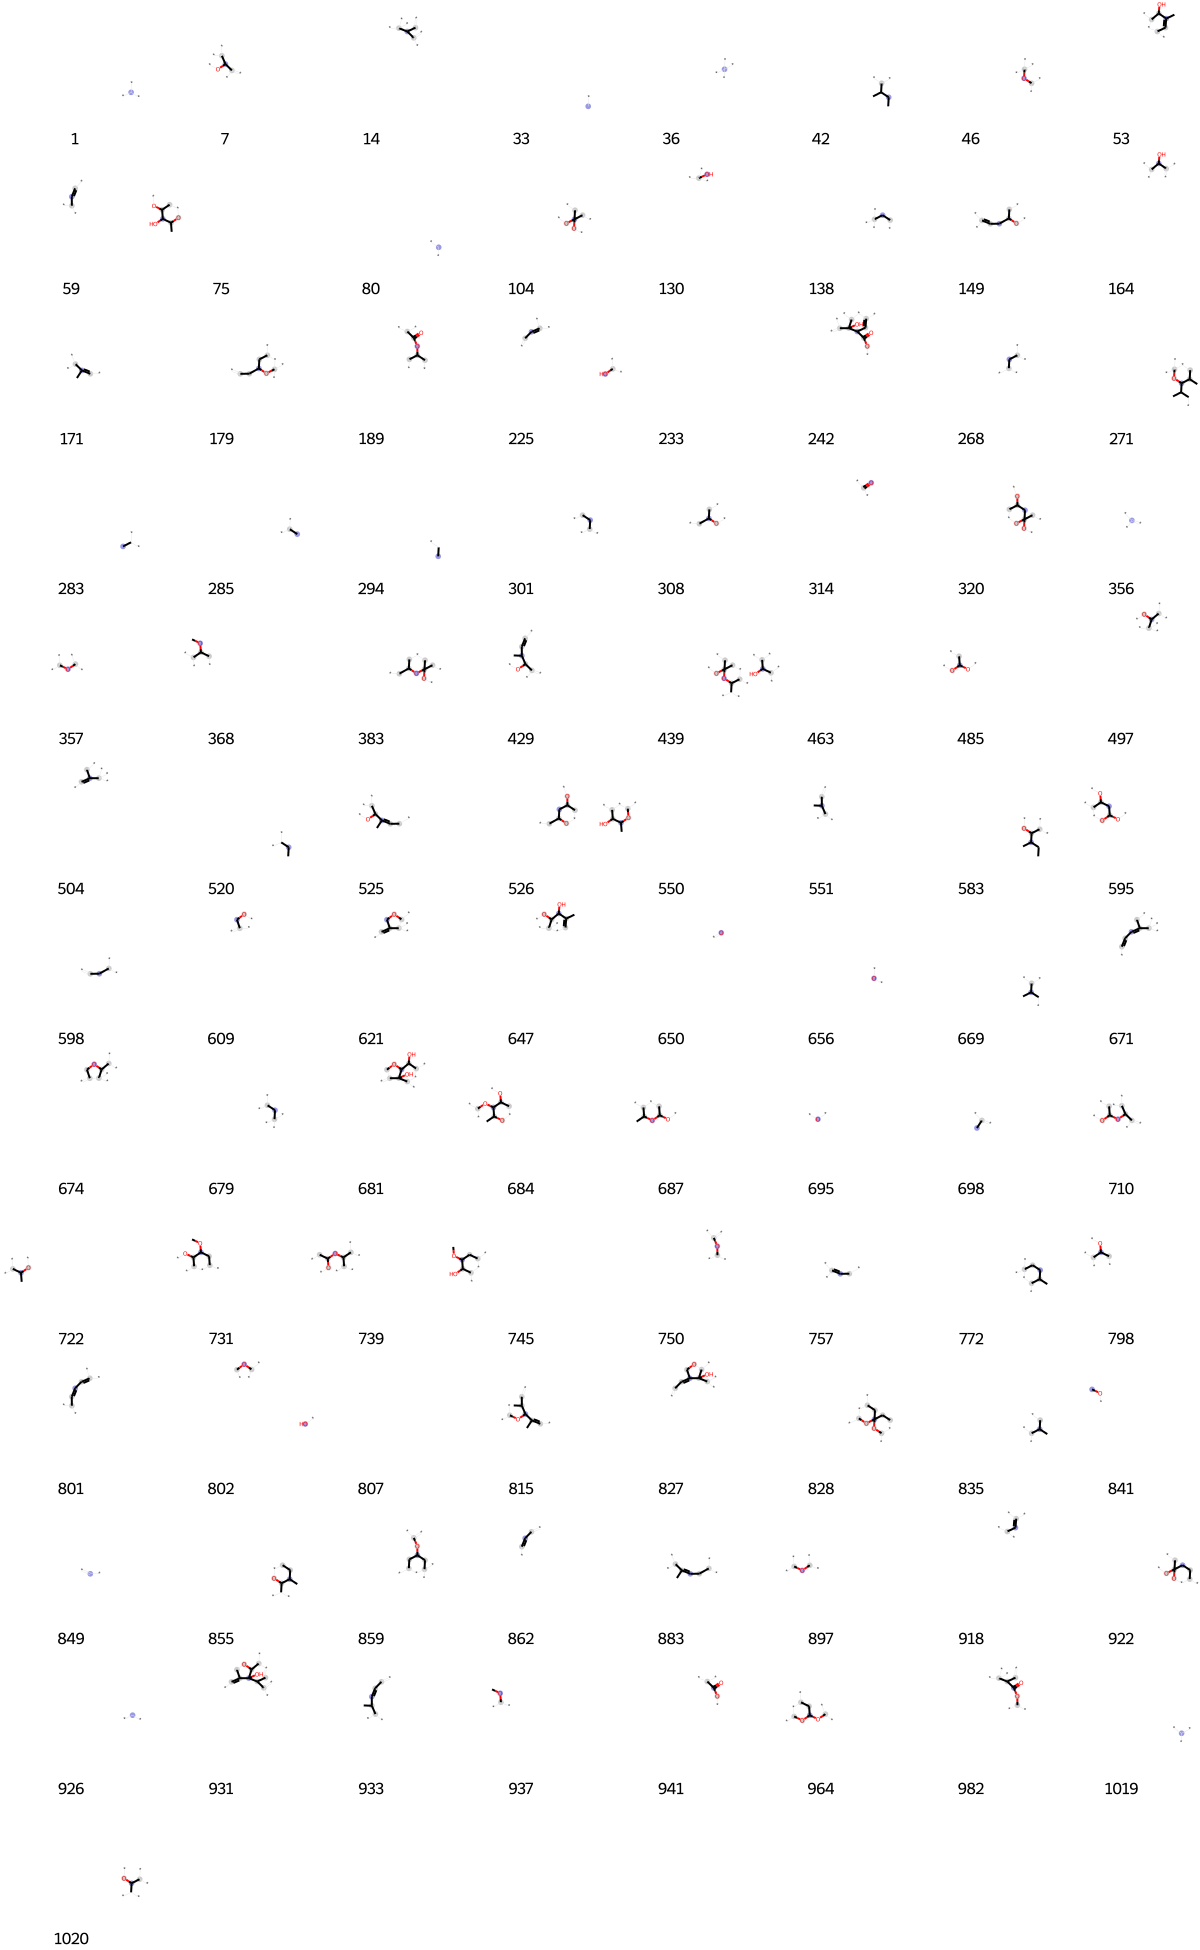

In [2125]:
prints = [(M48, x, bi) for x in fp48.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp48.GetOnBits ()])

In [2126]:
bi = {}

fp49= AllChem.GetMorganFingerprintAsBitVect(M49, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp49, fp_arr)
np.nonzero(fp_arr)
list(fp49.GetOnBits())

[31,
 64,
 117,
 128,
 131,
 140,
 175,
 191,
 240,
 289,
 346,
 356,
 378,
 385,
 428,
 448,
 491,
 500,
 543,
 552,
 578,
 626,
 675,
 702,
 726,
 745,
 754,
 807,
 827,
 831,
 842,
 843,
 849,
 961,
 980]

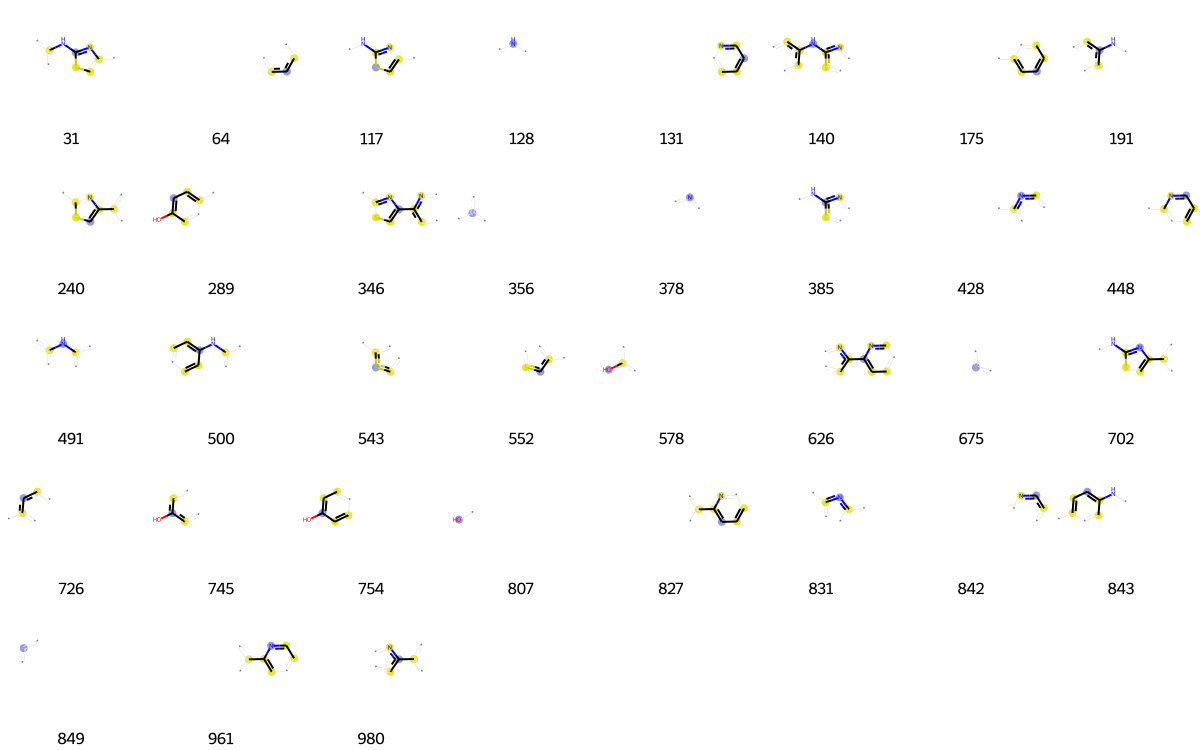

In [2127]:
prints = [(M49, x, bi) for x in fp49.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp49.GetOnBits ()])

In [2128]:
bi = {}

fp50= AllChem.GetMorganFingerprintAsBitVect(M50, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp50, fp_arr)
np.nonzero(fp_arr)
list(fp50.GetOnBits())

[10,
 13,
 15,
 16,
 32,
 33,
 36,
 41,
 46,
 49,
 53,
 64,
 80,
 90,
 94,
 102,
 106,
 128,
 133,
 136,
 140,
 162,
 168,
 175,
 182,
 191,
 200,
 216,
 231,
 241,
 252,
 288,
 301,
 313,
 314,
 322,
 352,
 356,
 378,
 383,
 392,
 428,
 469,
 482,
 533,
 547,
 551,
 558,
 561,
 574,
 582,
 625,
 629,
 650,
 659,
 661,
 667,
 672,
 675,
 676,
 683,
 691,
 695,
 698,
 710,
 714,
 718,
 723,
 724,
 726,
 792,
 807,
 816,
 820,
 834,
 843,
 849,
 879,
 885,
 893,
 896,
 898,
 899,
 901,
 917,
 926,
 935,
 938,
 953,
 968,
 969,
 973,
 984,
 1004,
 1019,
 1022]

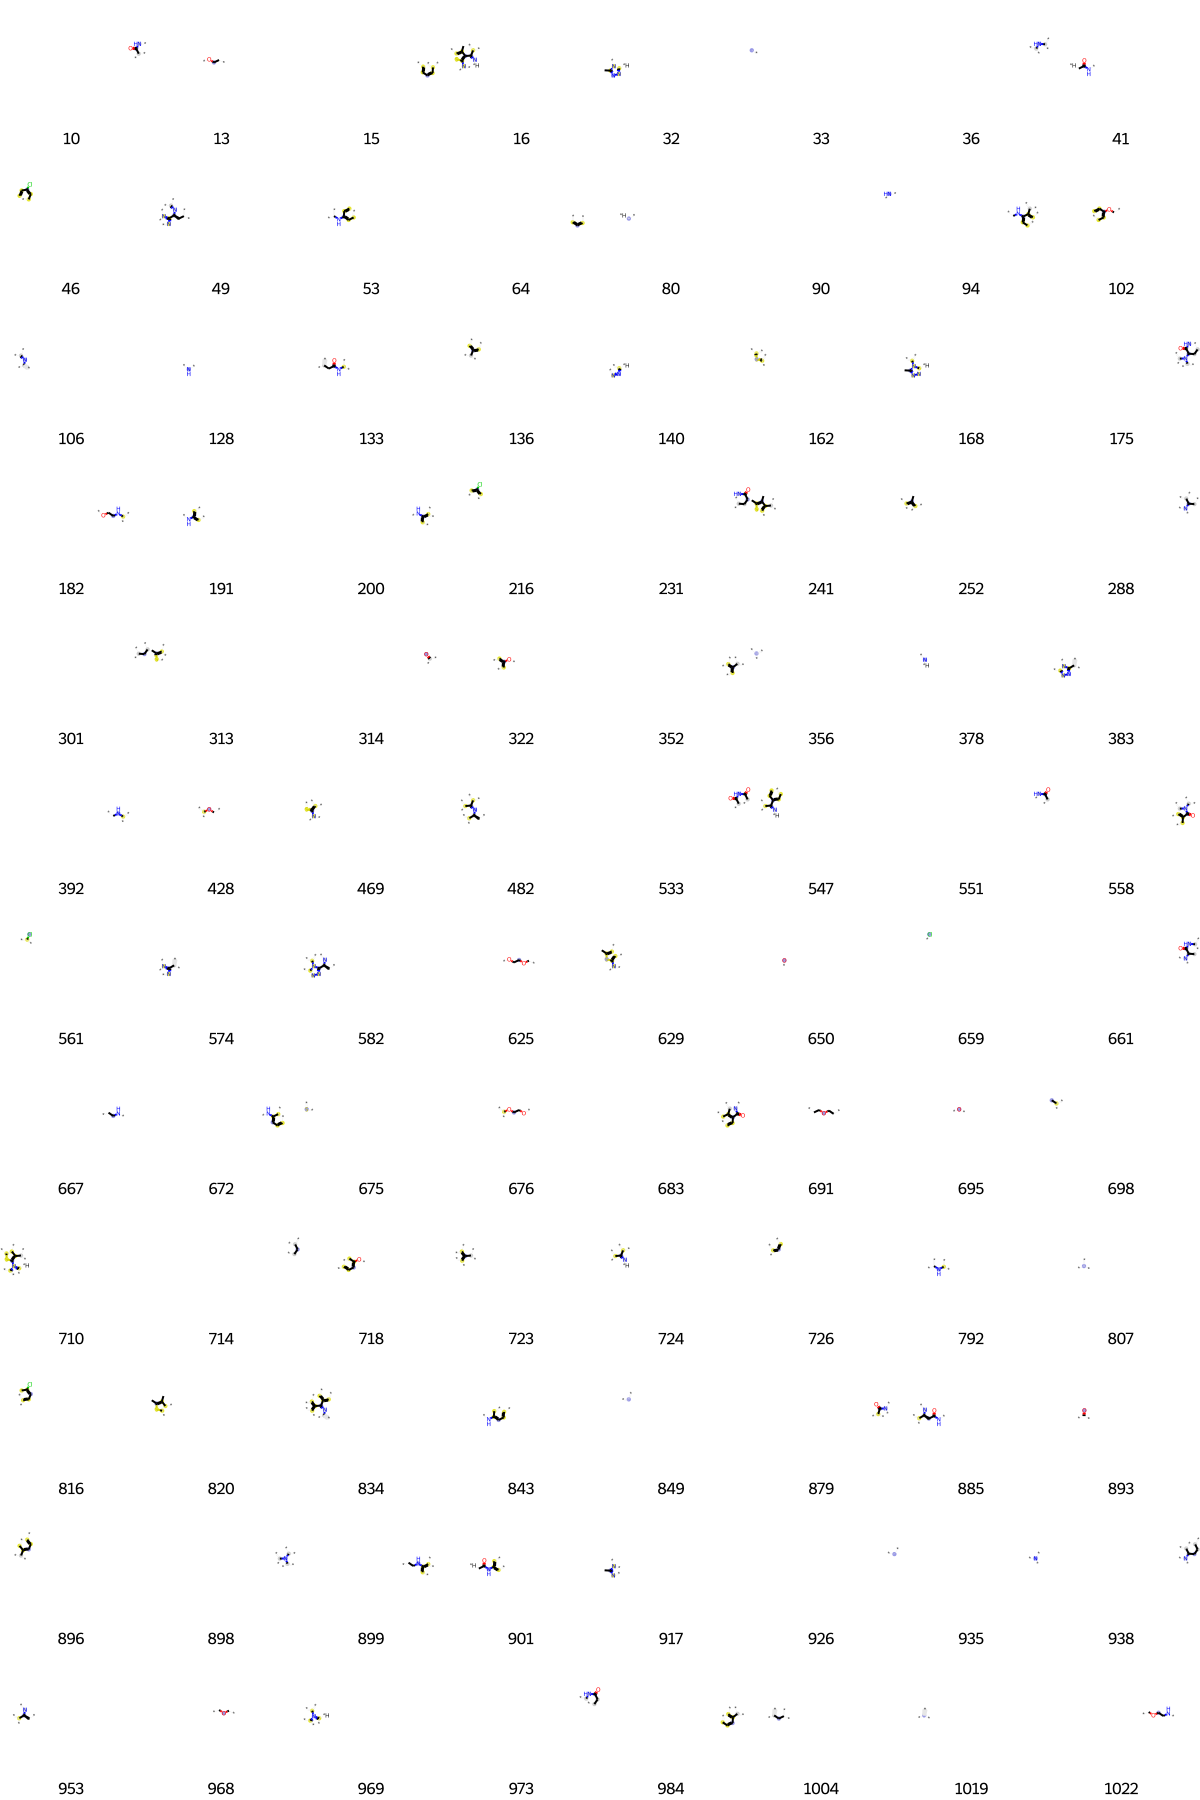

In [2129]:
prints = [(M50, x, bi) for x in fp50.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp50.GetOnBits ()])